# --- DATA EXPLORATION (EDA) ---

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
data = pd.read_csv("Data/data_eda.csv")
data.head()

default  loan_amnt  term  int_rate  installment  grade  sub_grade  \
0        0     5000.0     0     10.65       162.87      2          7   
1        1     2500.0     1     15.27        59.83      3         14   
2        0     2400.0     0     15.96        84.33      3         15   
3        0    10000.0     0     13.49       339.31      3         11   
4        0     3000.0     1     12.69        67.79      2         10   

   emp_length emp_title home_ownership  annual_inc verification_status  \
0        15.0   MISSING           RENT     24000.0            VERIFIED   
1         0.5     OTHER           RENT     30000.0     SOURCE_VERIFIED   
2        15.0   MISSING           RENT     12252.0        NOT_VERIFIED   
3        15.0     OTHER           RENT     49200.0     SOURCE_VERIFIED   
4         1.0     OTHER           RENT     80000.0     SOURCE_VERIFIED   

   issue_d         purpose    dti  open_acc  pub_rec  revol_bal  revol_util  \
0     2011     CREDIT_CARD  27.65       3.0      0.0    13648.0        83.7   
1     2011             CAR   1.00       3.0      0.0     1687.0         9.4   
2     2011  SMALL_BUSINESS   8.72       2.0      0.0     2956.0        98.5   
3     2011           OTHER  20.00      10.0      0.0     5598.0        21.0   
4     2011           OTHER  17.94      15.0      0.0    27783.0        53.9   

   total_acc  initial_list_status  pub_rec_bankruptcies  mort_acc addr_state  \
0        9.0                    0                   0.0       NaN         AZ   
1        4.0                    0                   0.0       NaN         GA   
2       10.0                    0                   0.0       NaN         IL   
3       37.0                    0                   0.0       NaN         CA   
4       38.0                    0                   0.0       NaN         OR   

  grade_code sub_grade_code emp_length_code  manager   fico  yrs_cr_line  
0          B             B2       10+ years        0  737.0           26  
1          C             C4        < 1 year        0  742.0           12  
2          C             C5       10+ years        0  737.0           10  
3          C             C1       10+ years        0  692.0           15  
4          B             B5          1 year        0  697.0           15

In [4]:
data_out = pd.read_csv("Data/data_eda_no_outliers.csv")
data_out.head()

default  loan_amnt  term  int_rate  installment  grade  sub_grade  \
0        0    12000.0     0     10.99       392.81      2          7   
1        0     4800.0     0     10.99       157.13      2          7   
2        0    27050.0     0     10.99       885.46      2          7   
3        0    12000.0     0      7.62       373.94      1          3   
4        0    14000.0     0     12.85       470.71      2          9   

   emp_length        emp_title home_ownership  annual_inc verification_status  \
0         4.0  PROJECT MANAGER           RENT     60000.0        NOT_VERIFIED   
1         2.0            OTHER       MORTGAGE     39600.0     SOURCE_VERIFIED   
2        15.0            OTHER            OWN     55000.0            VERIFIED   
3         3.0            OTHER       MORTGAGE     96500.0        NOT_VERIFIED   
4         4.0            OTHER           RENT     88000.0        NOT_VERIFIED   

   issue_d             purpose    dti  open_acc  pub_rec  revol_bal  \
0   2013.0  DEBT_CONSOLIDATION   4.62      15.0      0.0     7137.0   
1   2013.0    HOME_IMPROVEMENT   2.49       3.0      0.0     4136.0   
2   2013.0  DEBT_CONSOLIDATION  22.87      14.0      0.0    36638.0   
3   2013.0  DEBT_CONSOLIDATION  12.61      17.0      0.0    13248.0   
4   2013.0  DEBT_CONSOLIDATION  10.02       6.0      1.0     3686.0   

   revol_util  total_acc  initial_list_status  pub_rec_bankruptcies  mort_acc  \
0        24.0       18.0                  0.0                   0.0       0.0   
1        16.1        8.0                  1.0                   0.0       0.0   
2        61.2       27.0                  1.0                   0.0       4.0   
3        55.7       30.0                  0.0                   0.0       1.0   
4        81.9       14.0                  0.0                   1.0       0.0   

  addr_state grade_code sub_grade_code emp_length_code  manager   fico  \
0         NC          B             B2         4 years      1.0  722.0   
1         TX          B             B2         2 years      0.0  757.0   
2         MI          B             B2       10+ years      0.0  732.0   
3         TX          A             A3         3 years      0.0  707.0   
4         NC          B             B4         4 years      0.0  672.0   

   yrs_cr_line  
0          4.0  
1         18.0  
2         27.0  
3         10.0  
4         25.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449235 entries, 0 to 1449234
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   default               1449235 non-null  int64  
 1   loan_amnt             1449235 non-null  float64
 2   term                  1449235 non-null  int64  
 3   int_rate              1449235 non-null  float64
 4   installment           1449235 non-null  float64
 5   grade                 1449235 non-null  int64  
 6   sub_grade             1449235 non-null  int64  
 7   emp_length            1363984 non-null  float64
 8   emp_title             1449235 non-null  object 
 9   home_ownership        1449235 non-null  object 
 10  annual_inc            1449235 non-null  float64
 11  verification_status   1449235 non-null  object 
 12  issue_d               1449235 non-null  int64  
 13  purpose               1449235 non-null  object 
 14  dti                   1449235 non-

# Target Variable - 'default'

<AxesSubplot:xlabel='default', ylabel='default'>

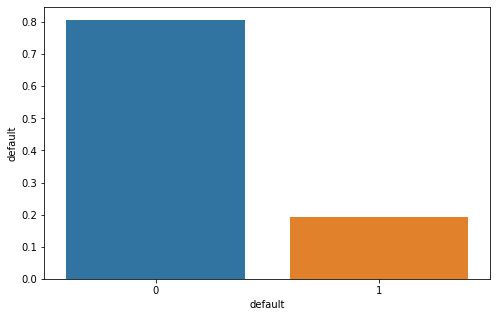

In [16]:
# loan default distribution (target variable)
plt.figure(figsize=(8, 5))
sns.barplot(x ='default', y =data['default'].value_counts(normalize=True, dropna=False),
            data=data)

# Correlation Matrix

<AxesSubplot:>

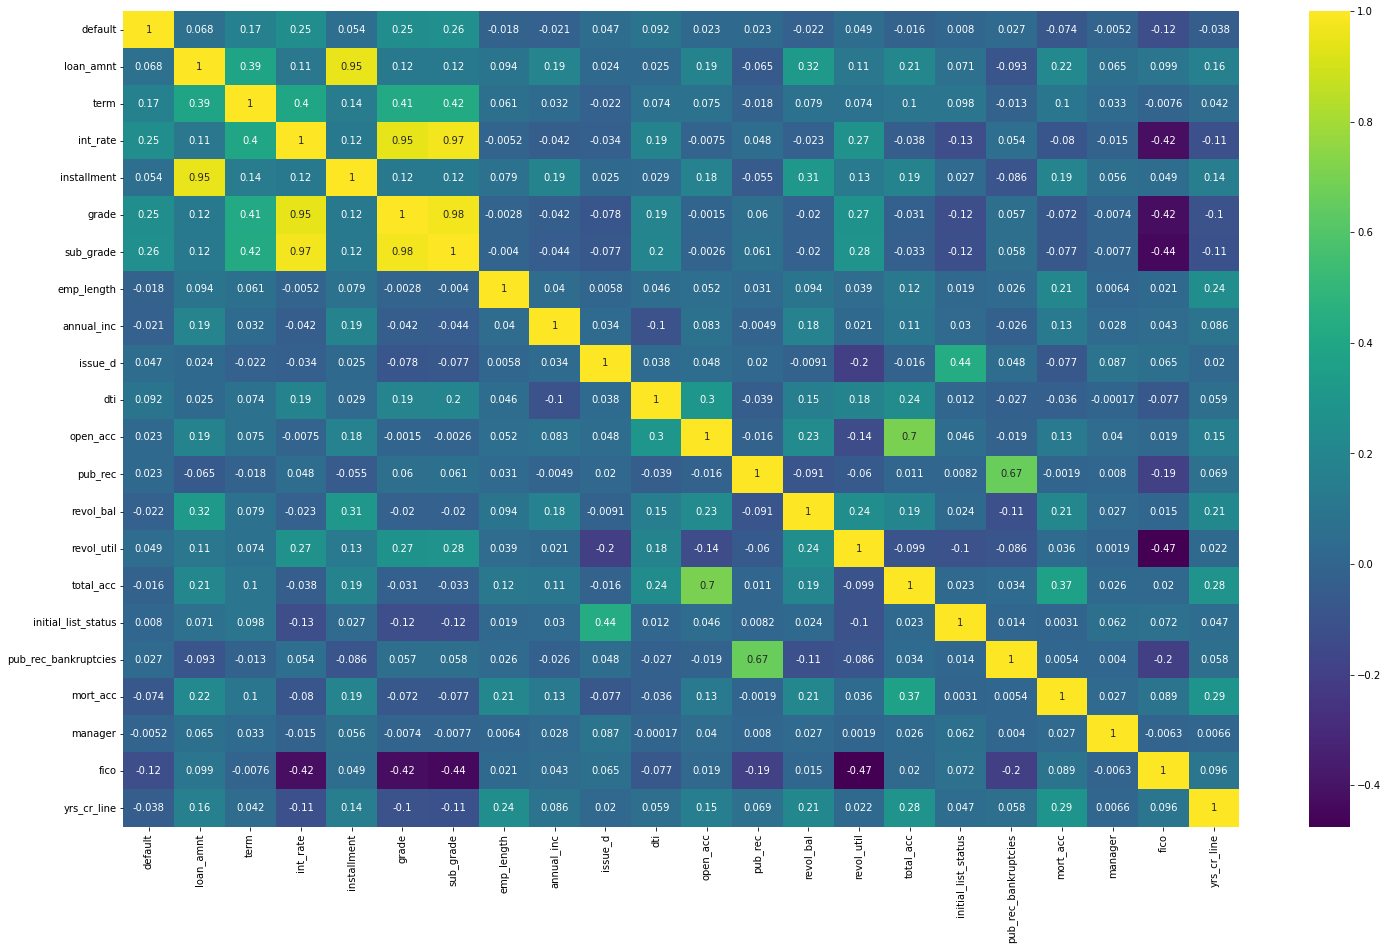

In [17]:
# correlation matrix of initial set of significant features
plt.figure(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

-> look into high correlation between predictors (drop redundant ones)
* grade vs sub-grade
* loan_amnt vs installment
* grade/sub-grade vs int_rate
* total_acc vs open_acc
* pub_rec vs pub_rec_bankruptcies

# EDA Function

In [6]:
cont_feats = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
              'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
              'mort_acc', 'yrs_cr_line', 'fico']

cat_feats = ['term', 'emp_length', 'emp_title', 'home_ownership', 
             'verification_status', 'purpose', 'initial_list_status', 'manager', 
             'pub_rec_bankruptcies','issue_d', 'grade_code', 'sub_grade_code',
             #'grade', 'sub_grade', 'emp_length_code',
             'addr_state']

In [7]:
def run_eda(data, col, target='default'):
    
    if col=='emp_title':
        data.drop(data[data.emp_title == 'OTHER'].index, inplace=True)
    
    if col in cat_feats:
        if len(data[col].unique())<10:
            plt.figure(figsize=(20, 15))
            plt.subplot(2, 2, 1)
            sns.countplot(x=col, data=data, order=sorted(data[col].unique()), 
                          palette='deep').set(title='Overall %s Distribution' % col)
            plt.subplot(2, 2, 2)
            sns.barplot(x=col, y=target, data=data, order=sorted(data[col].unique()),
                       palette='deep').set(title='%s vs. %s' % (col,target))
            plt.subplot(2, 2, 3)
            sns.countplot(x=col, data=data, order=sorted(data[col].unique()),
                          palette='deep', hue=target).set(title='%s Distribution by %s' % (col,target))
            
        elif len(data[col].unique())<15:
            plt.figure(figsize=(20, 15))
            plt.subplot(2, 2, 1)
            sns.countplot(x=col, data=data, order=sorted(data[col].unique()),
                         palette='deep').set(title='Overall %s Distribution' % col)
            plt.xticks(rotation=45)
            plt.subplot(2, 2, 2)
            sns.barplot(x=col, y=target, data=data, order=sorted(data[col].unique()),
                       palette='deep').set(title='%s vs. %s' % (col,target))
            plt.xticks(rotation=45)
            plt.subplot(2, 2, 3)
            sns.countplot(x=col, data=data, order=sorted(data[col].unique()),
                         palette='deep', hue=target).set(title='%s Distribution by %s' % (col,target))
            plt.xticks(rotation=45)
        else:
            plt.figure(figsize=(20, 22))
            plt.subplot(3, 1, 1)
            sns.countplot(x=col, data=data, order=sorted(data[col].unique()),
                         palette='deep').set(title='Overall %s Distribution' % col)
            plt.xticks(rotation=45)
            plt.subplot(3, 1, 2)
            sns.countplot(x=col, data=data, order=sorted(data[col].unique()),
                         palette='deep', hue=target).set(title='%s Distribution by %s' % (col,target))
            plt.xticks(rotation=45)
            plt.subplot(3, 1, 3)
            sns.barplot(x=col, y=target, data=data, order=sorted(data[col].unique()),
                       palette='deep').set(title='%s vs. %s' % (col,target))
            plt.xticks(rotation=45)
    
    if col in cont_feats:
        plt.figure(figsize=(20, 15))
        plt.subplot(2, 2, 1)
        sns.histplot(data=data, x=col, kde=True, bins=20, 
                     palette='deep').set(title='Overall %s Distribution' % col)
        plt.subplot(2, 2, 2)
        sns.boxplot(x=target, y=col, data=data, showfliers=True, width=0.5, 
                    palette='deep').set(title='%s vs. %s' % (col,target))
        plt.subplot(2, 2, 3)
        sns.histplot(data=data, x=col, hue=target, kde=True, bins=20, 
                     palette='deep').set(title='%s Distribution by %s' % (col,target))

    plt.suptitle(col, size=30)
    plt.show()

# Independent Variables (individual charts)

### loan_amnt

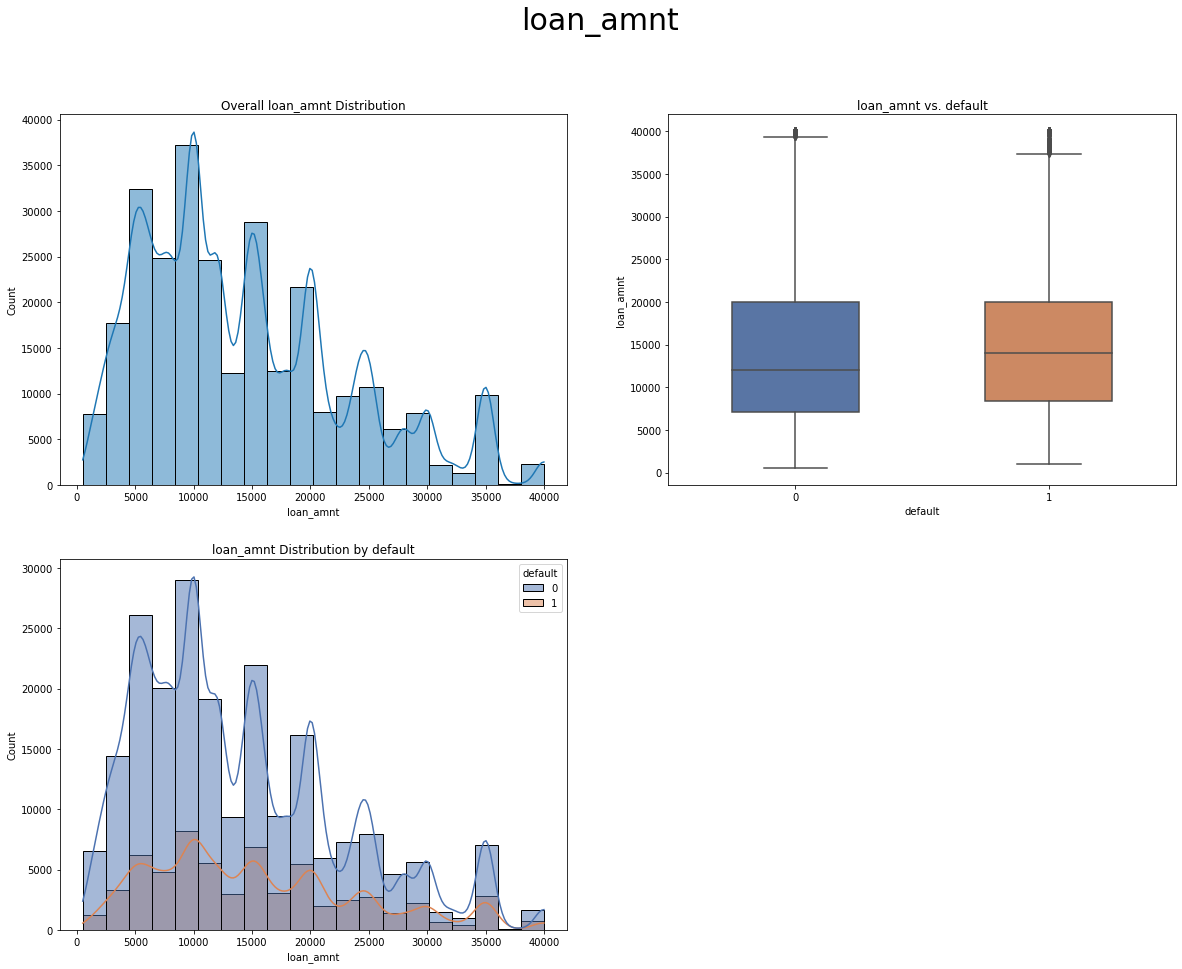

In [20]:
run_eda(data, 'loan_amnt')

### term

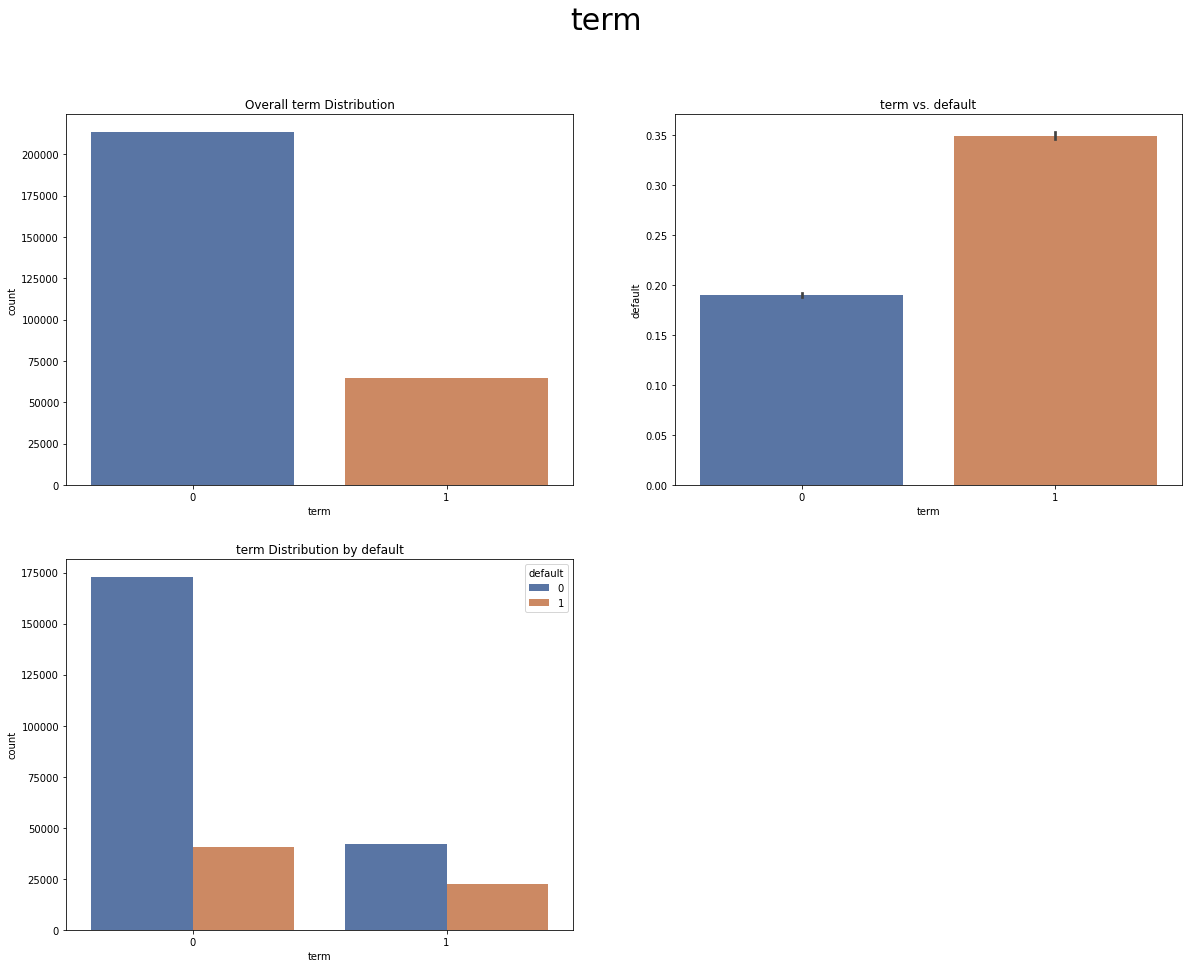

In [21]:
run_eda(data, 'term')

### int_rate

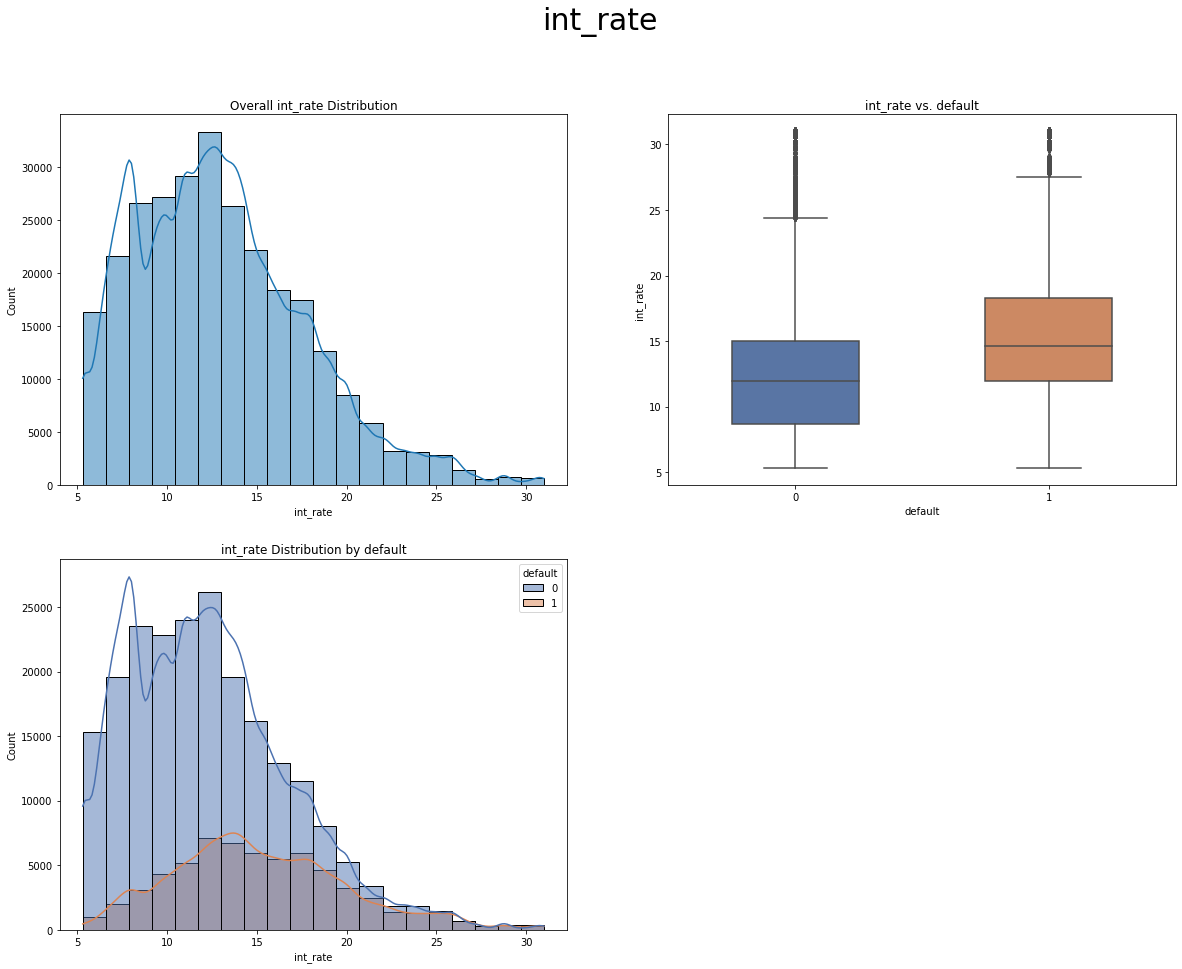

In [22]:
run_eda(data, 'int_rate')

### installment

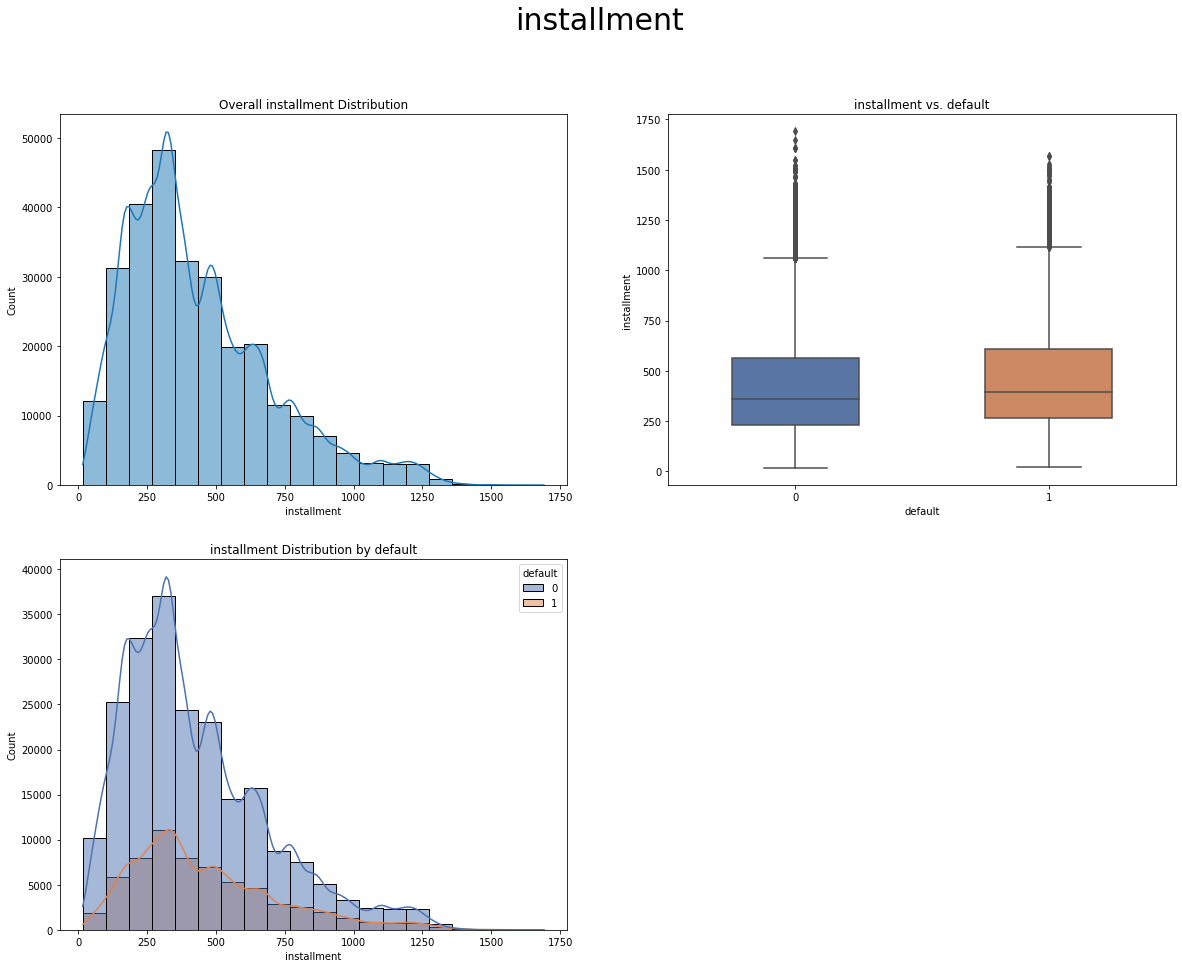

In [23]:
run_eda(data, 'installment')

### grade

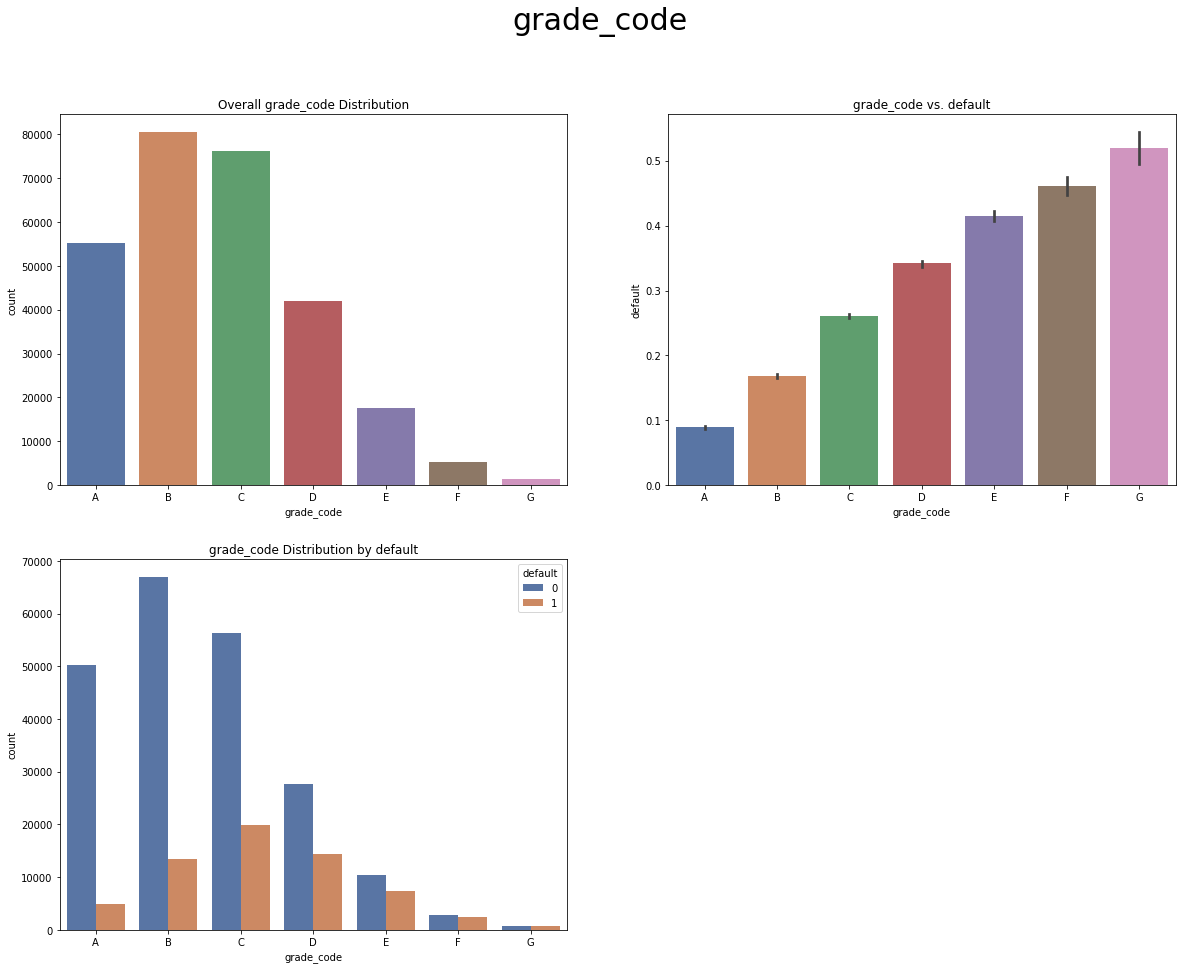

In [24]:
run_eda(data, 'grade_code')

### sub_grade

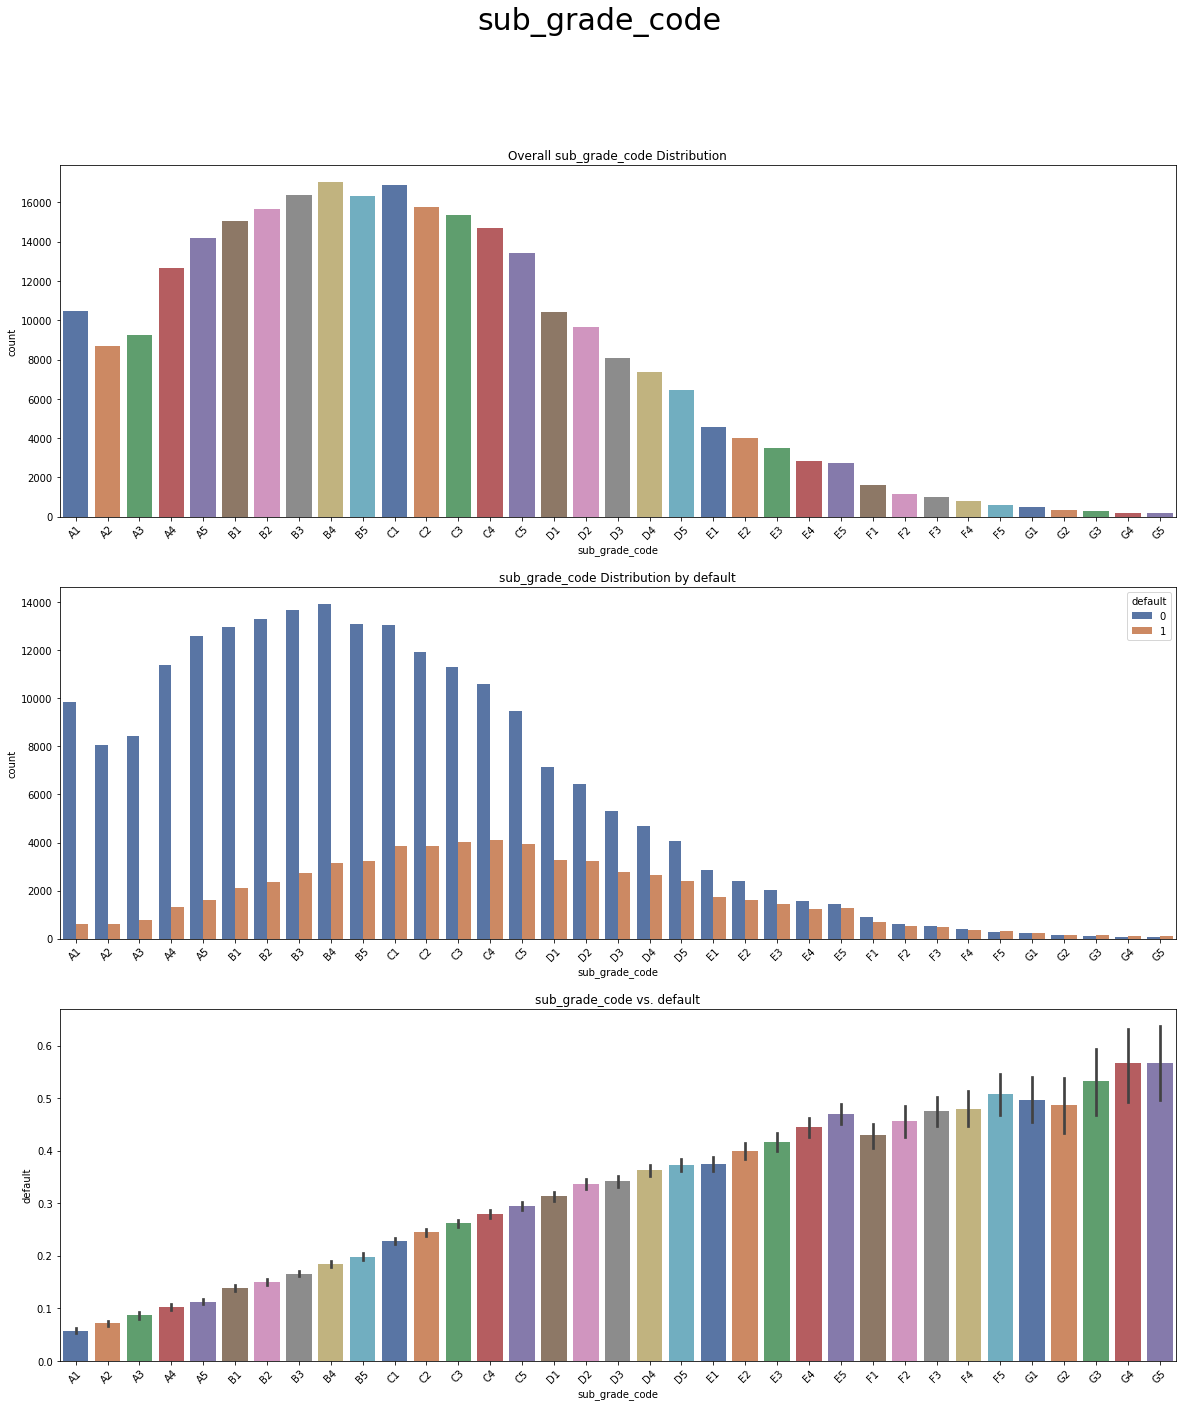

In [25]:
run_eda(data, 'sub_grade_code')

### emp_length

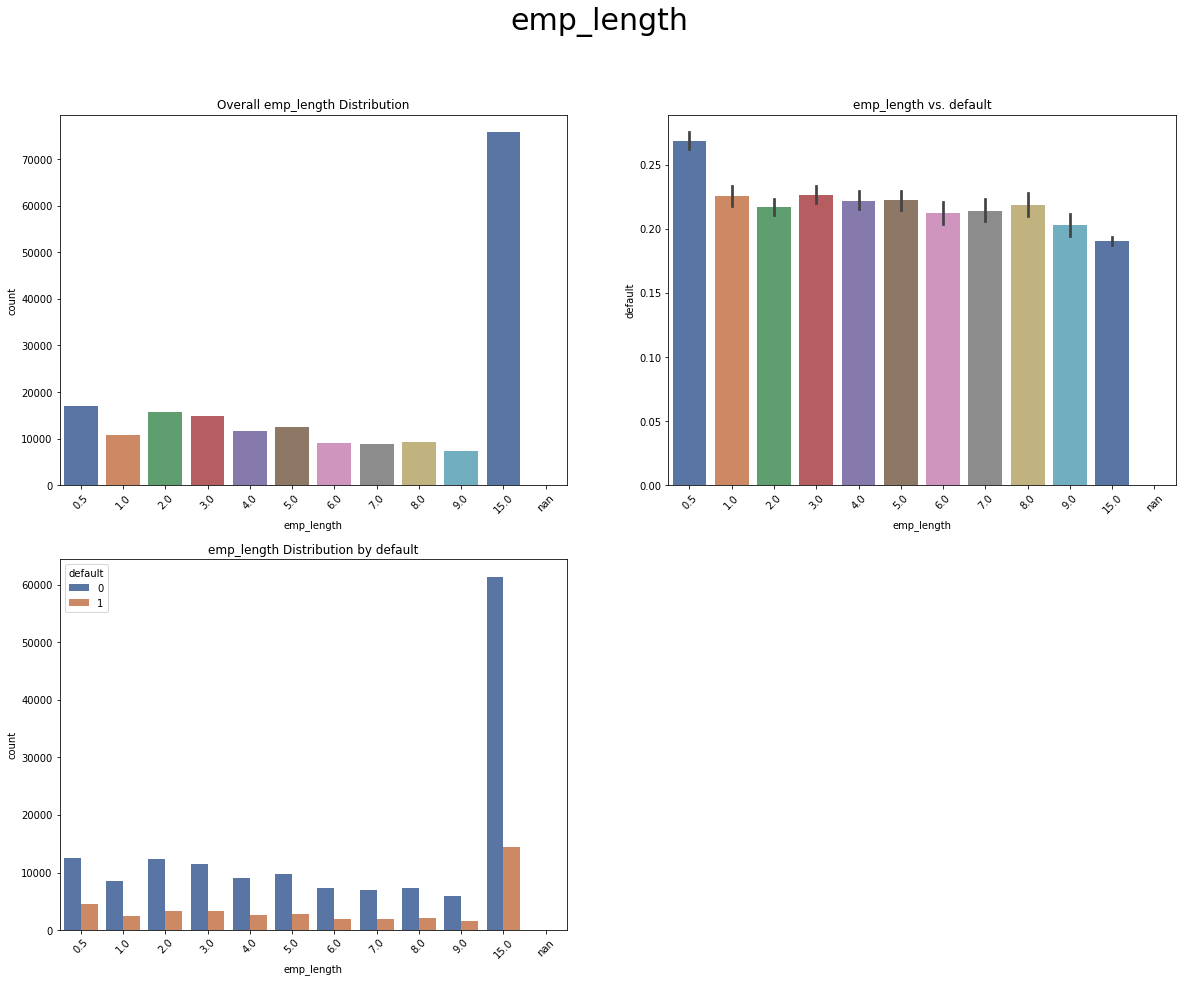

In [26]:
run_eda(data, 'emp_length')

### emp_title

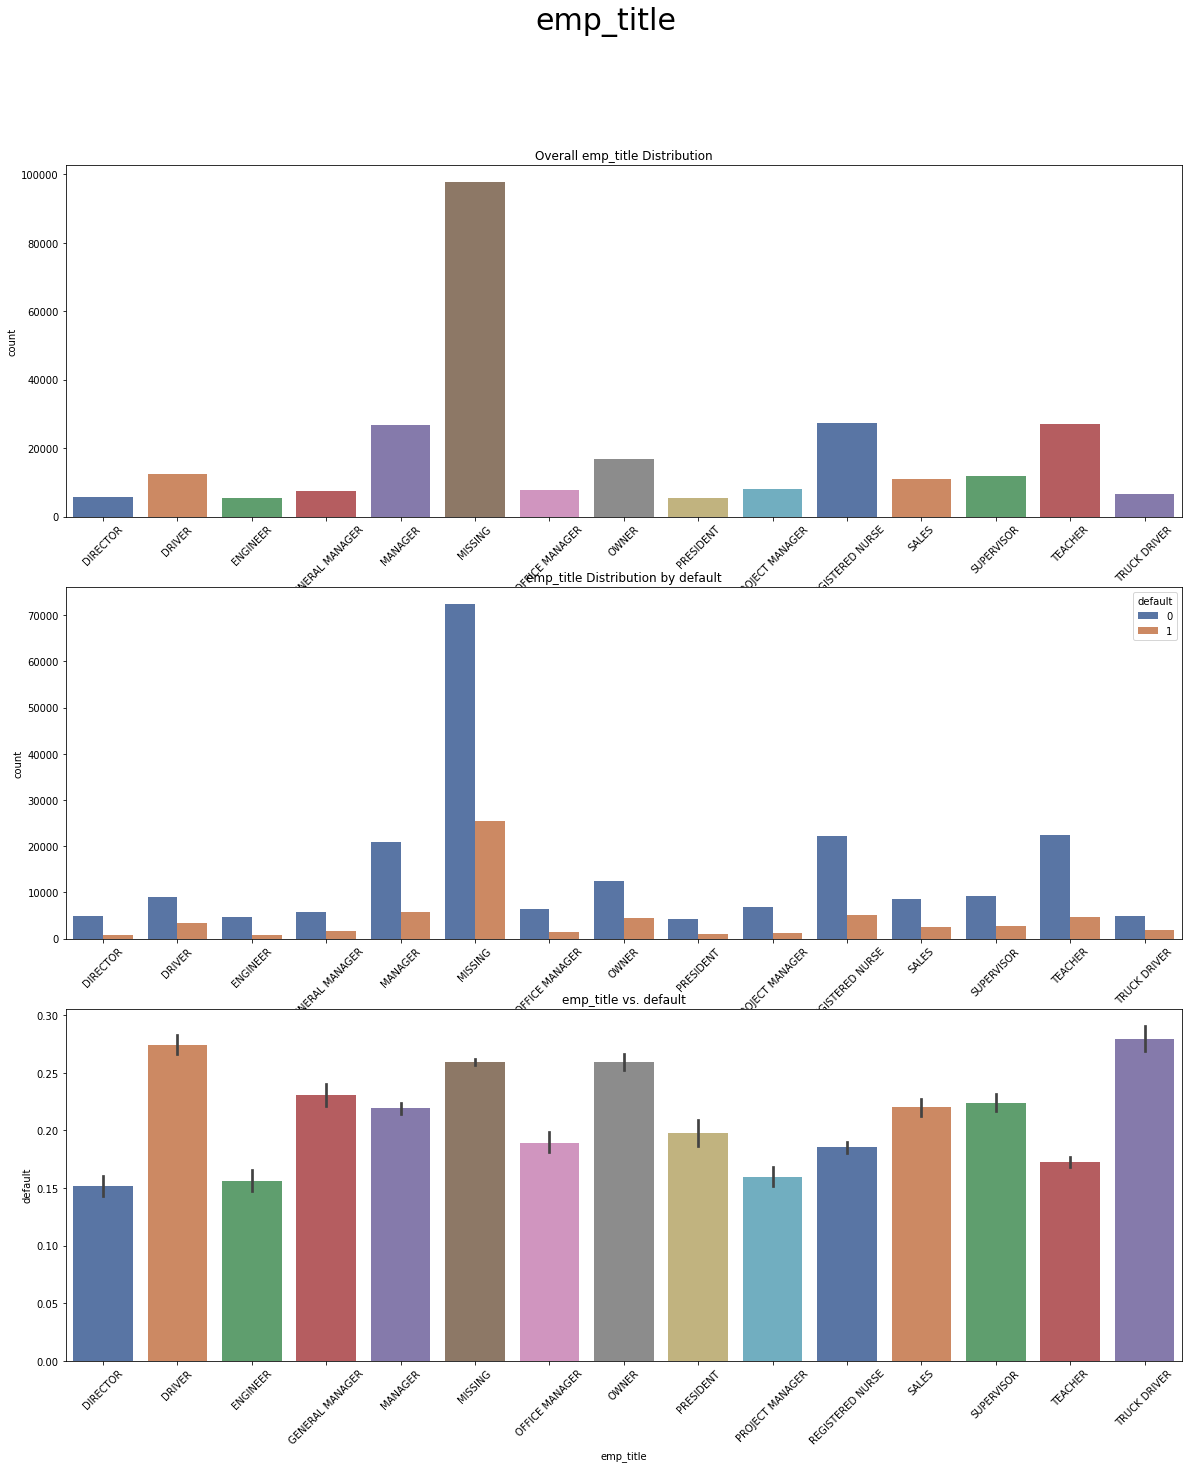

In [27]:
run_eda(data, 'emp_title')

### home_ownership

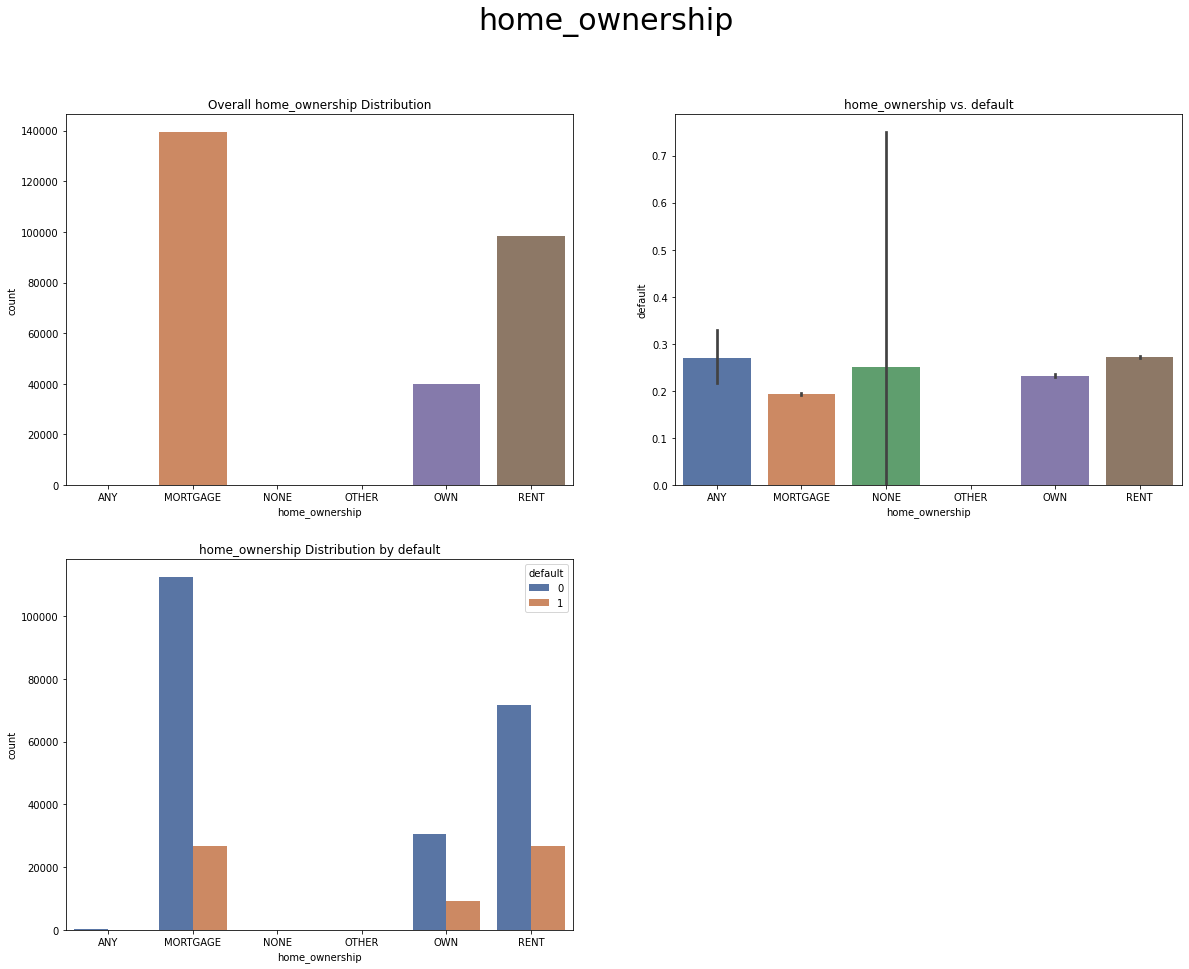

In [28]:
run_eda(data, 'home_ownership')

### annual_inc

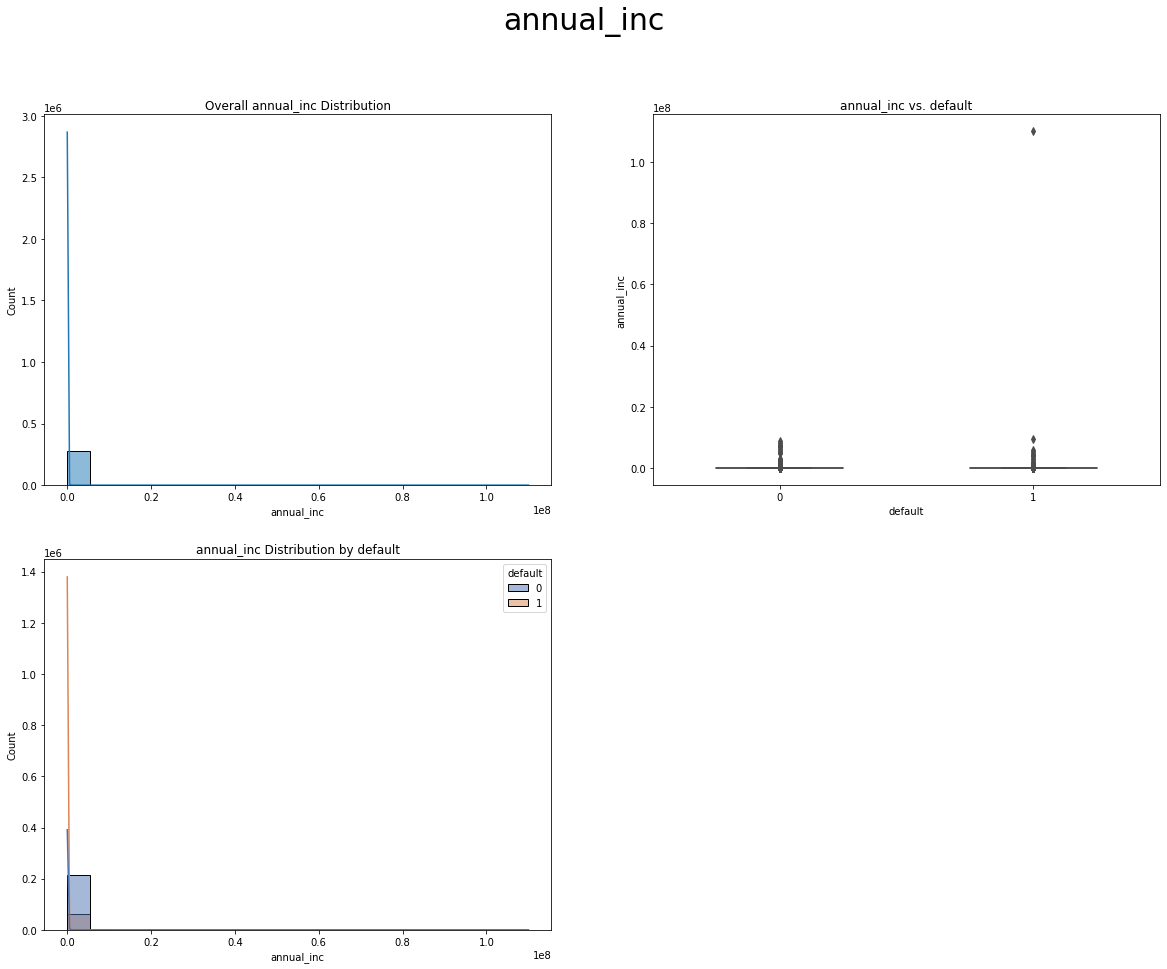

In [29]:
run_eda(data, 'annual_inc')

### verification_status

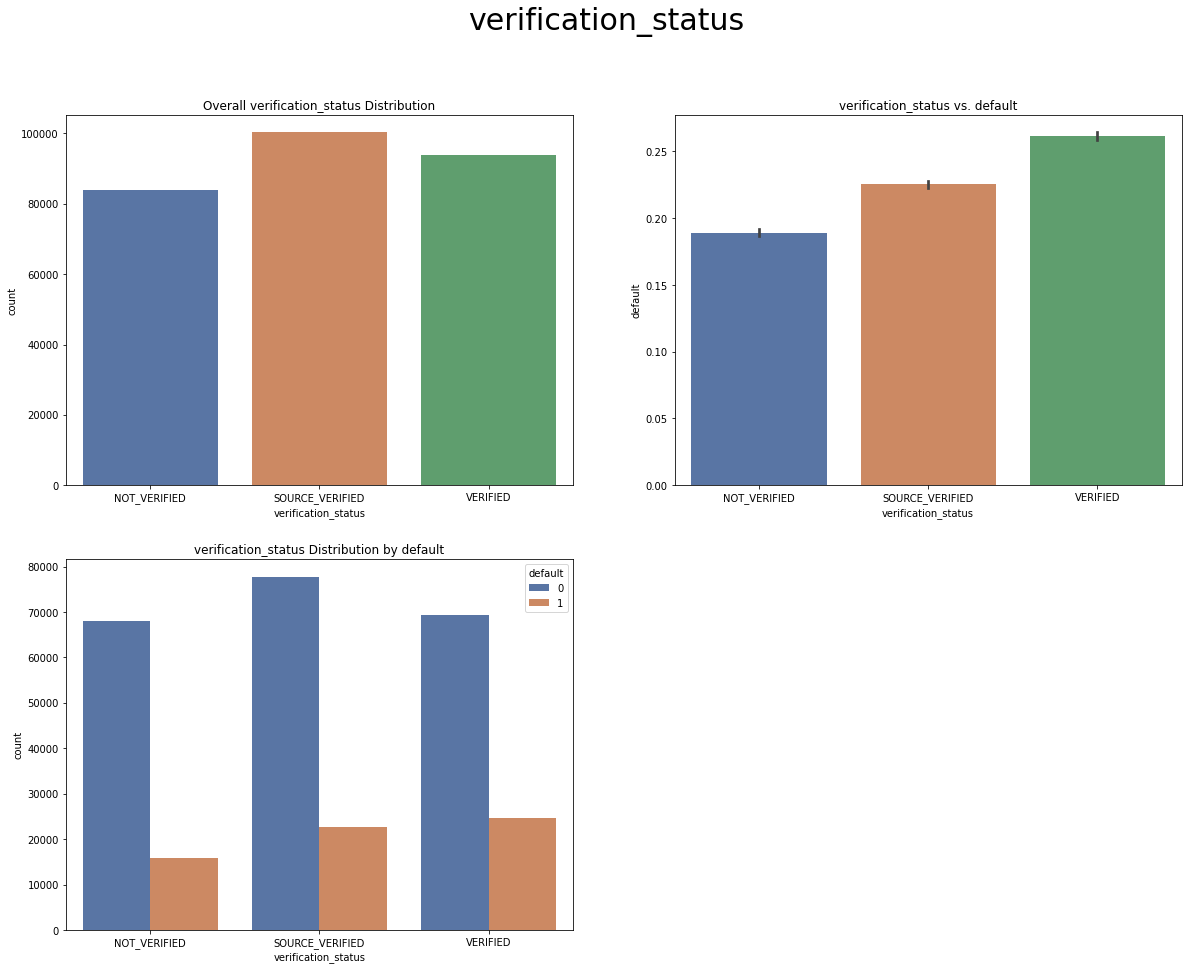

In [30]:
run_eda(data, 'verification_status')

### purpose

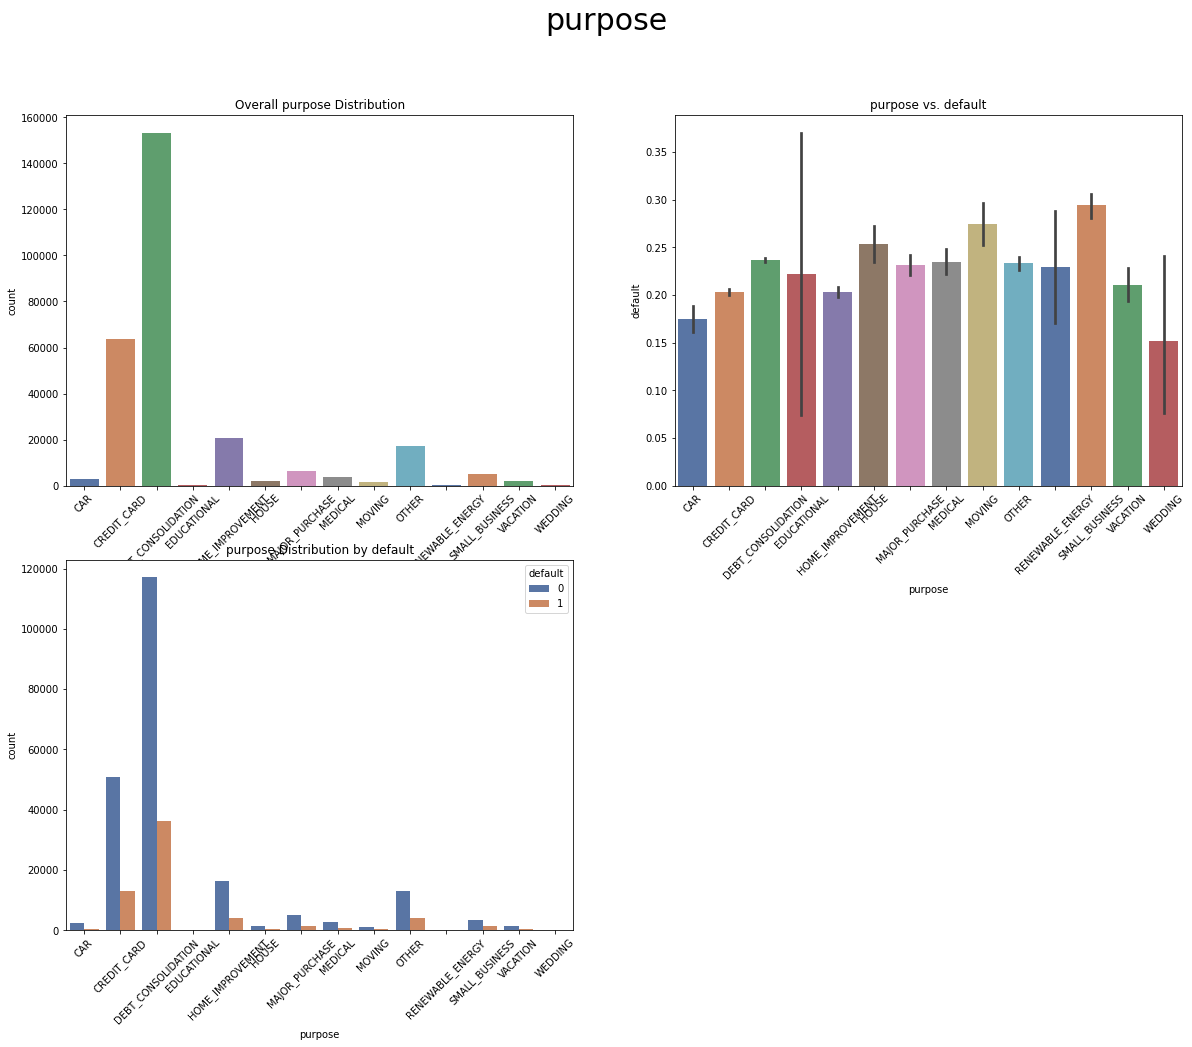

In [31]:
run_eda(data, 'purpose')

### dti

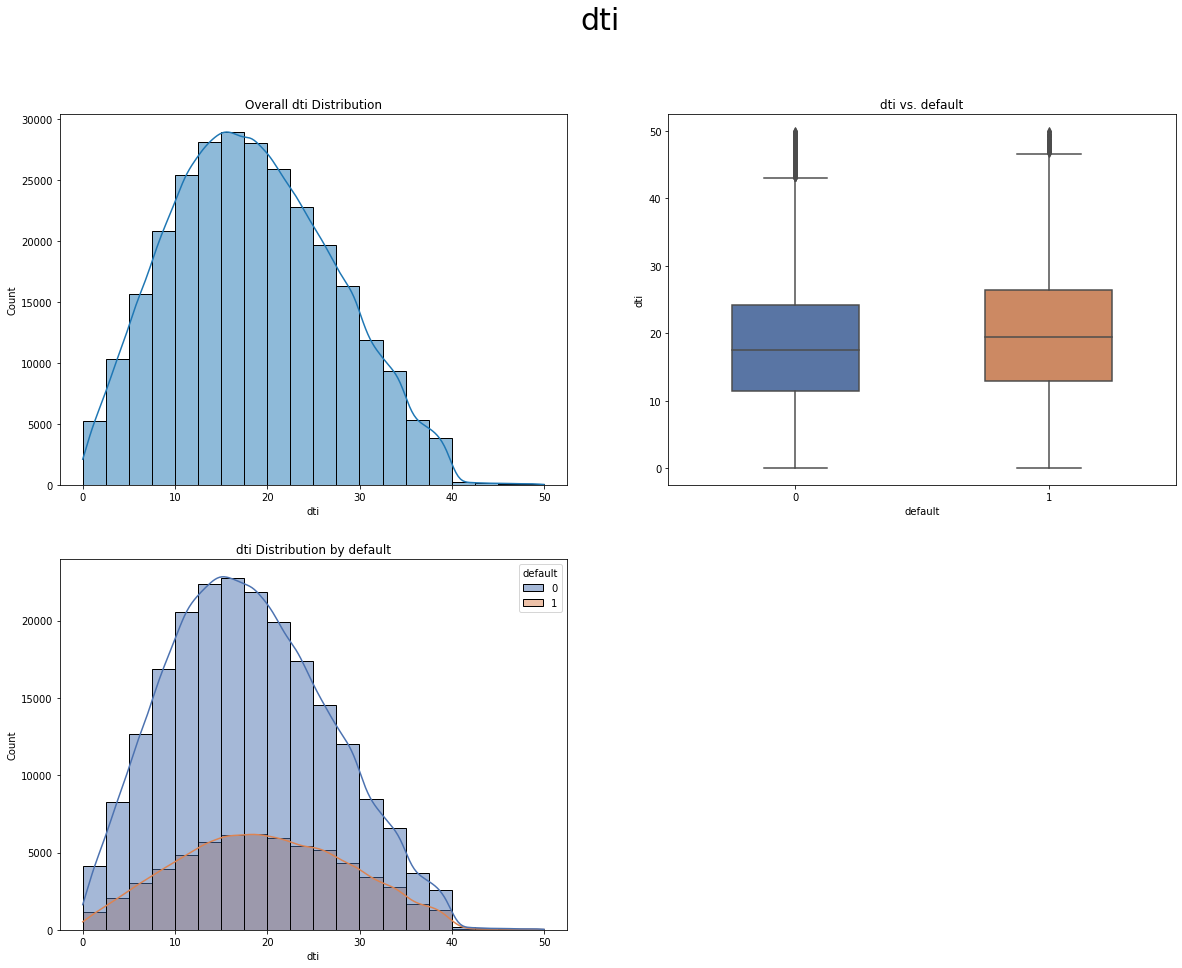

In [32]:
run_eda(data, 'dti')

### addr_state

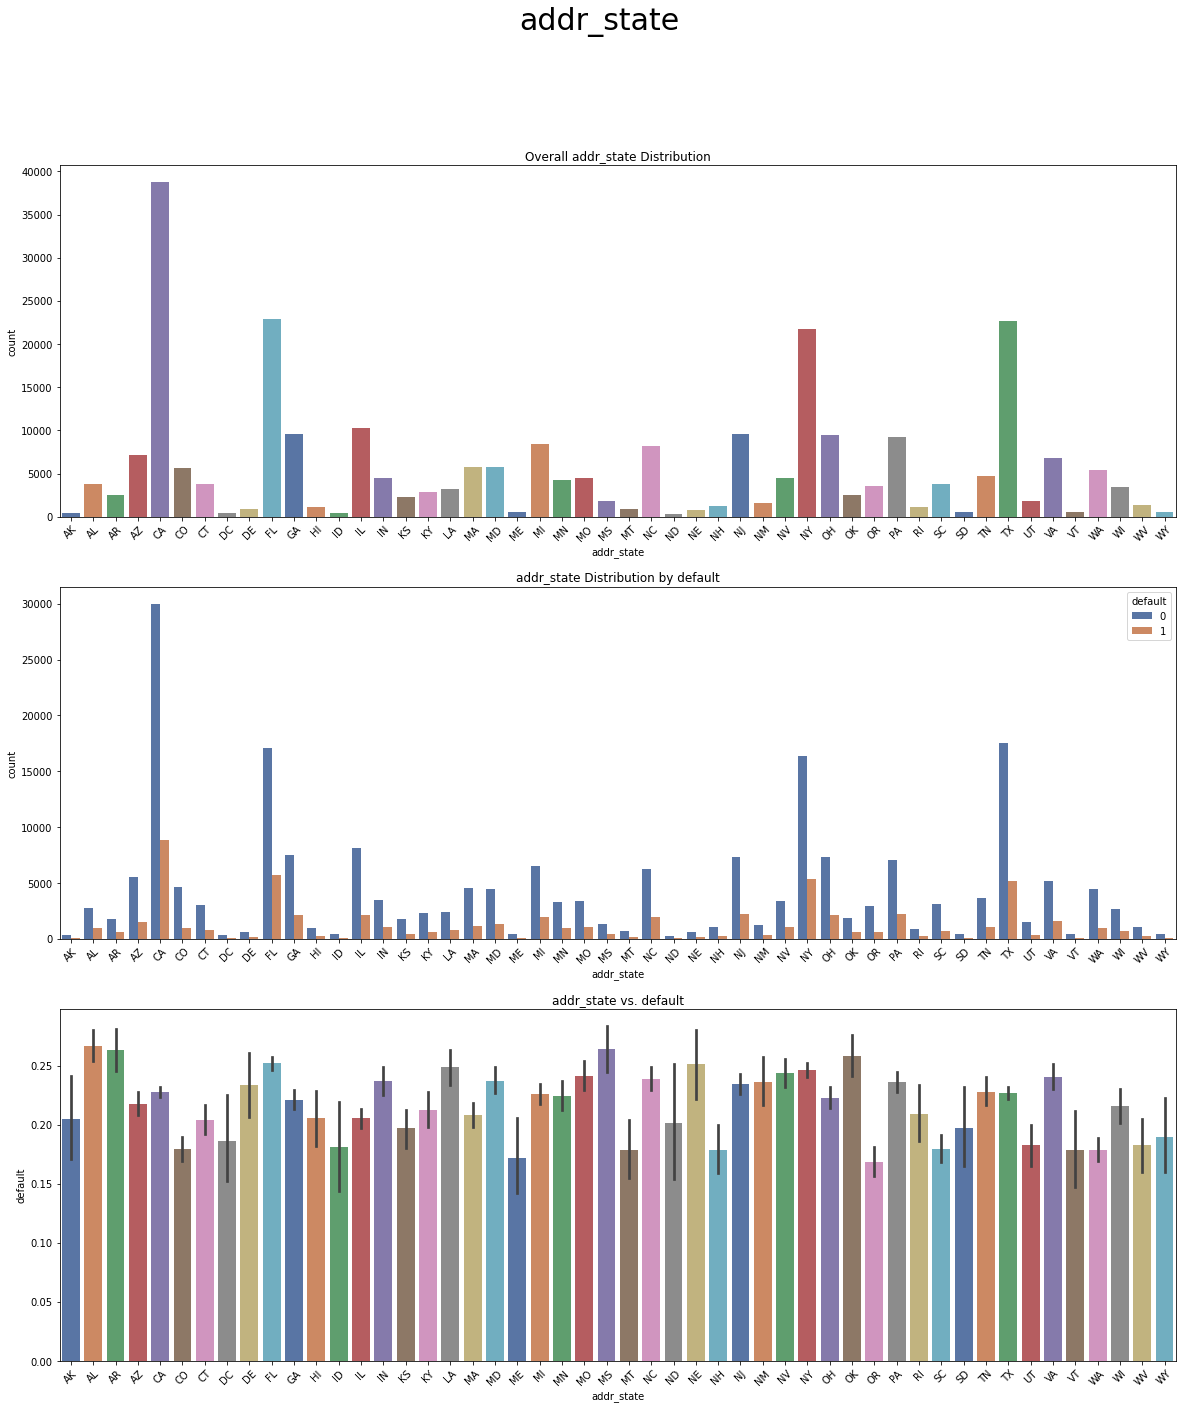

In [33]:
run_eda(data, 'addr_state')

### open_acc

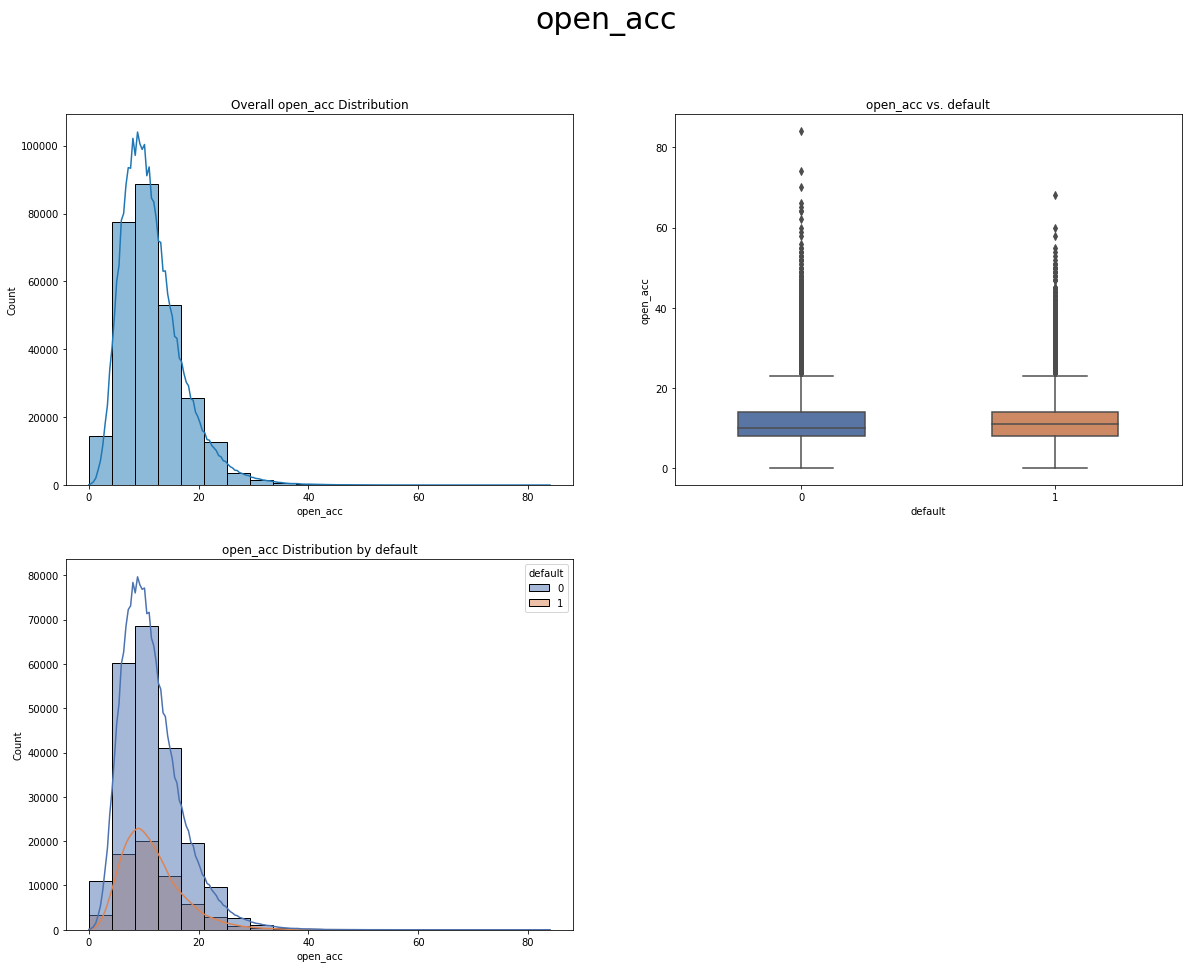

In [34]:
run_eda(data, 'open_acc')

### pub_rec

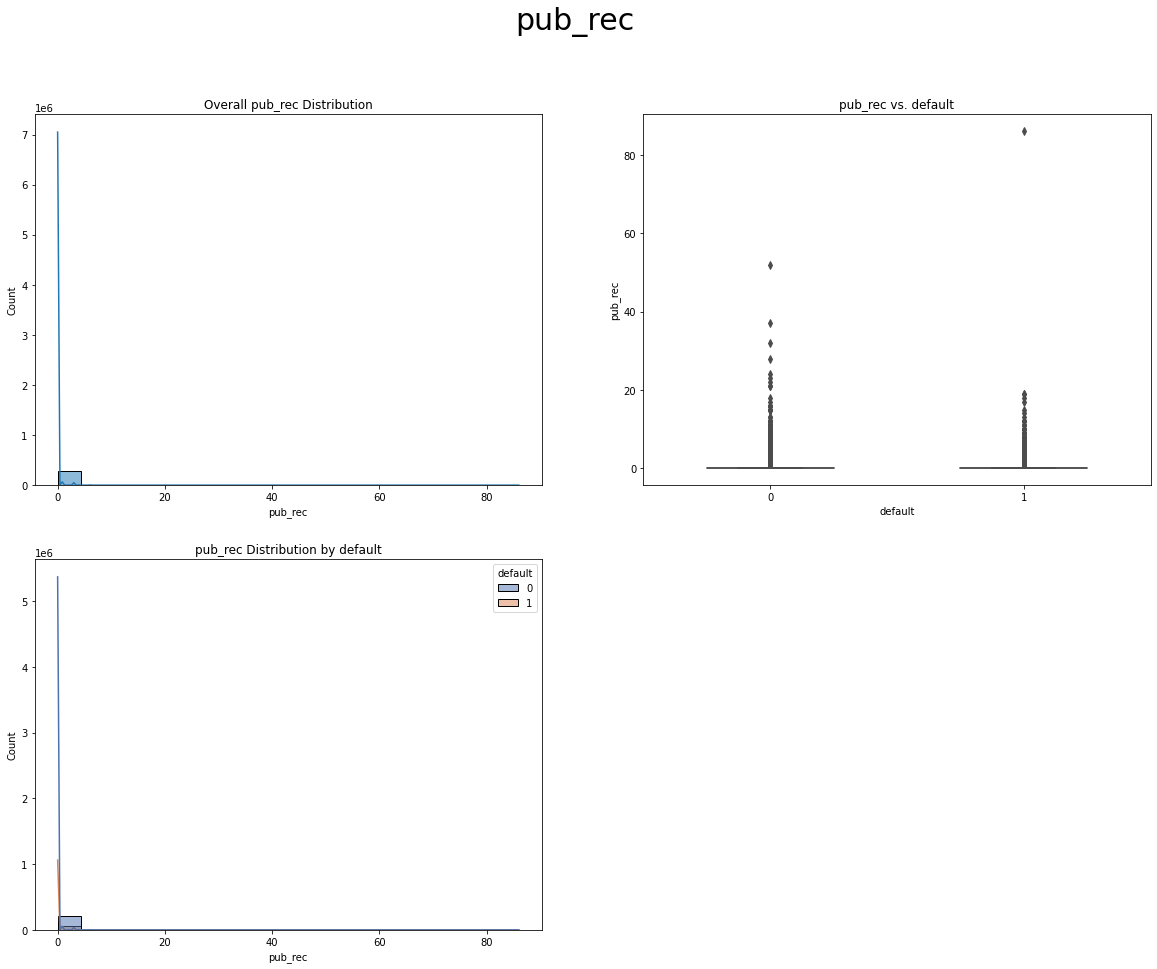

In [35]:
run_eda(data, 'pub_rec')

### revol_bal

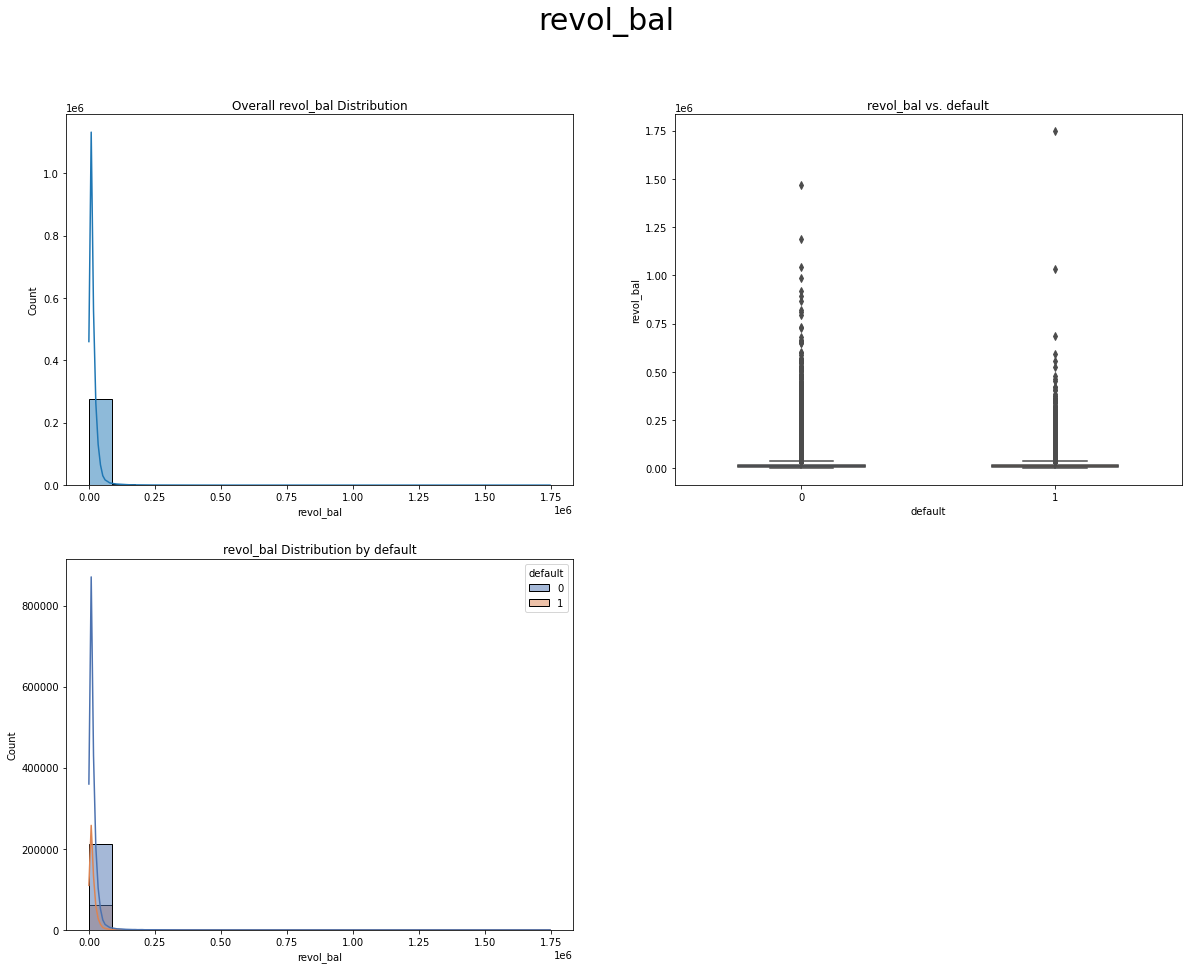

In [36]:
run_eda(data, 'revol_bal')

### revol_util 

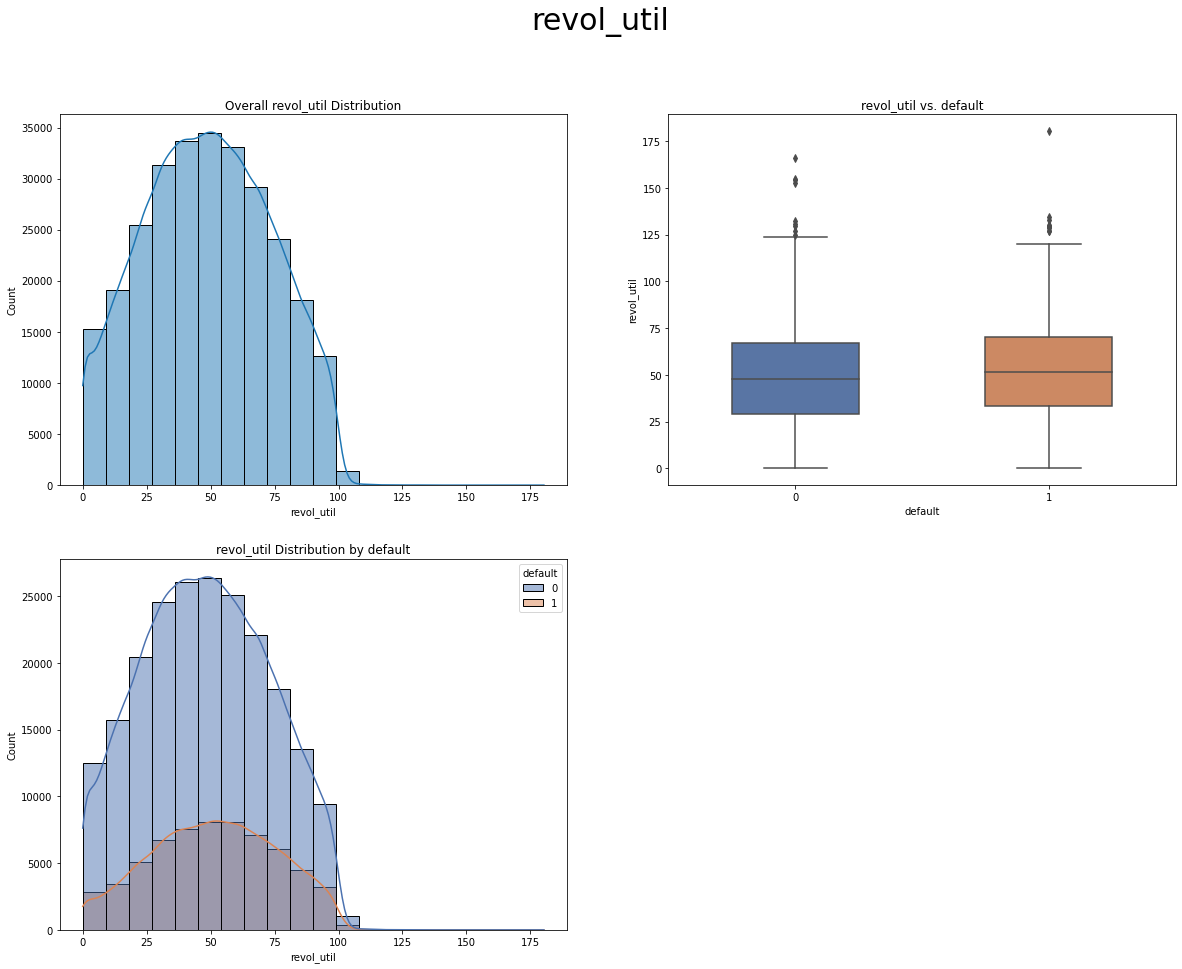

In [37]:
run_eda(data, 'revol_util')

### total_acc

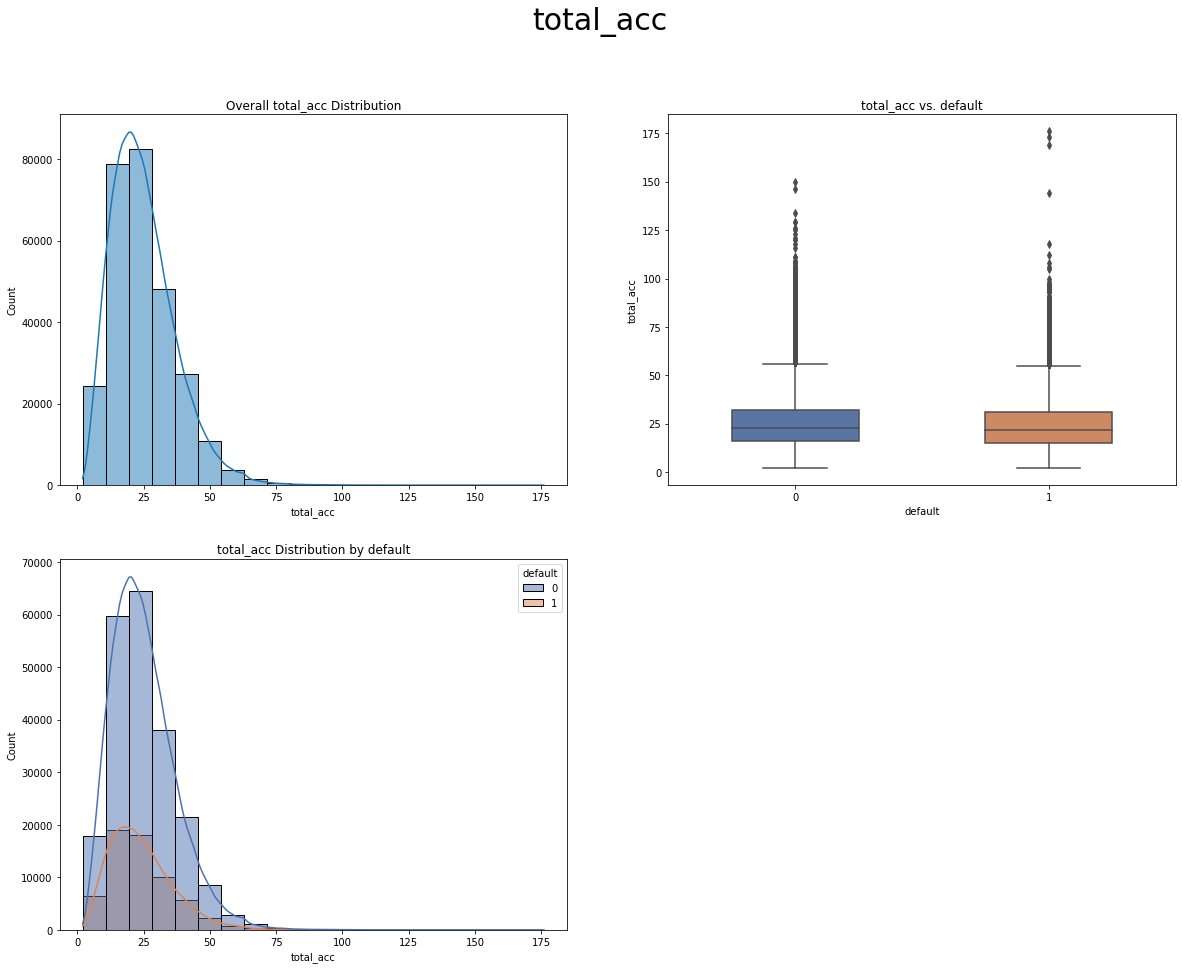

In [38]:
run_eda(data, 'total_acc')

### initial_list_status

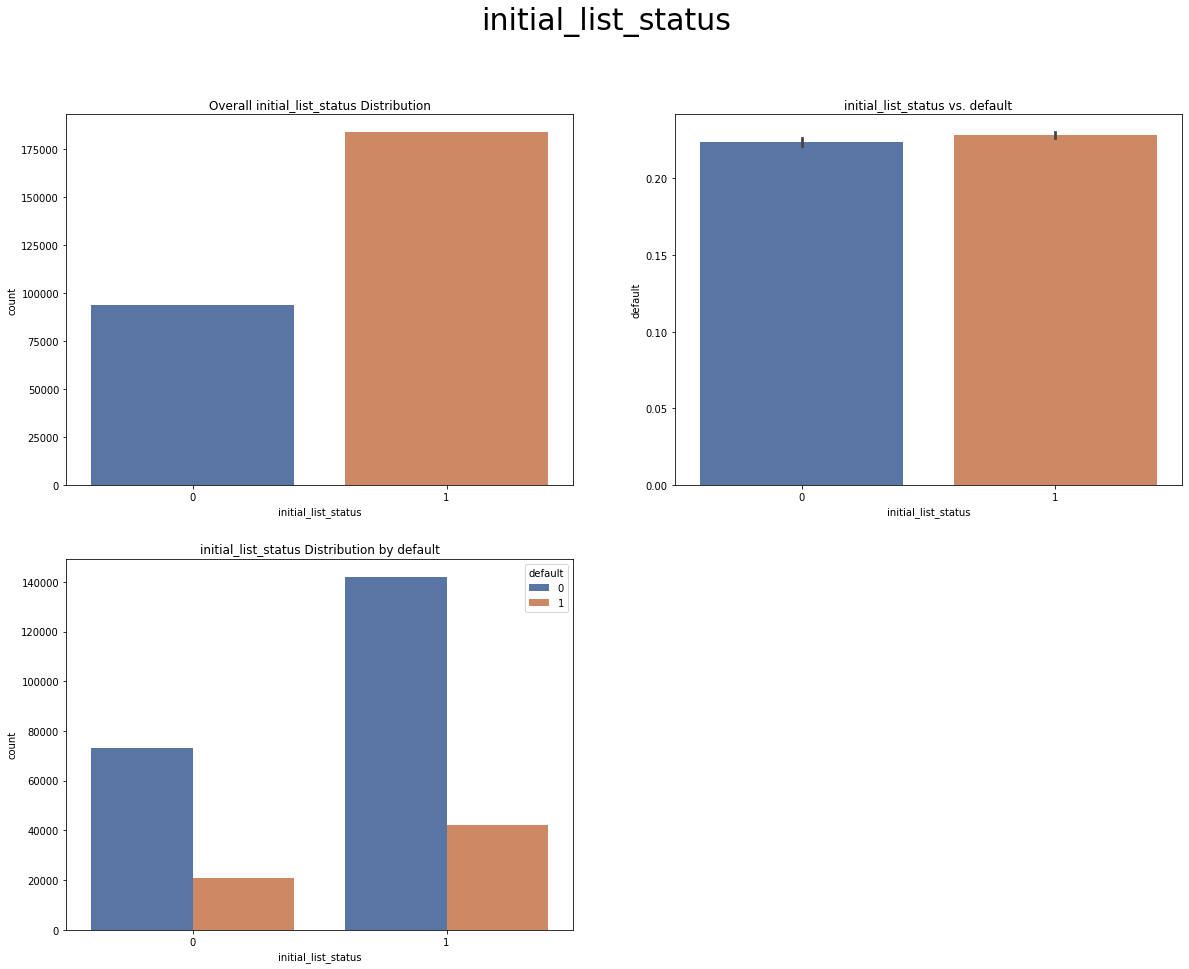

In [39]:
run_eda(data, 'initial_list_status')

### pub_rec_bankruptcies

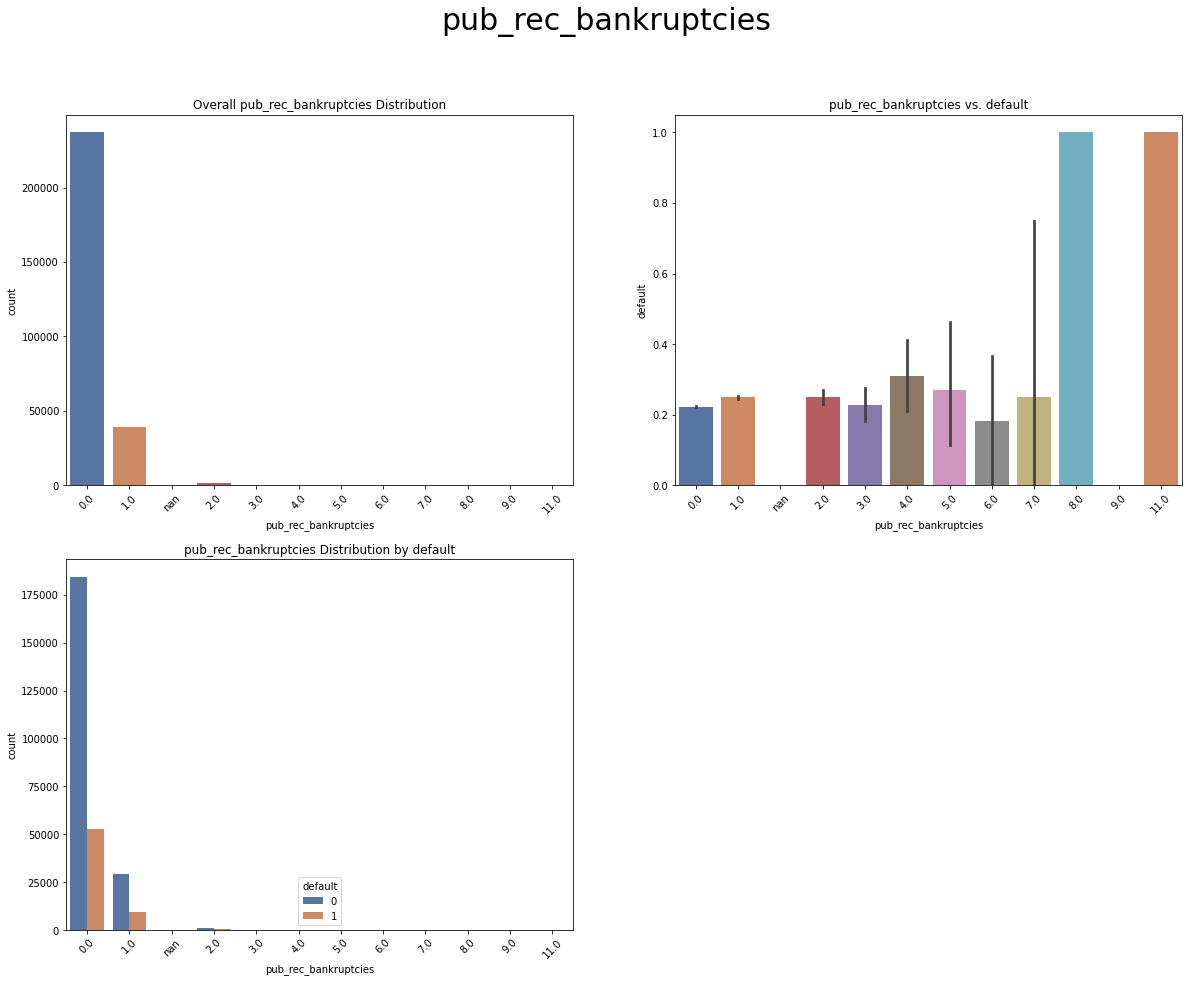

In [40]:
run_eda(data, 'pub_rec_bankruptcies')

### mort_acc

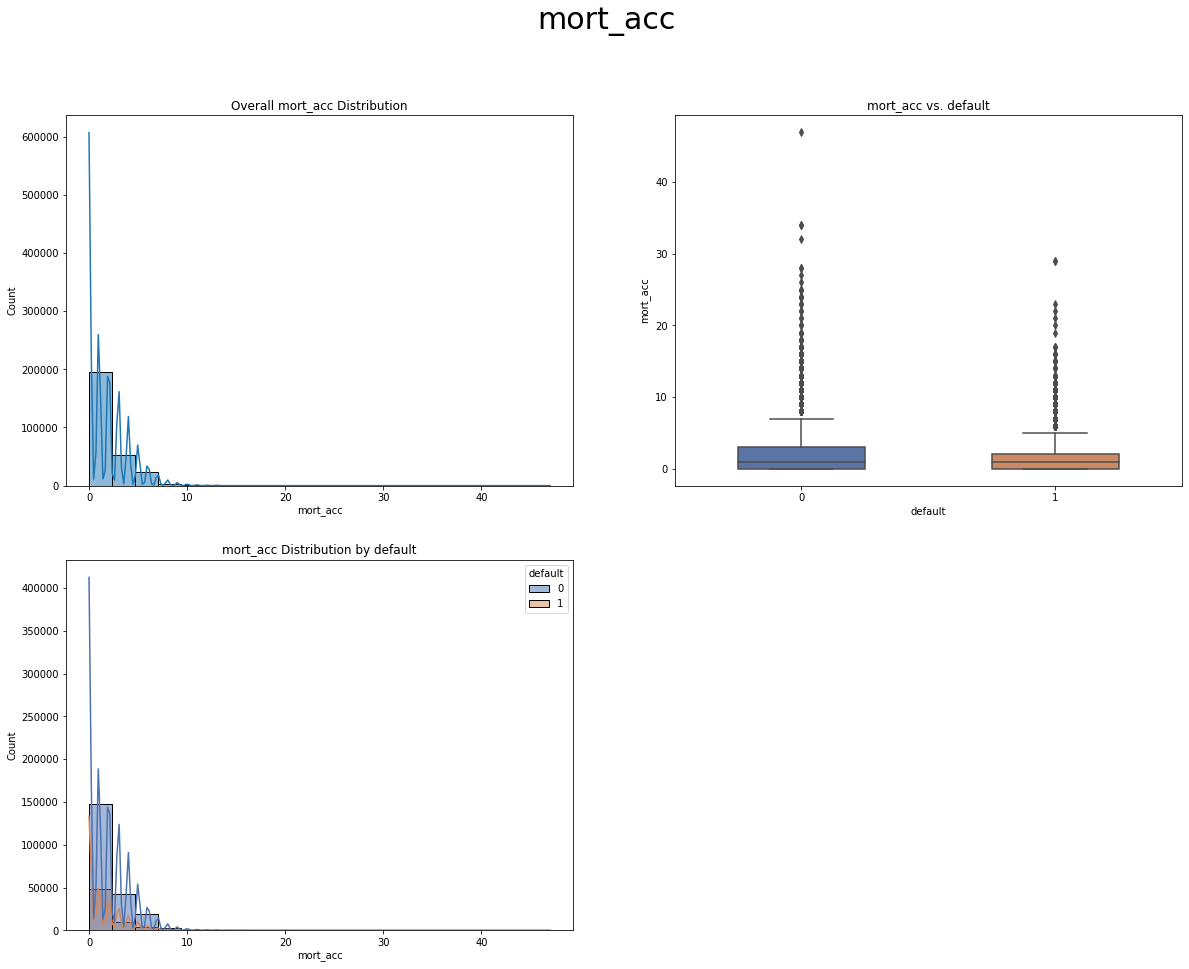

In [41]:
run_eda(data, 'mort_acc')

### manager

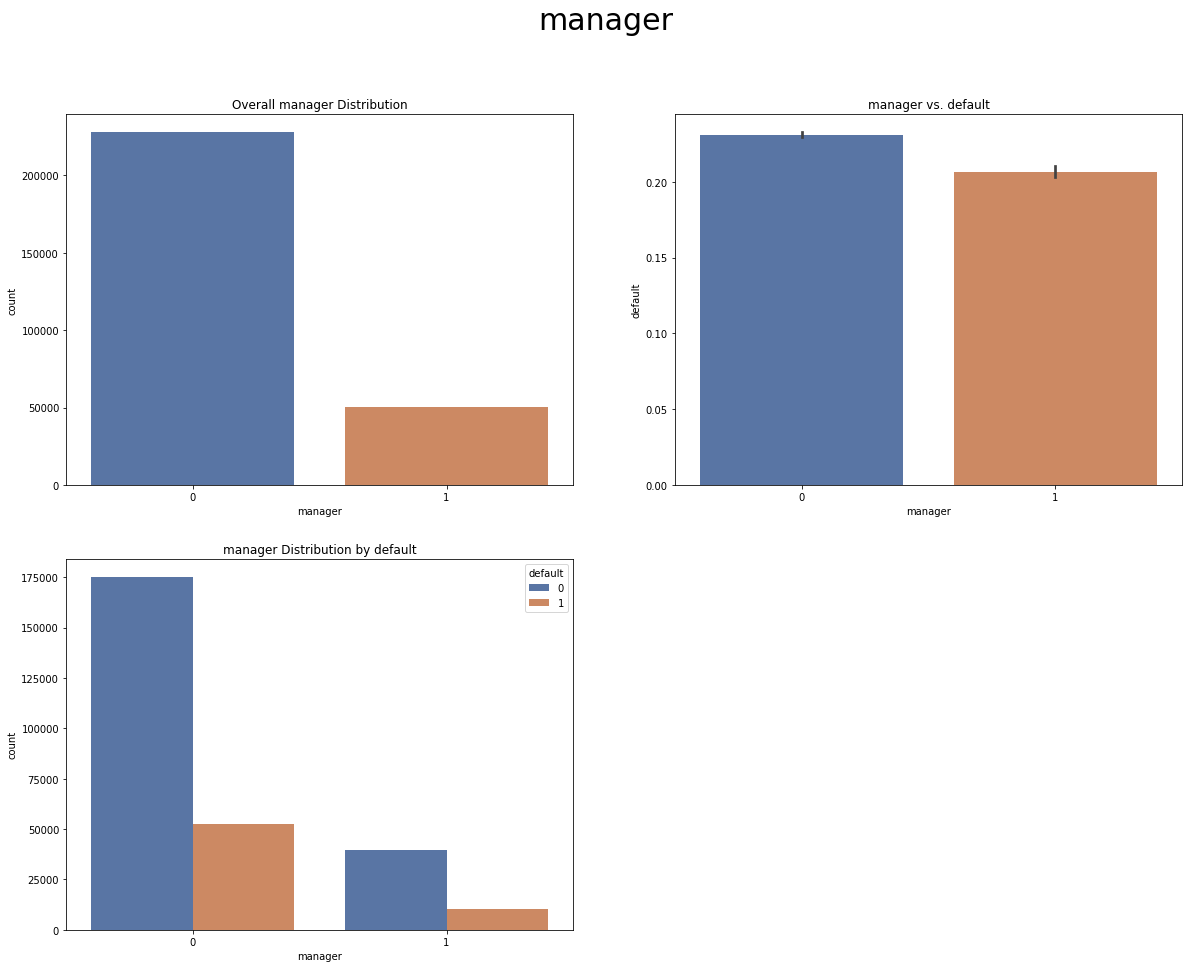

In [42]:
run_eda(data, 'manager')

### fico

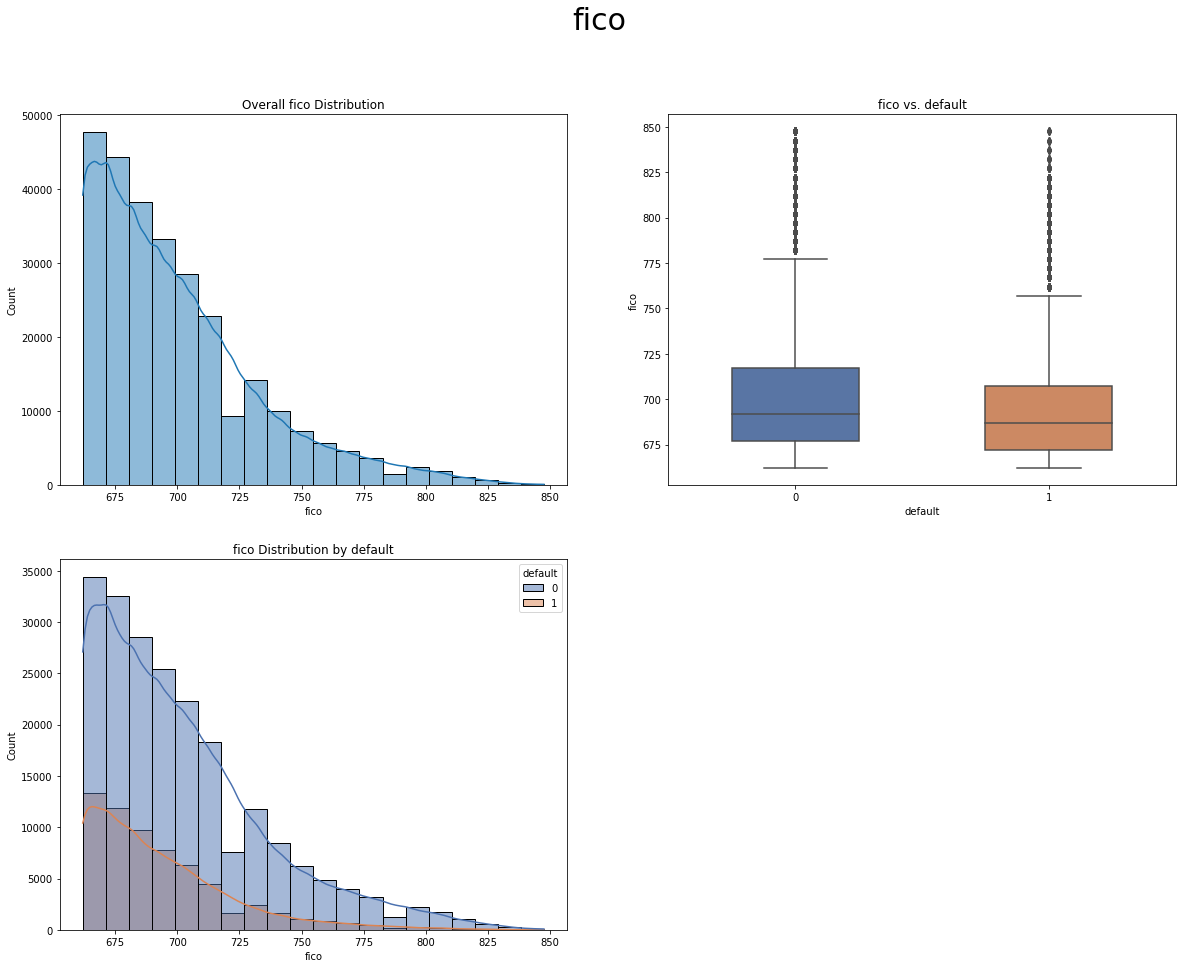

In [43]:
run_eda(data, 'fico')

### issue_yr

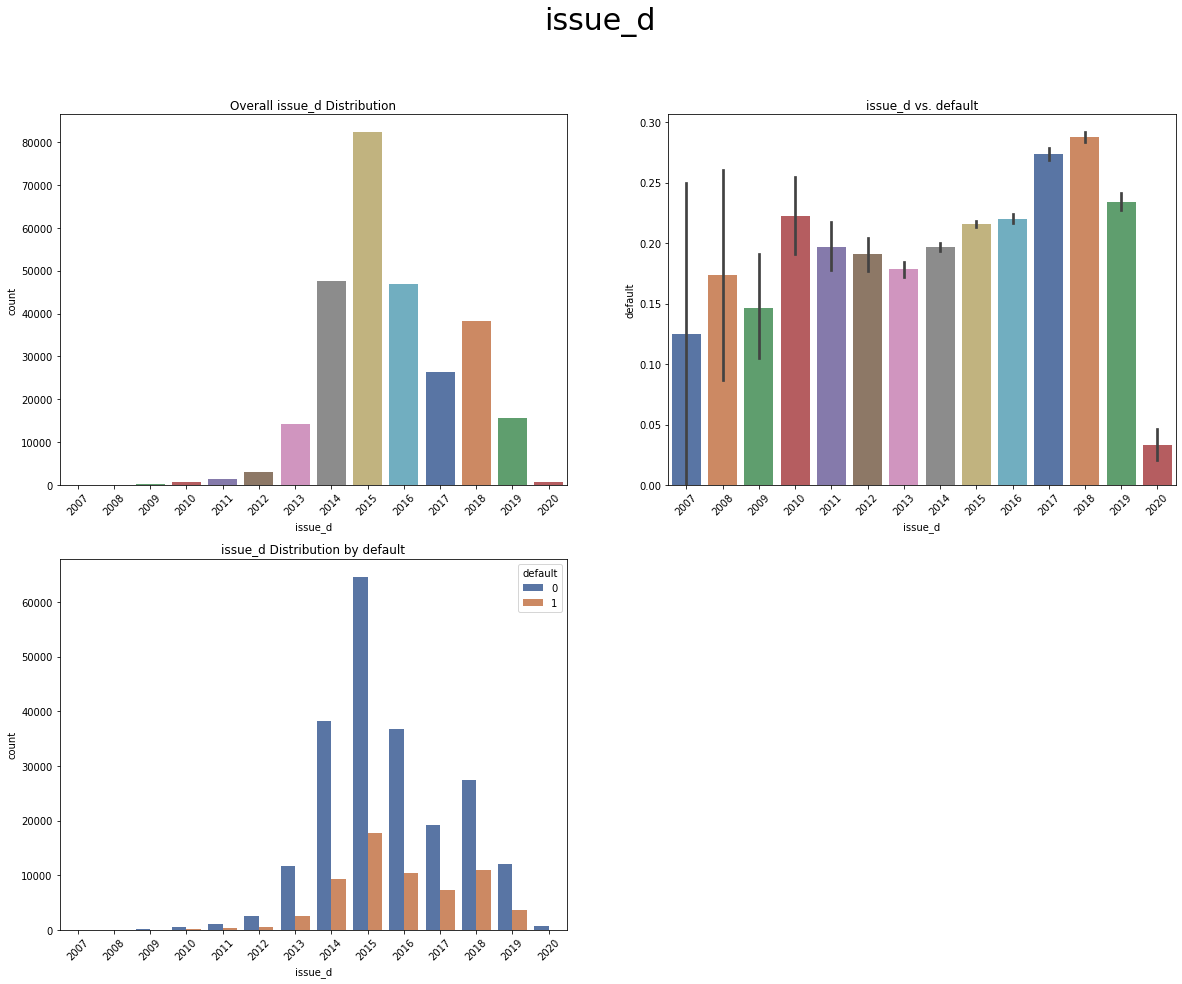

In [44]:
run_eda(data, 'issue_d')

### yrs_cr_line

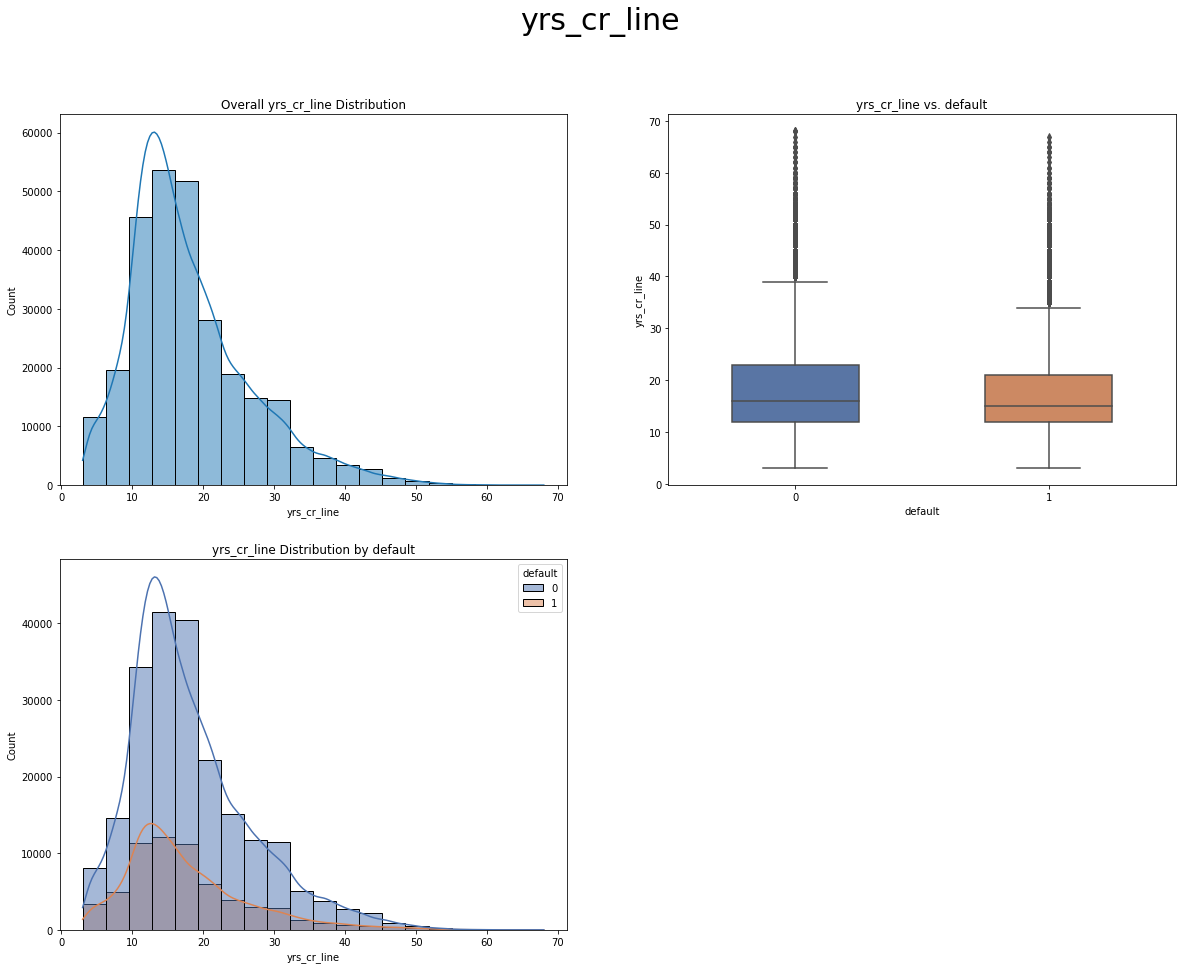

In [45]:
run_eda(data, 'yrs_cr_line')

# Full Feature List EDA

## a) without Outlier Removal

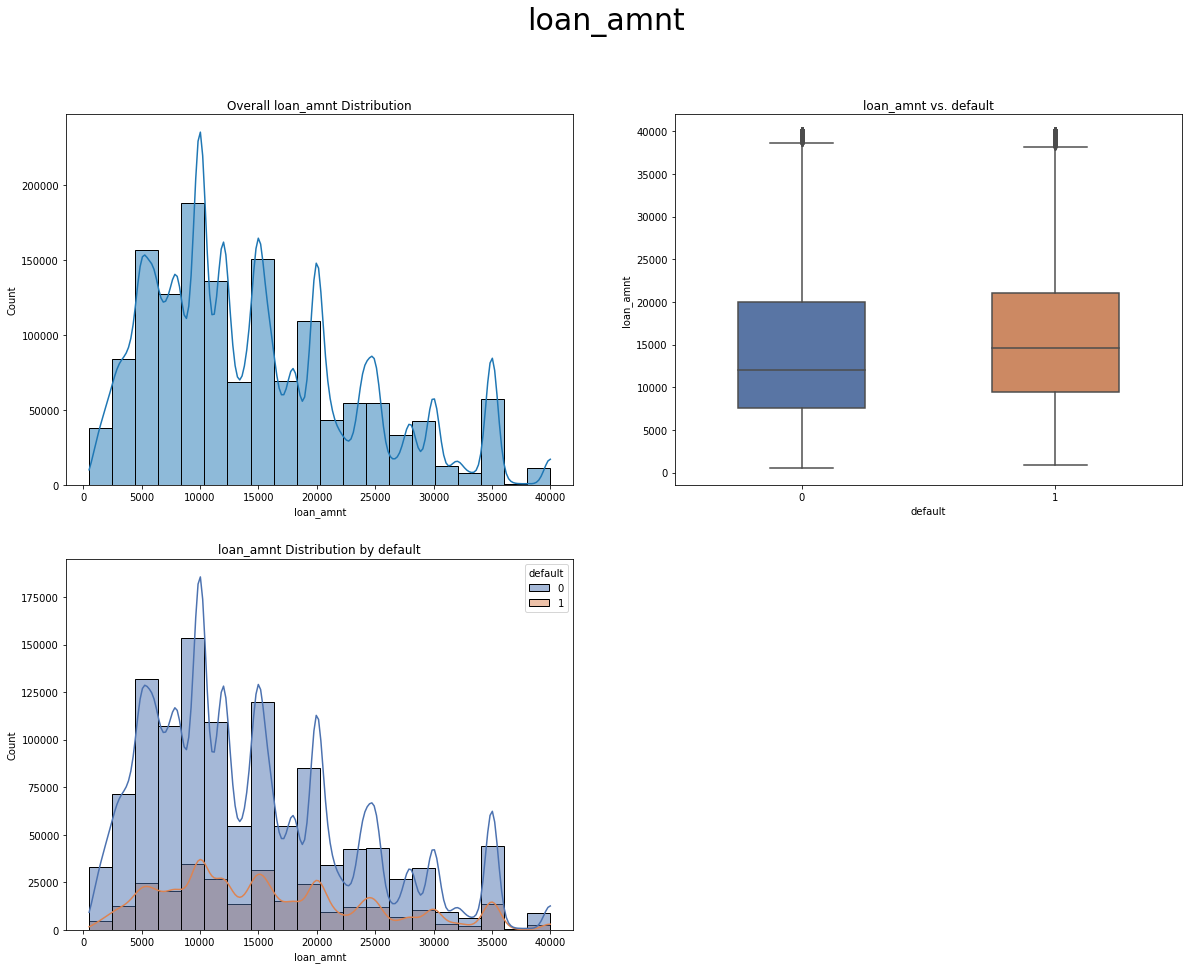

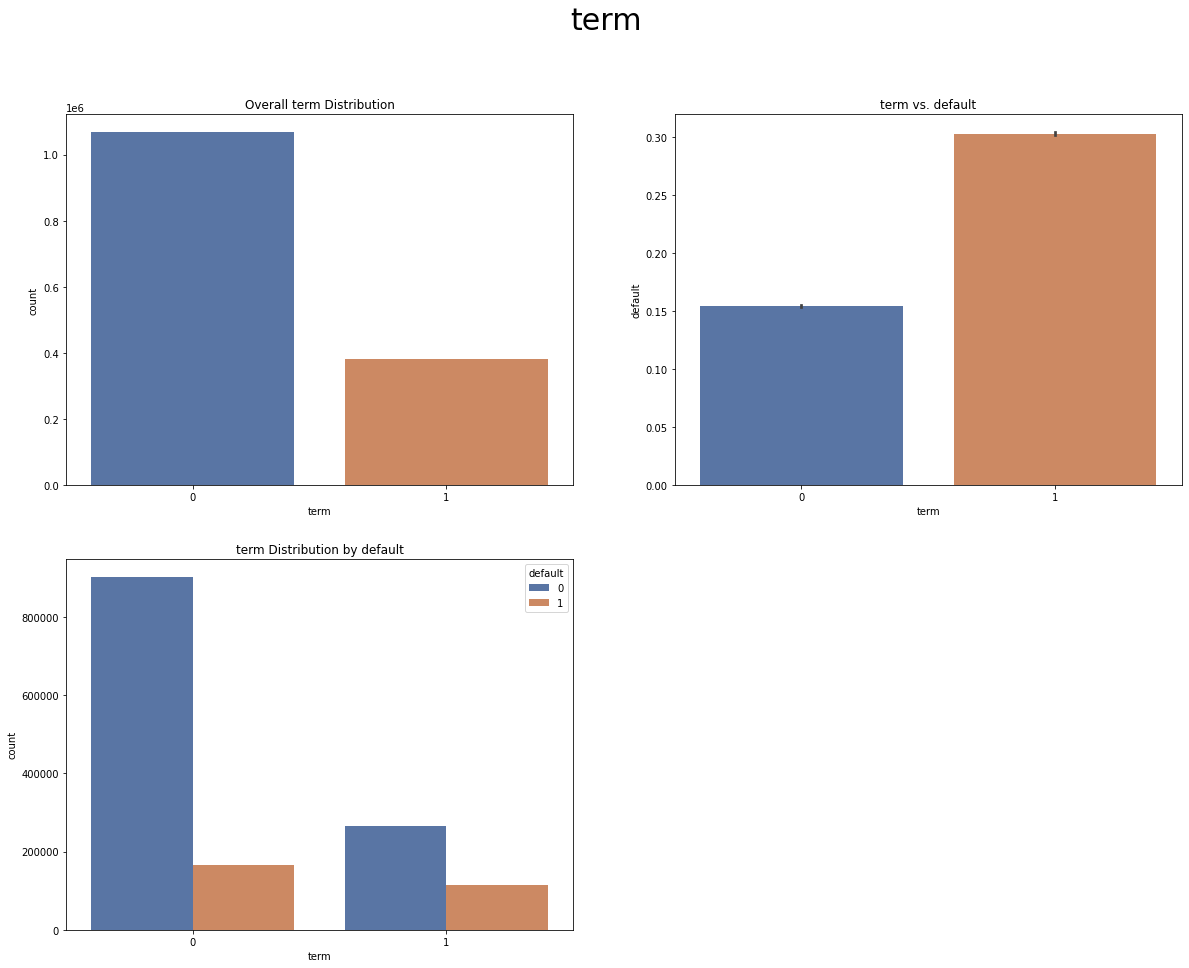

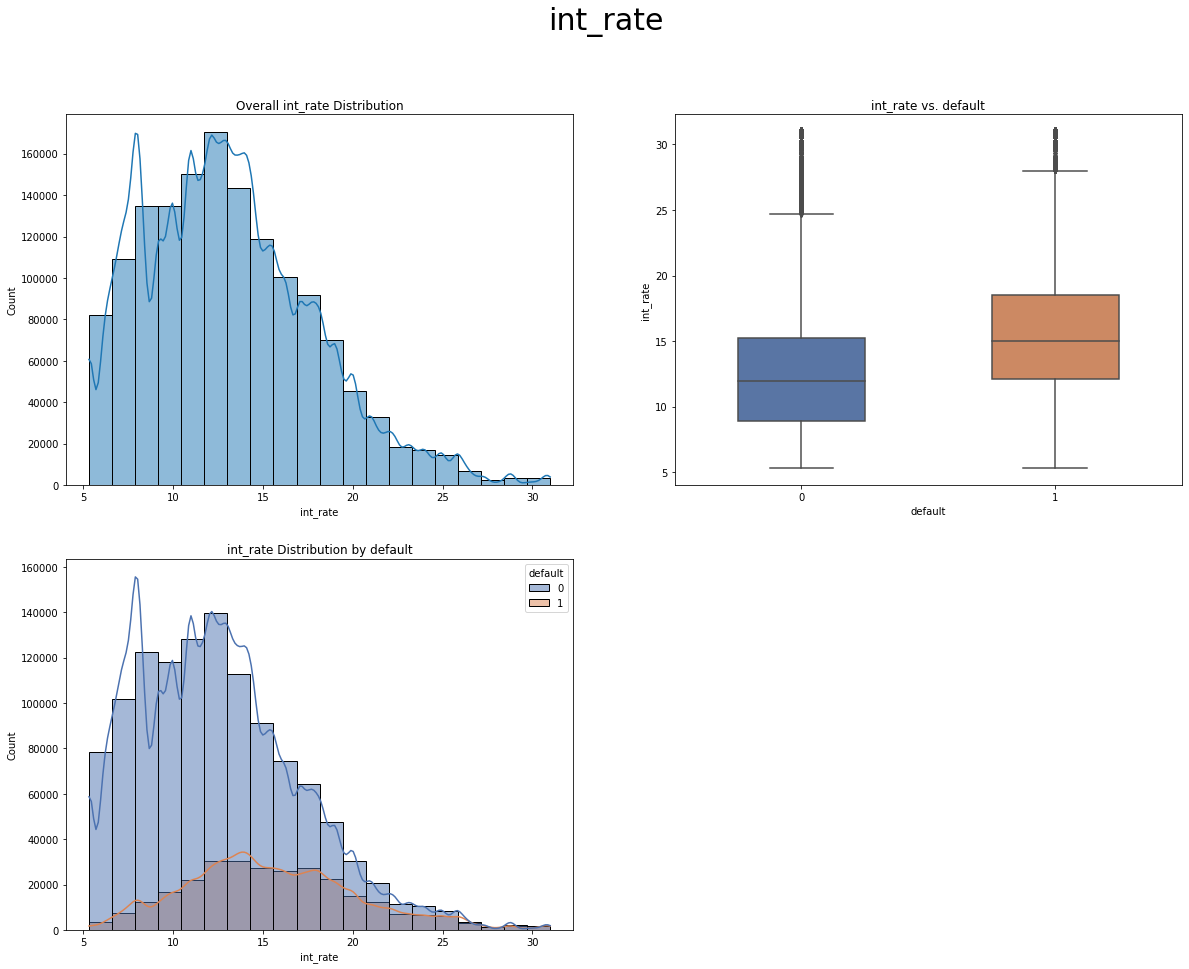

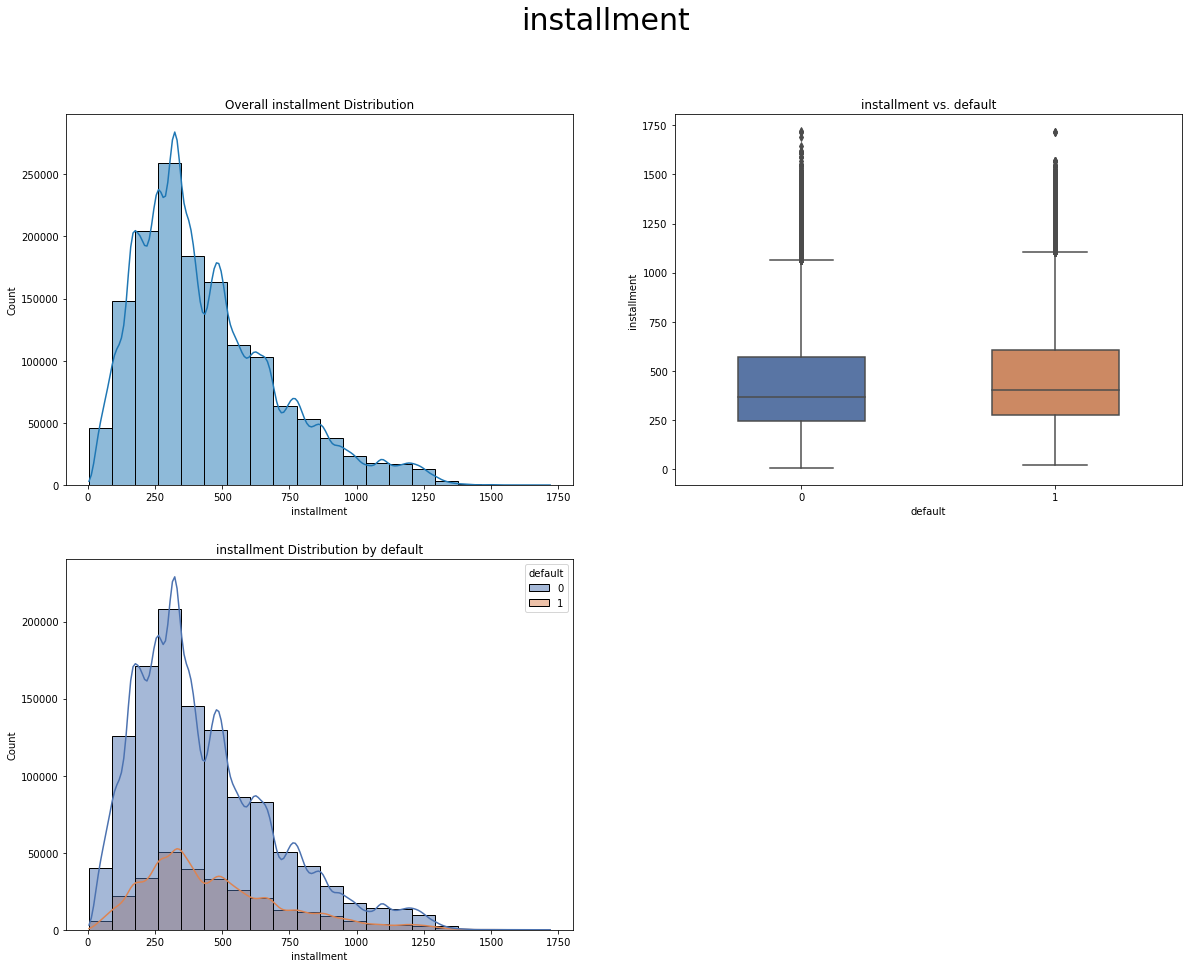

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

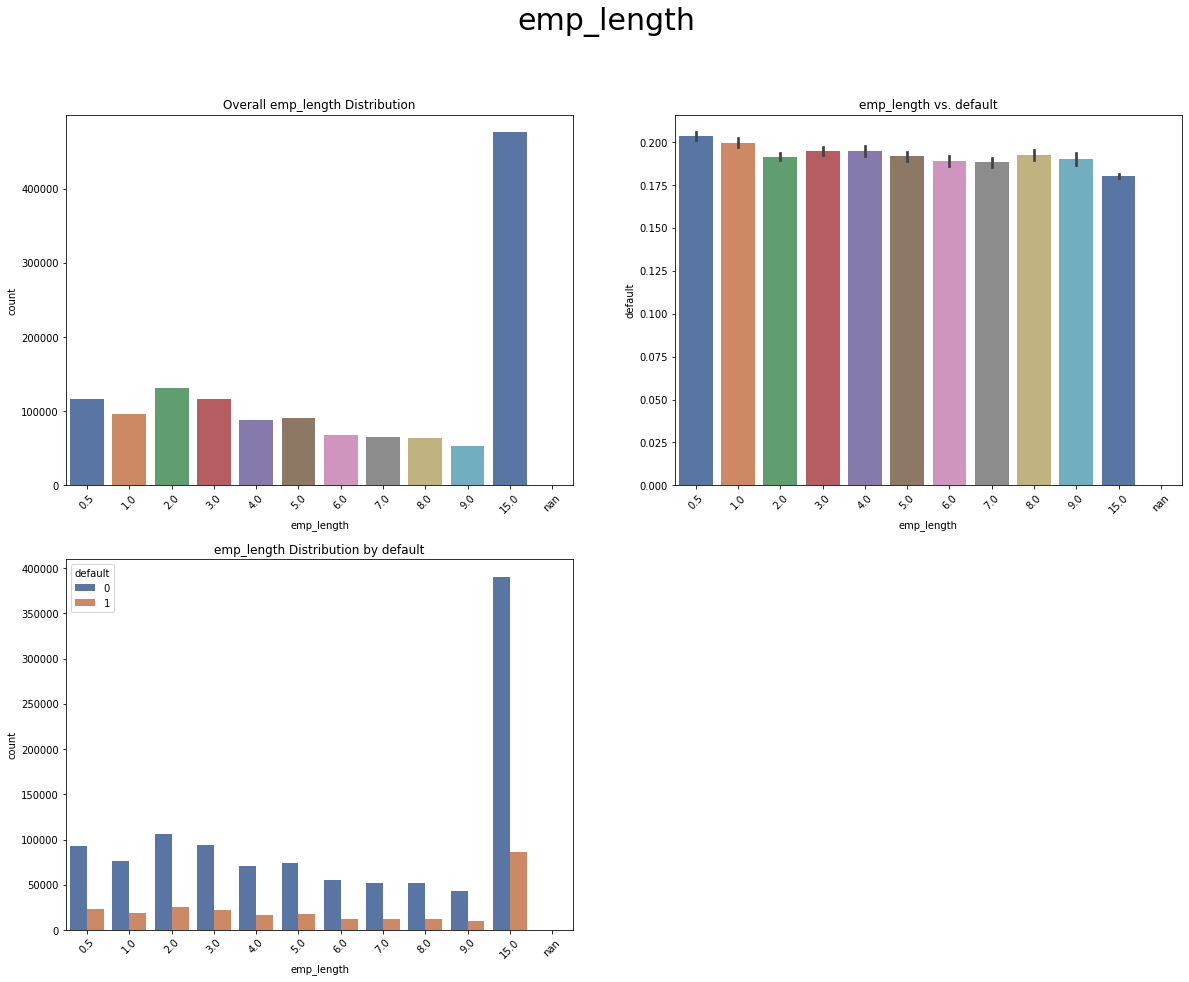

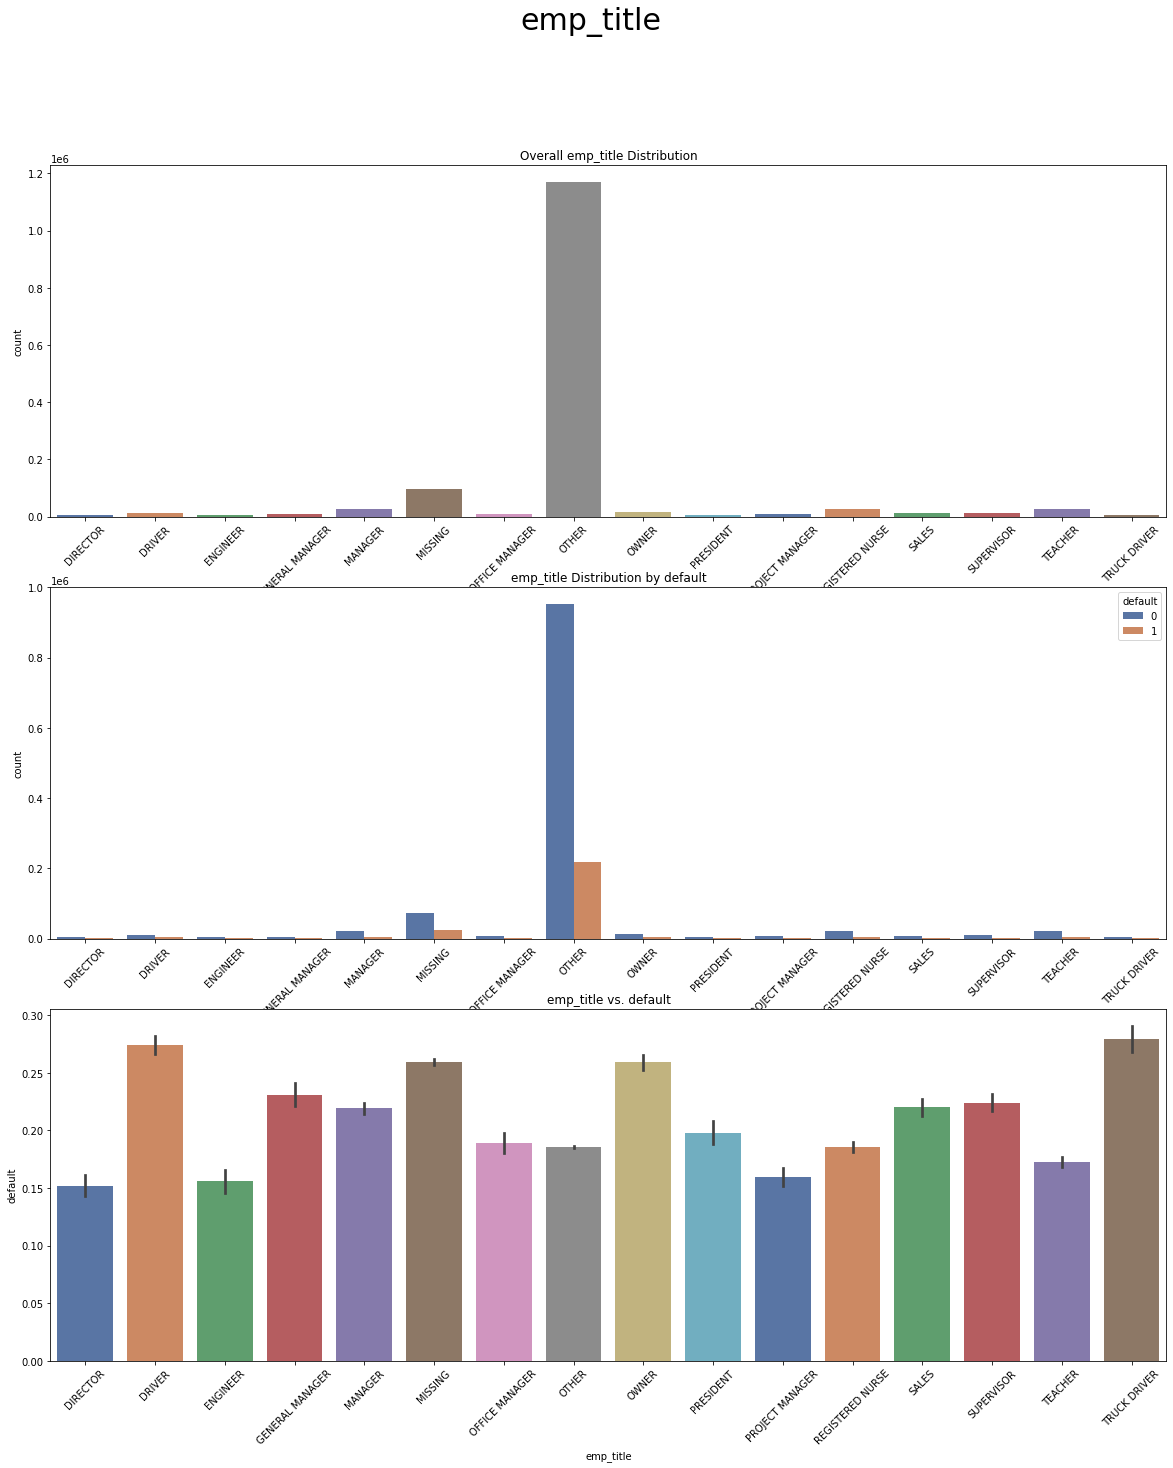

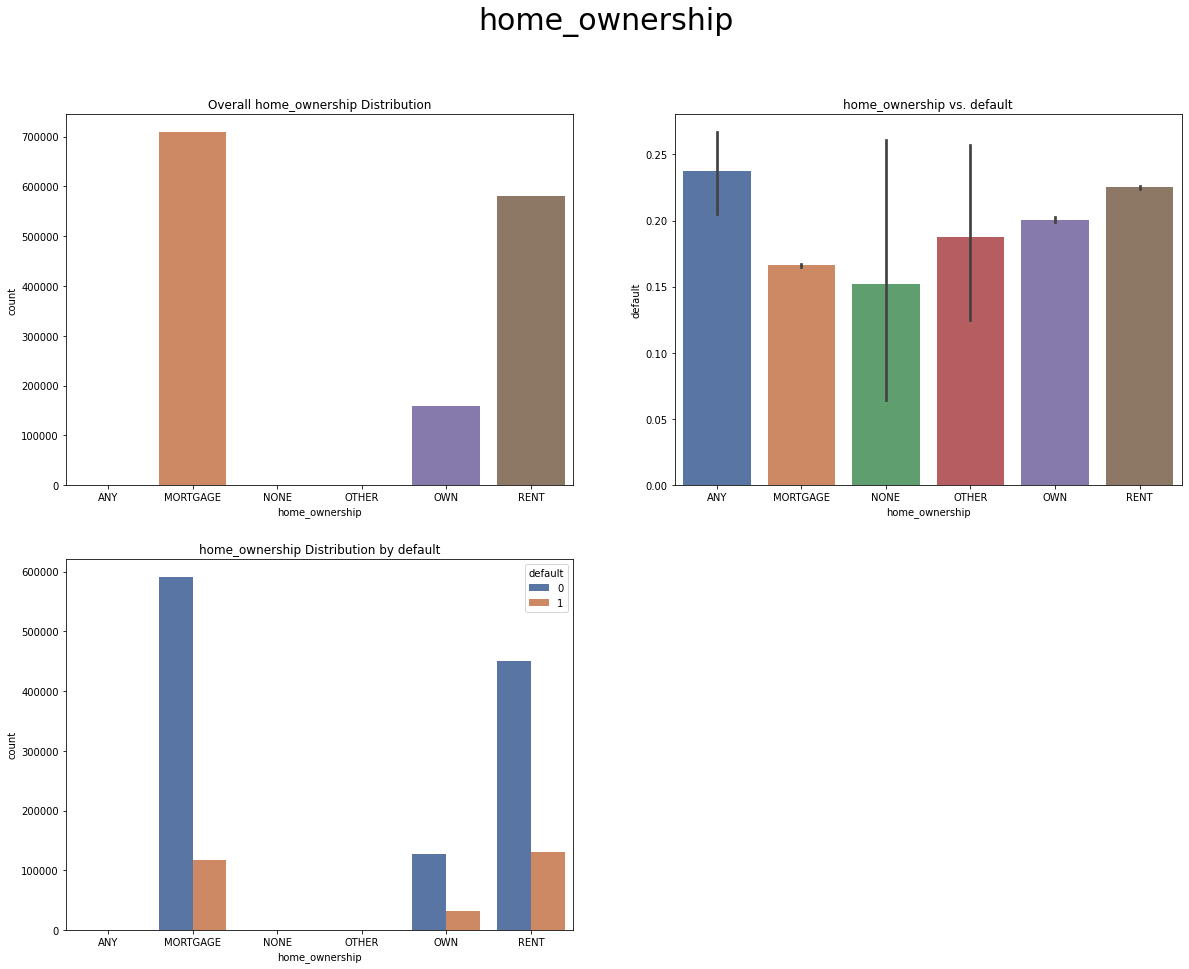

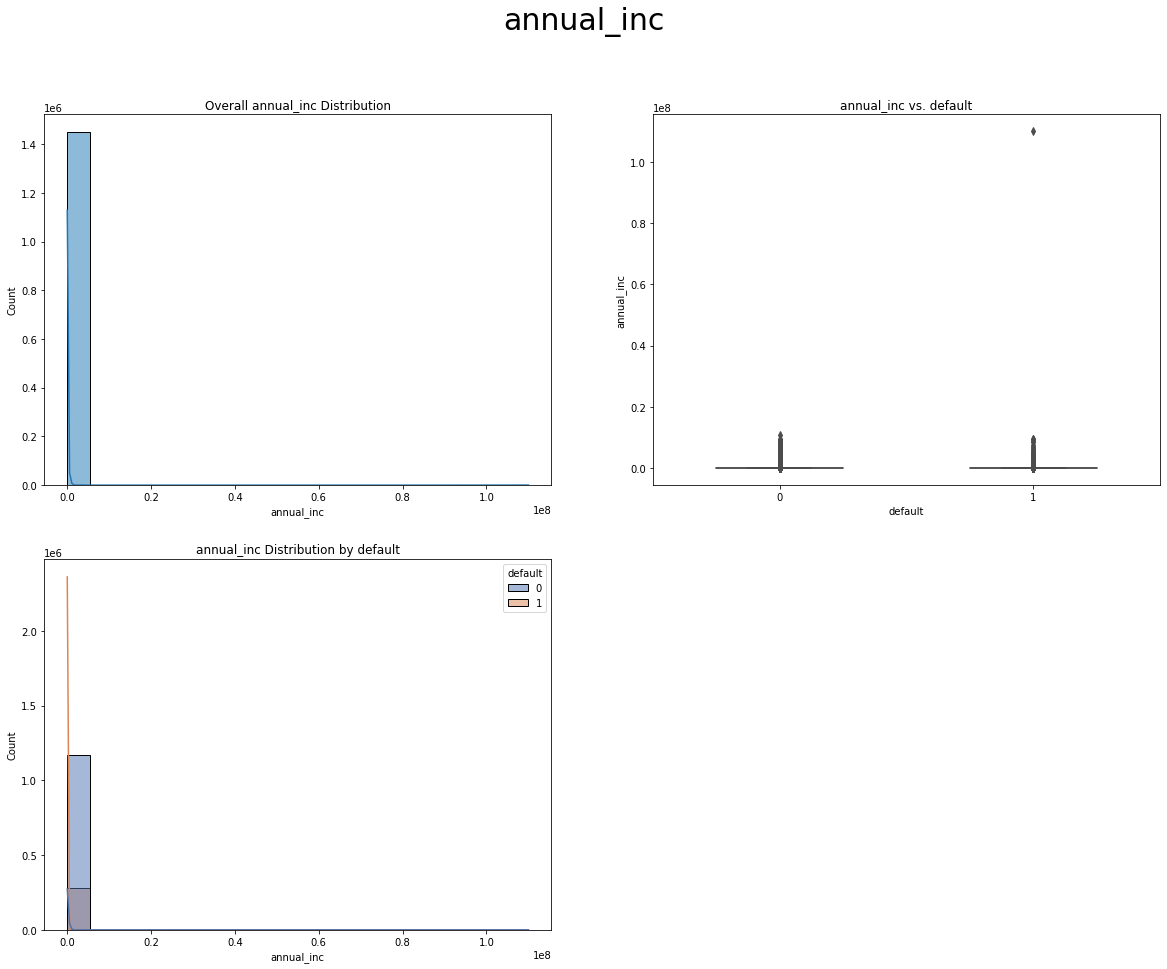

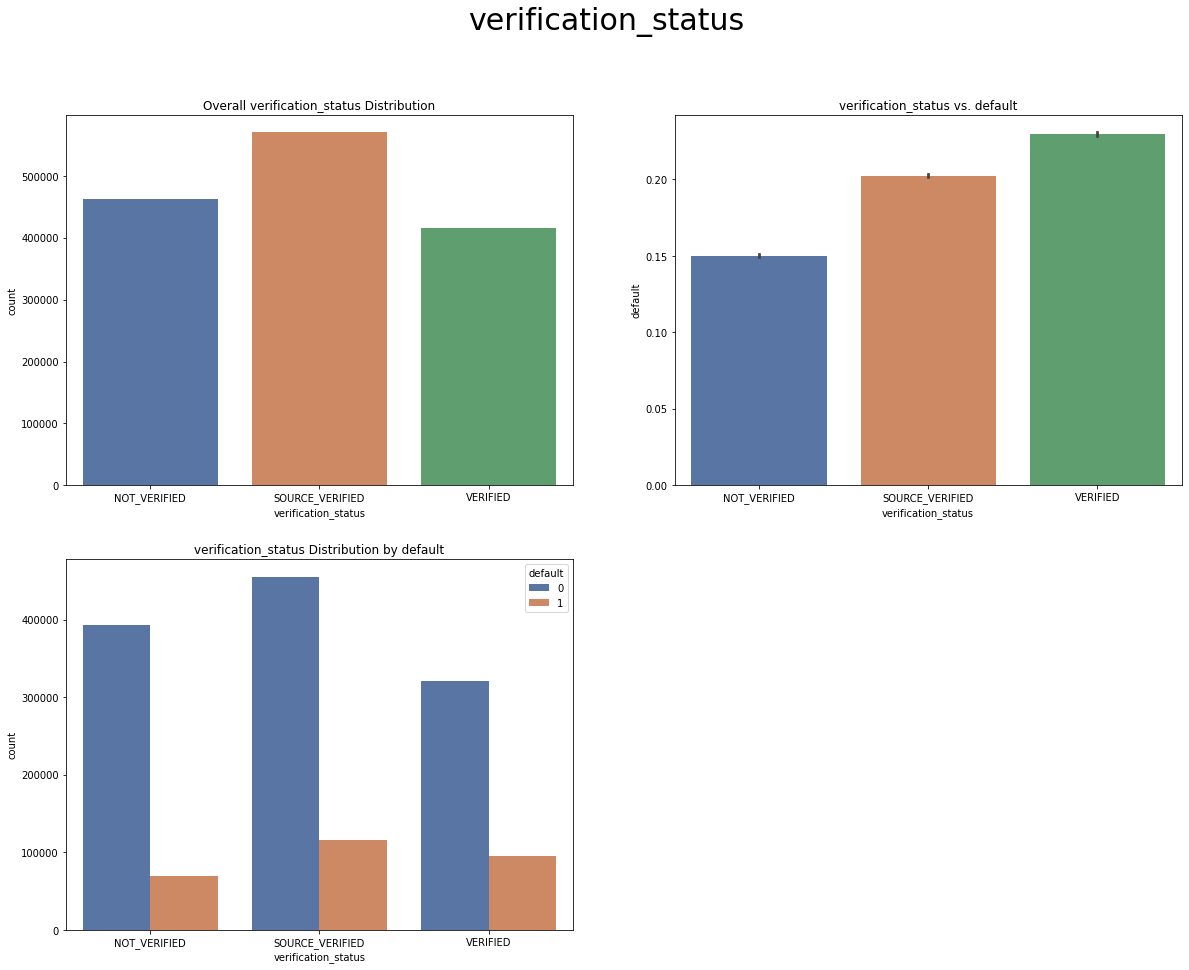

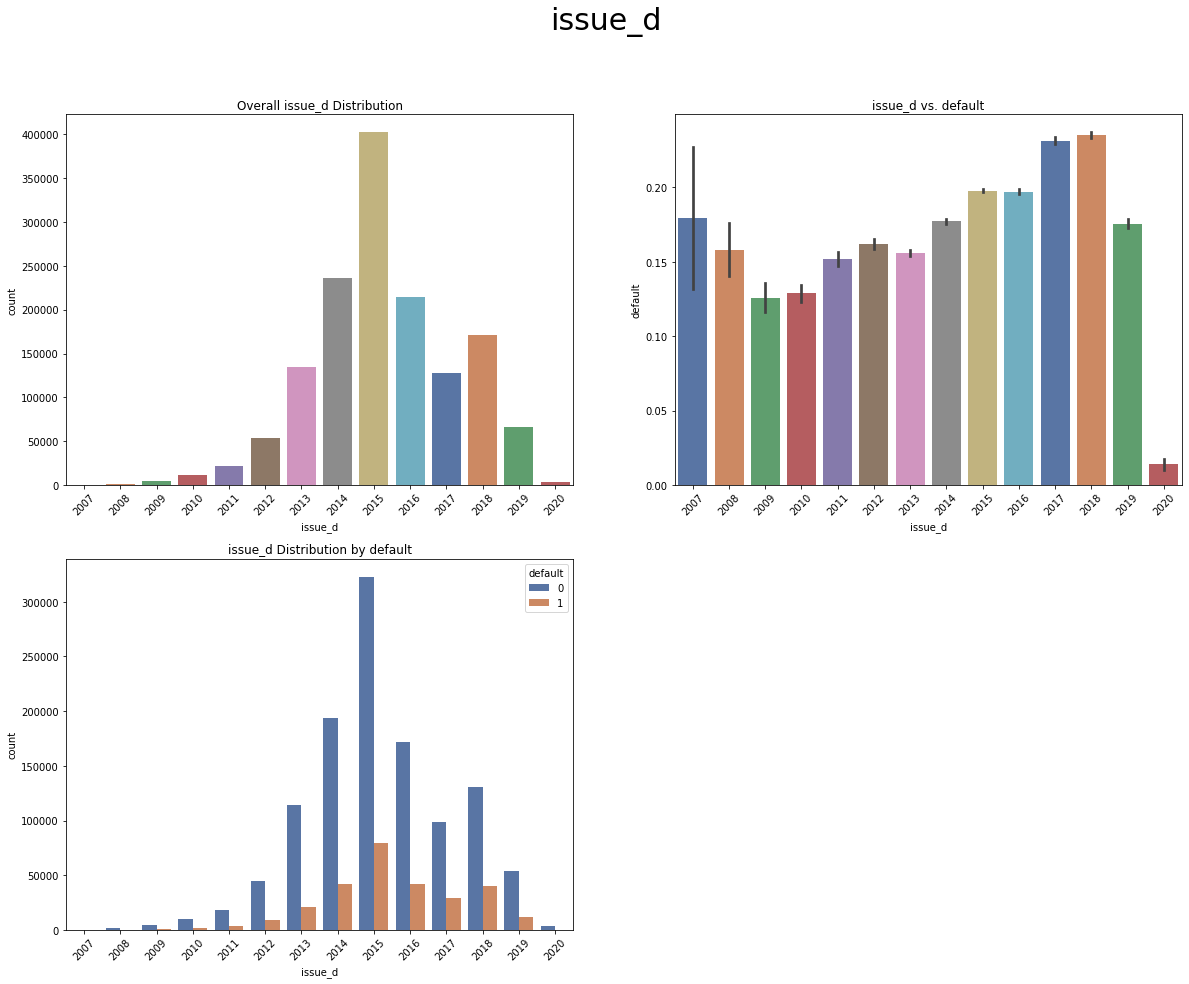

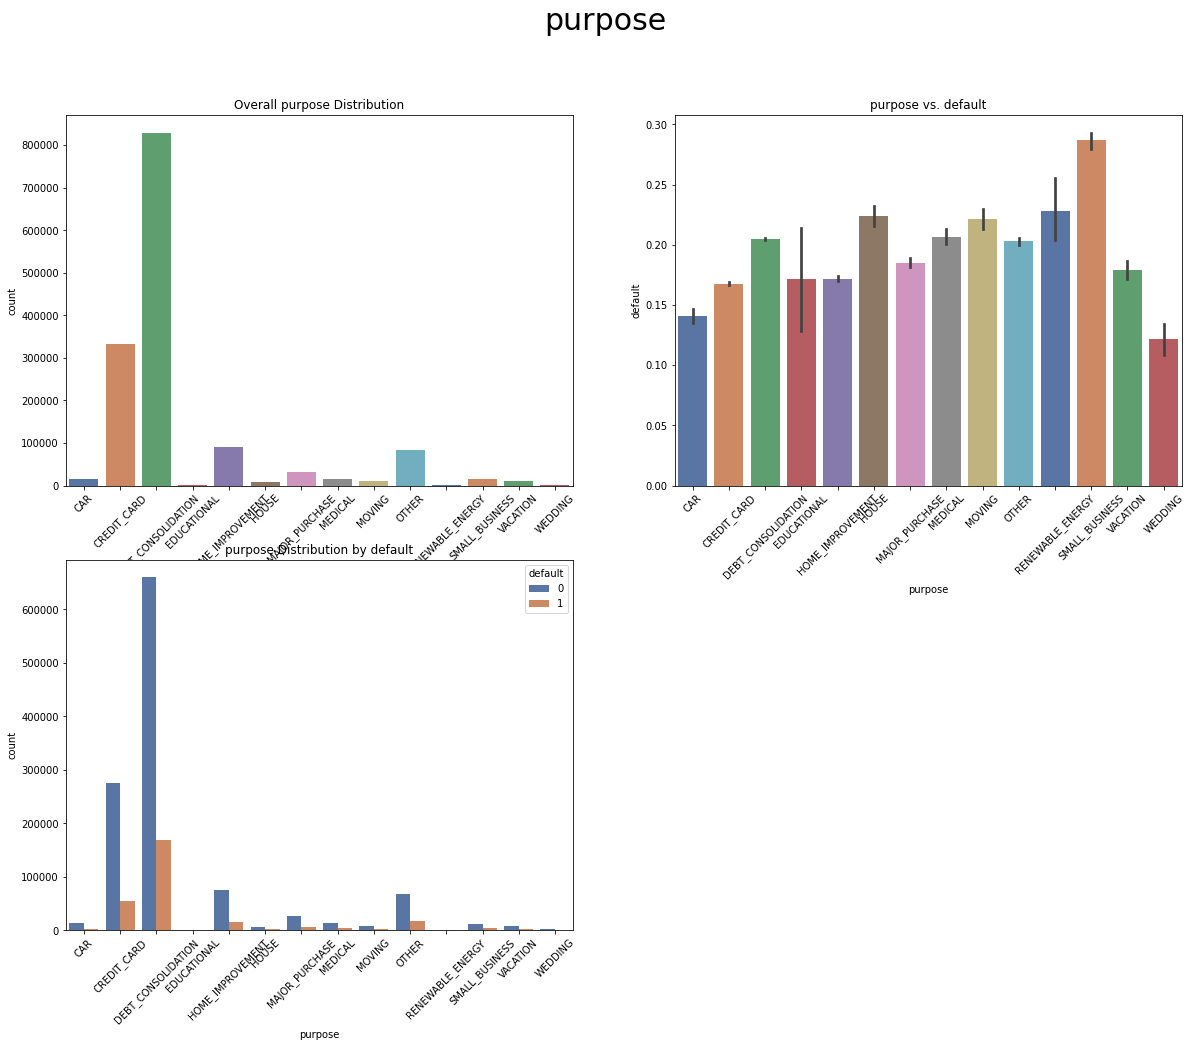

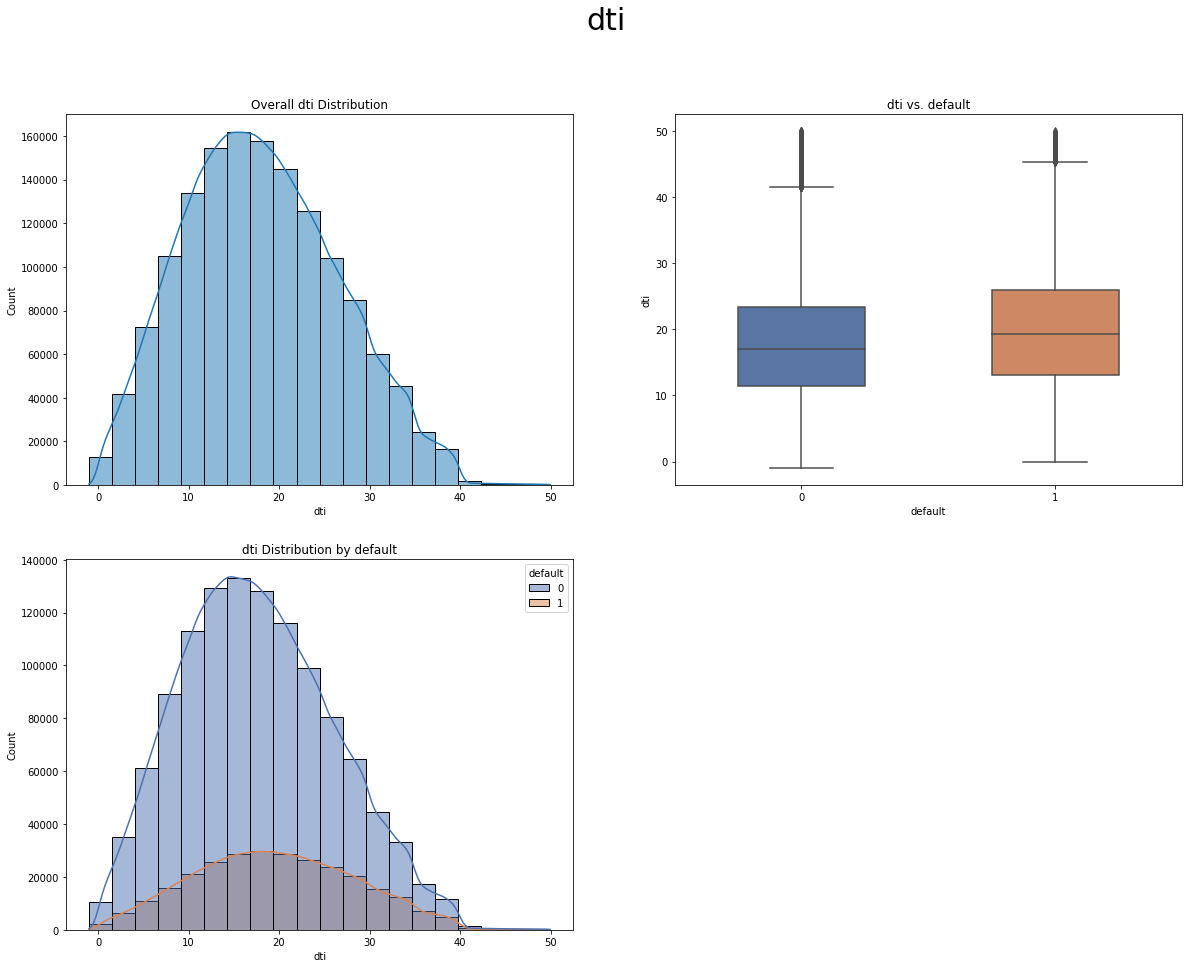

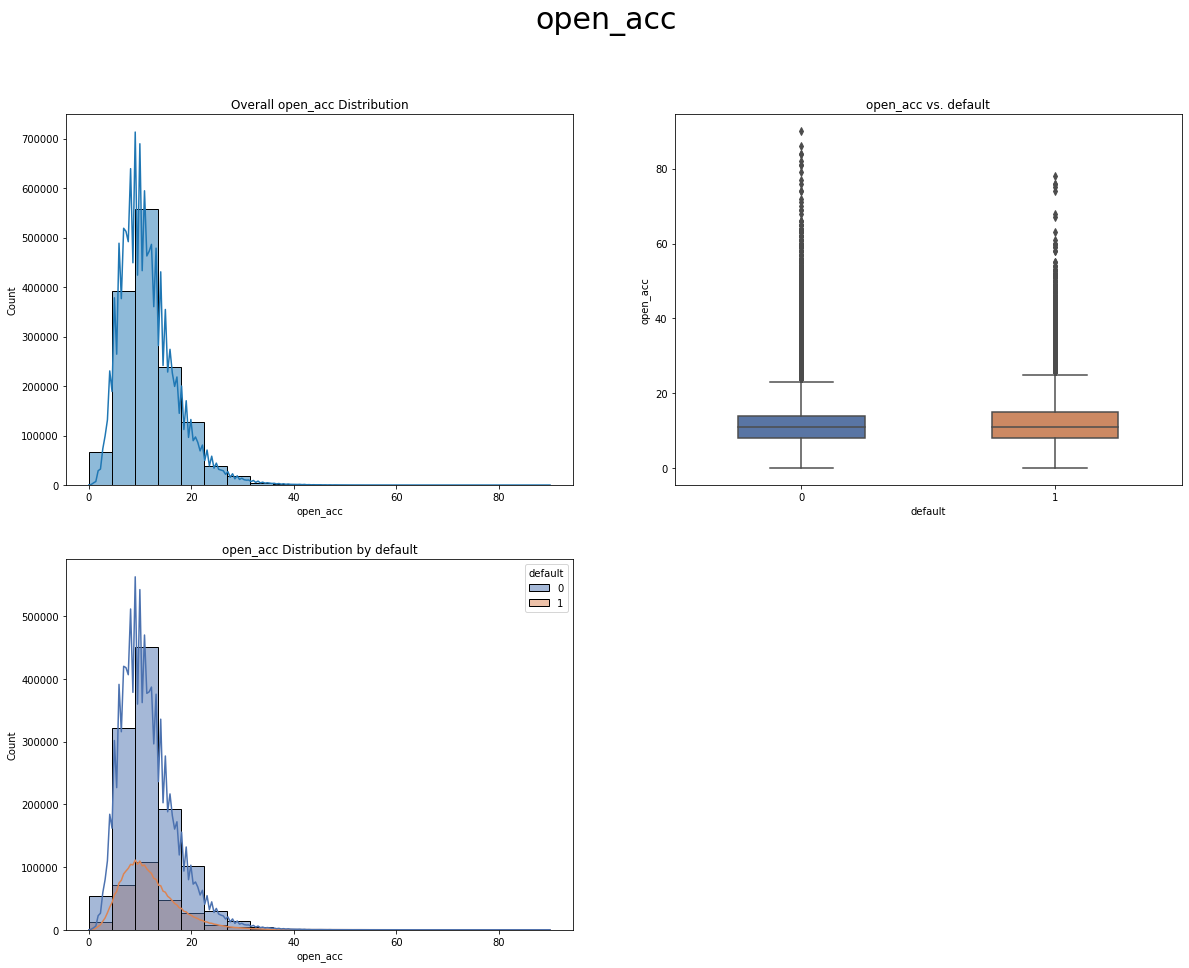

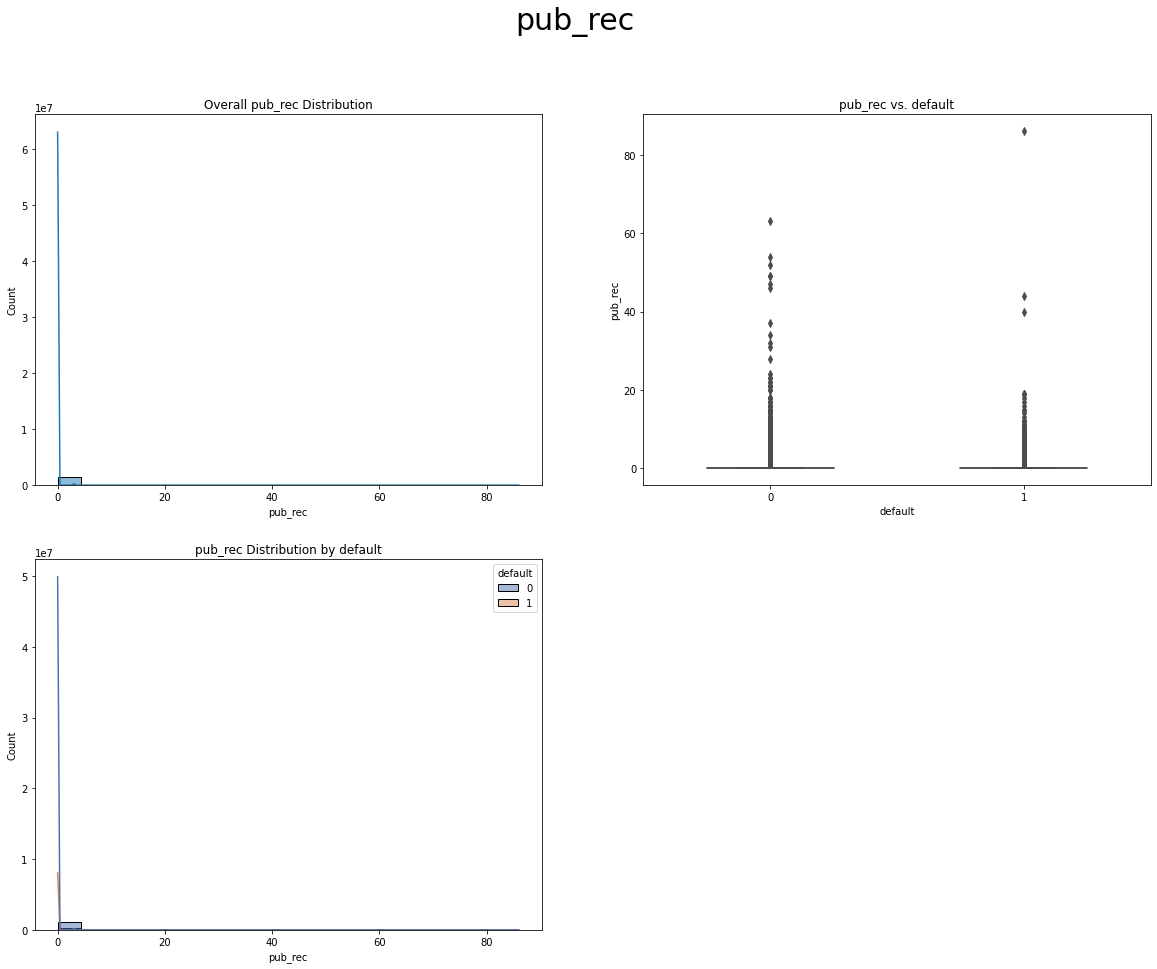

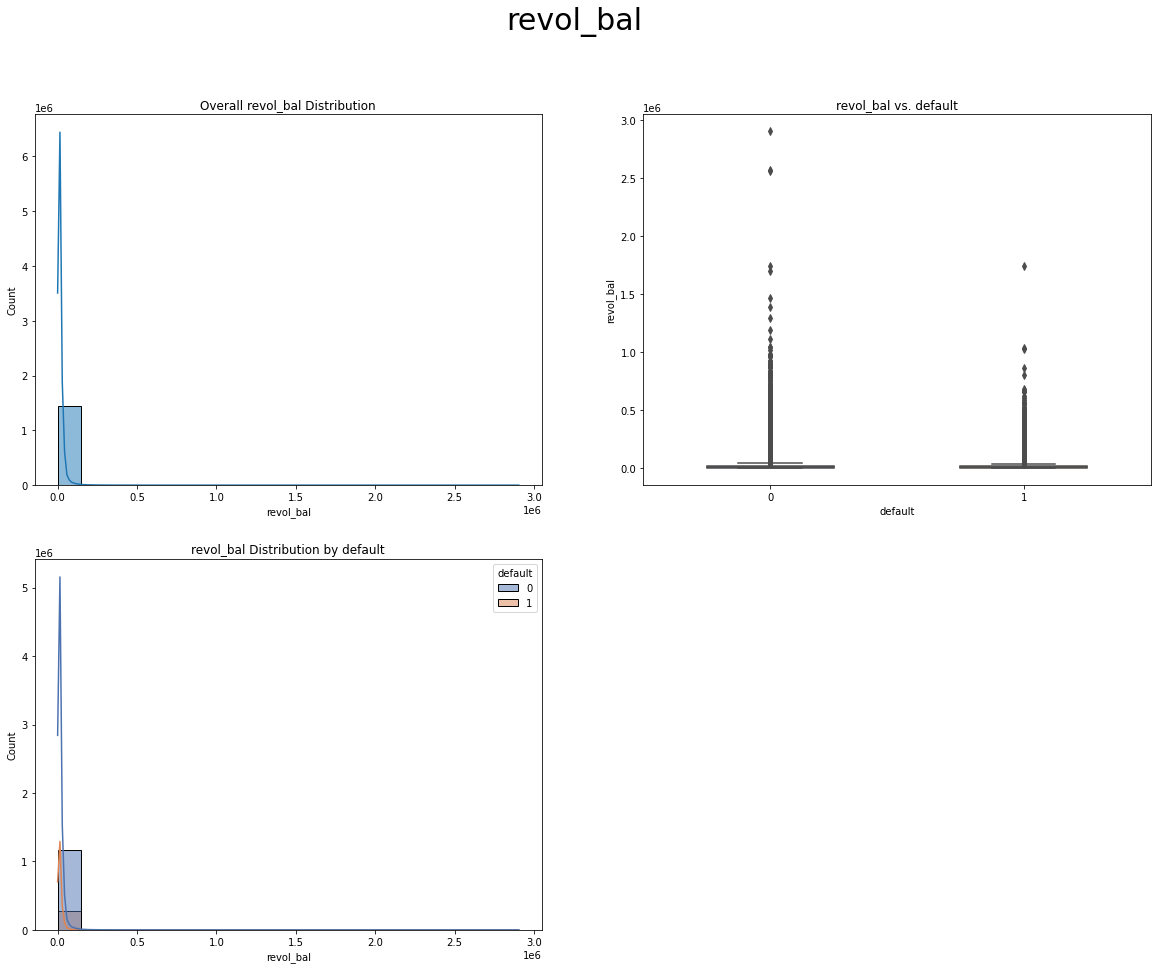

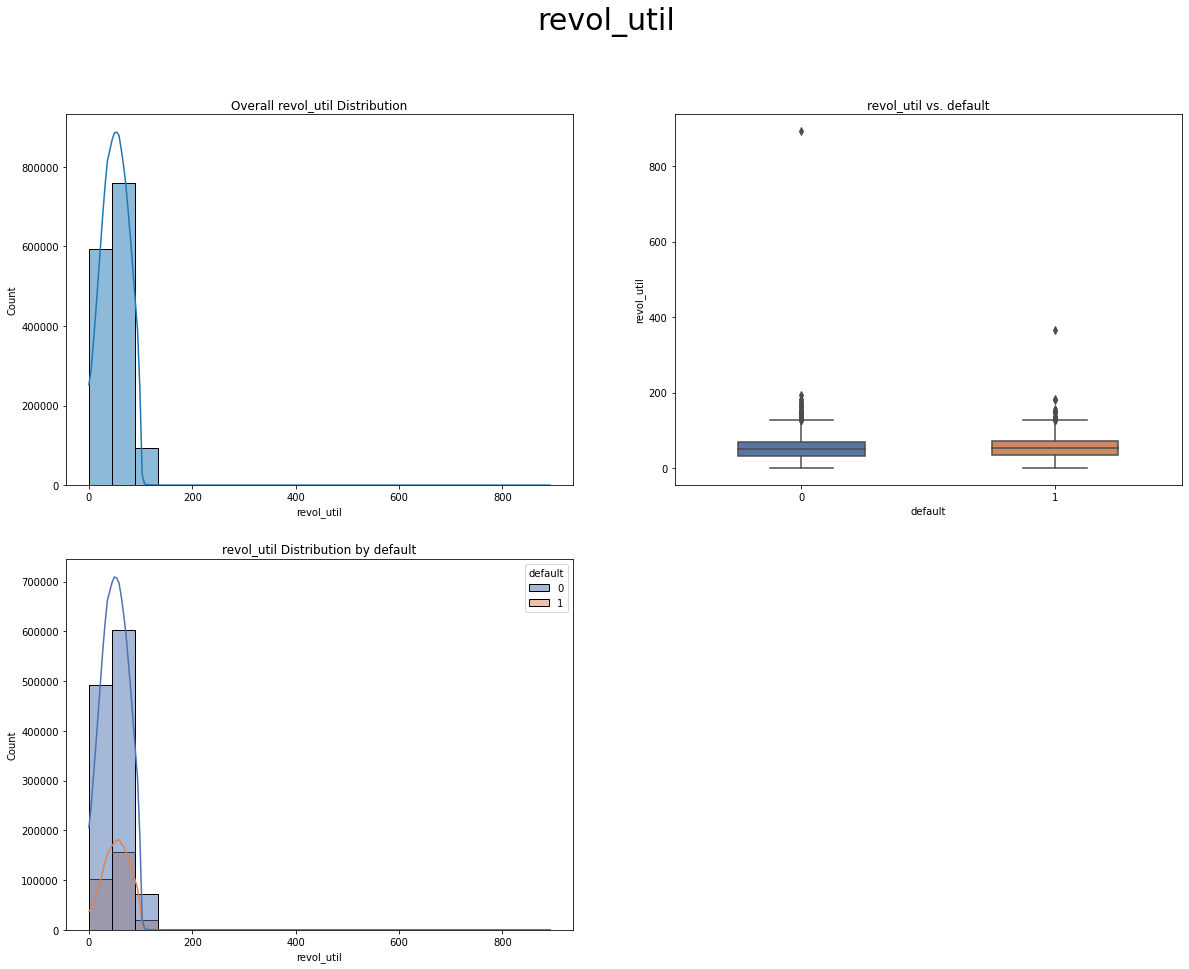

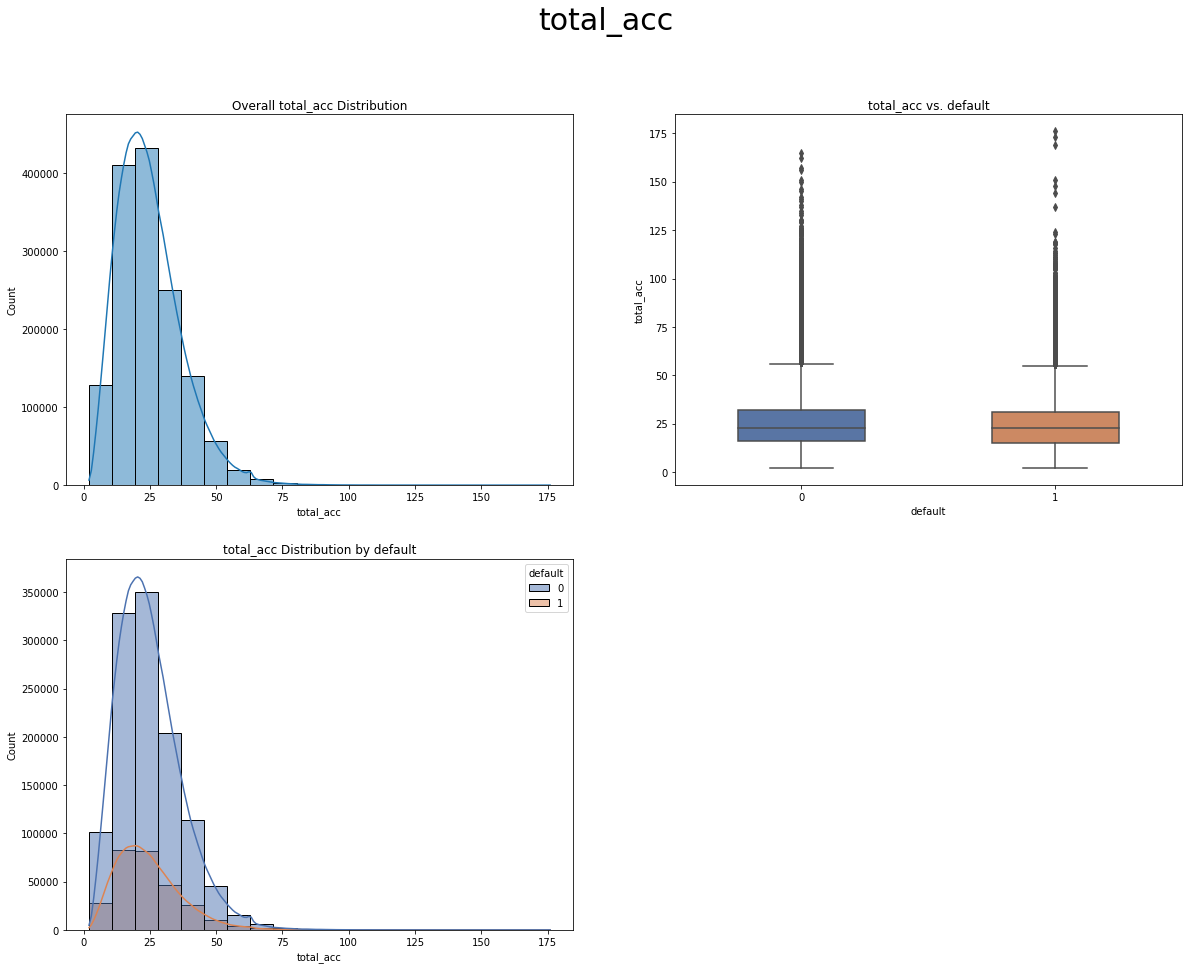

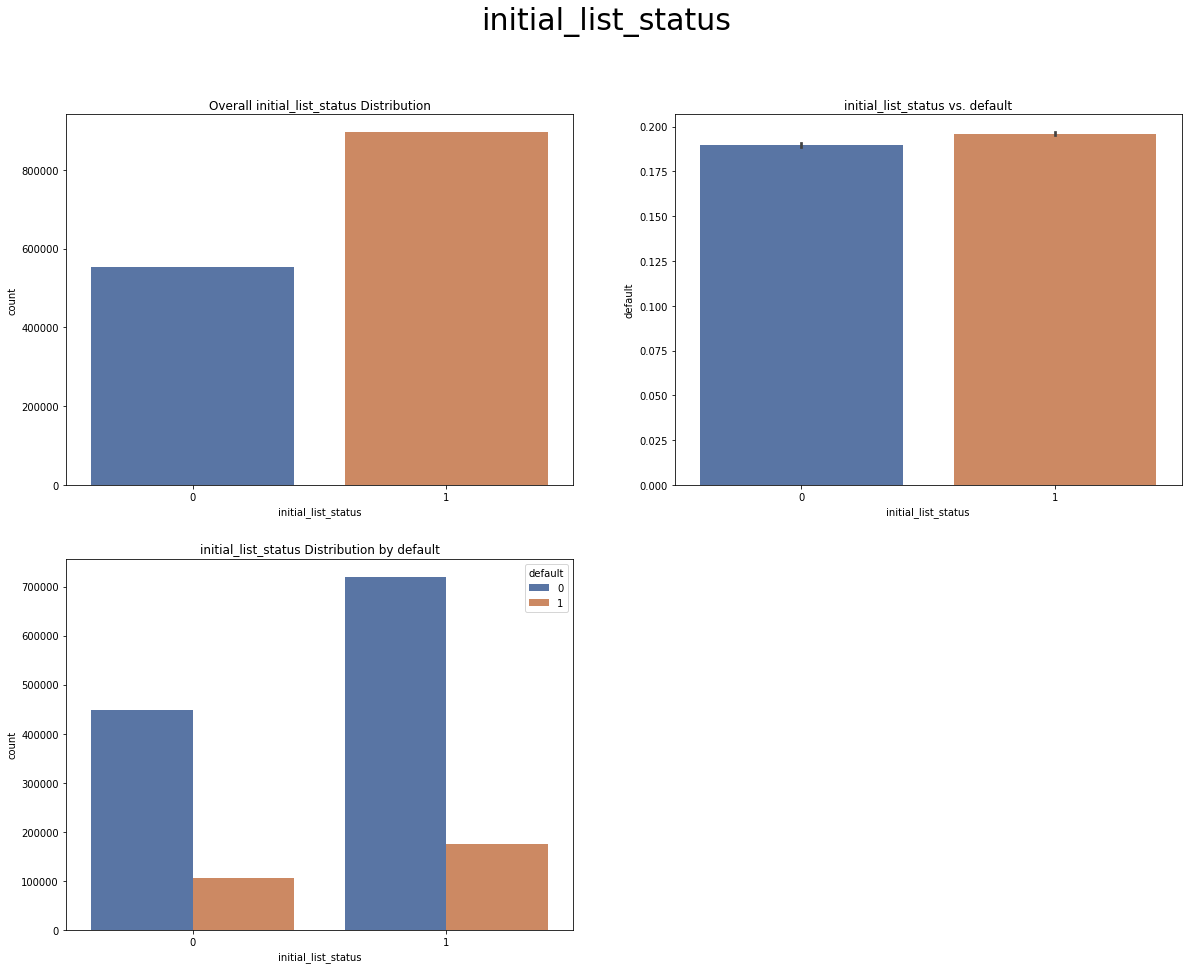

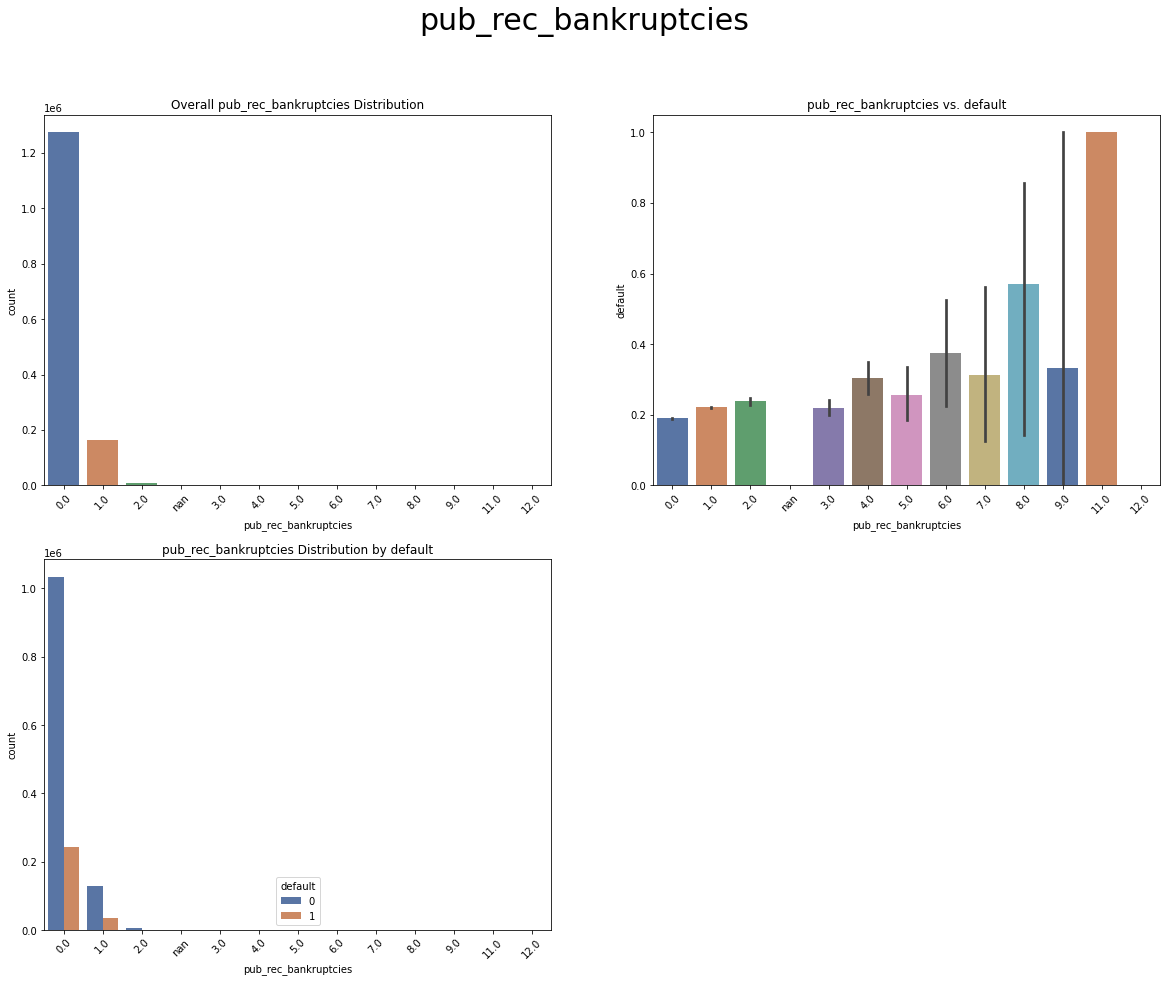

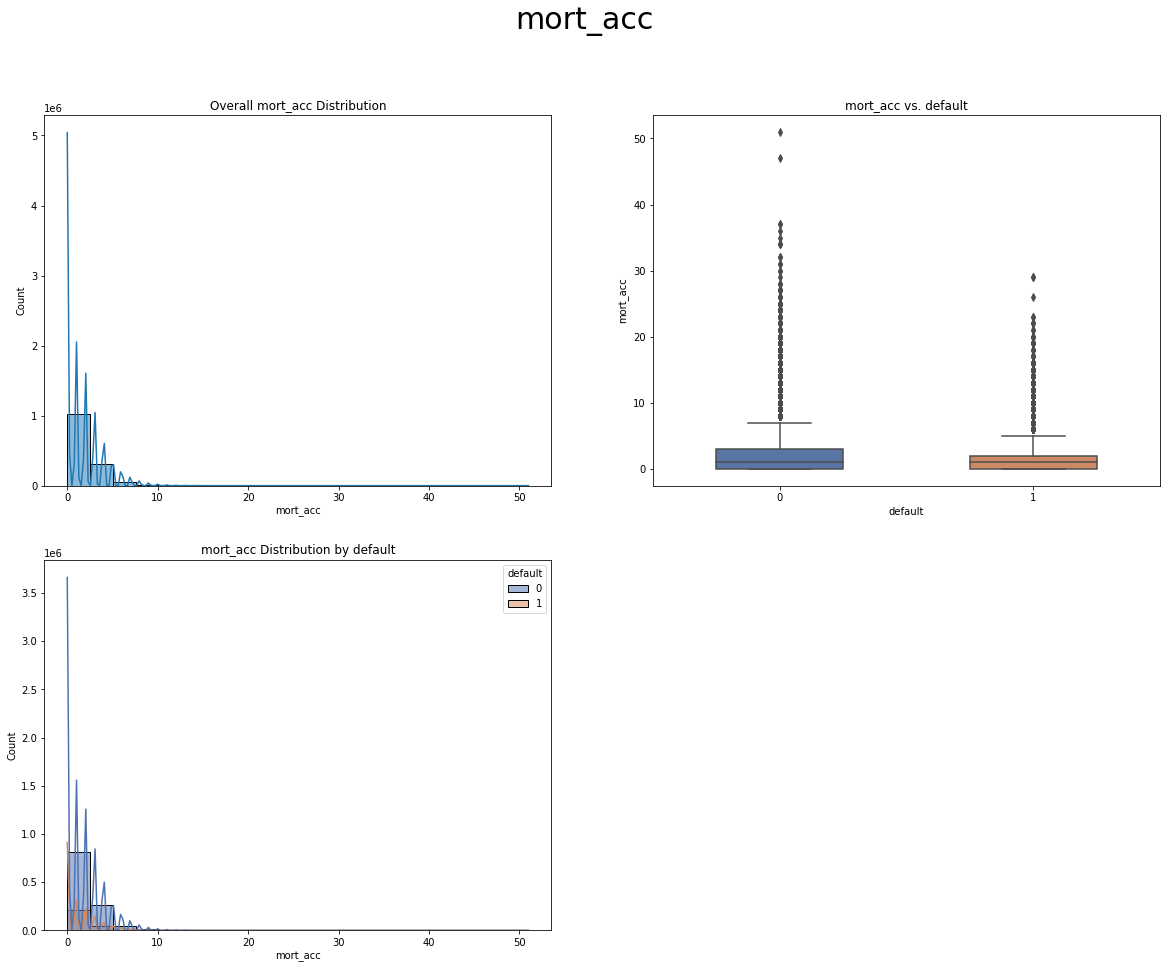

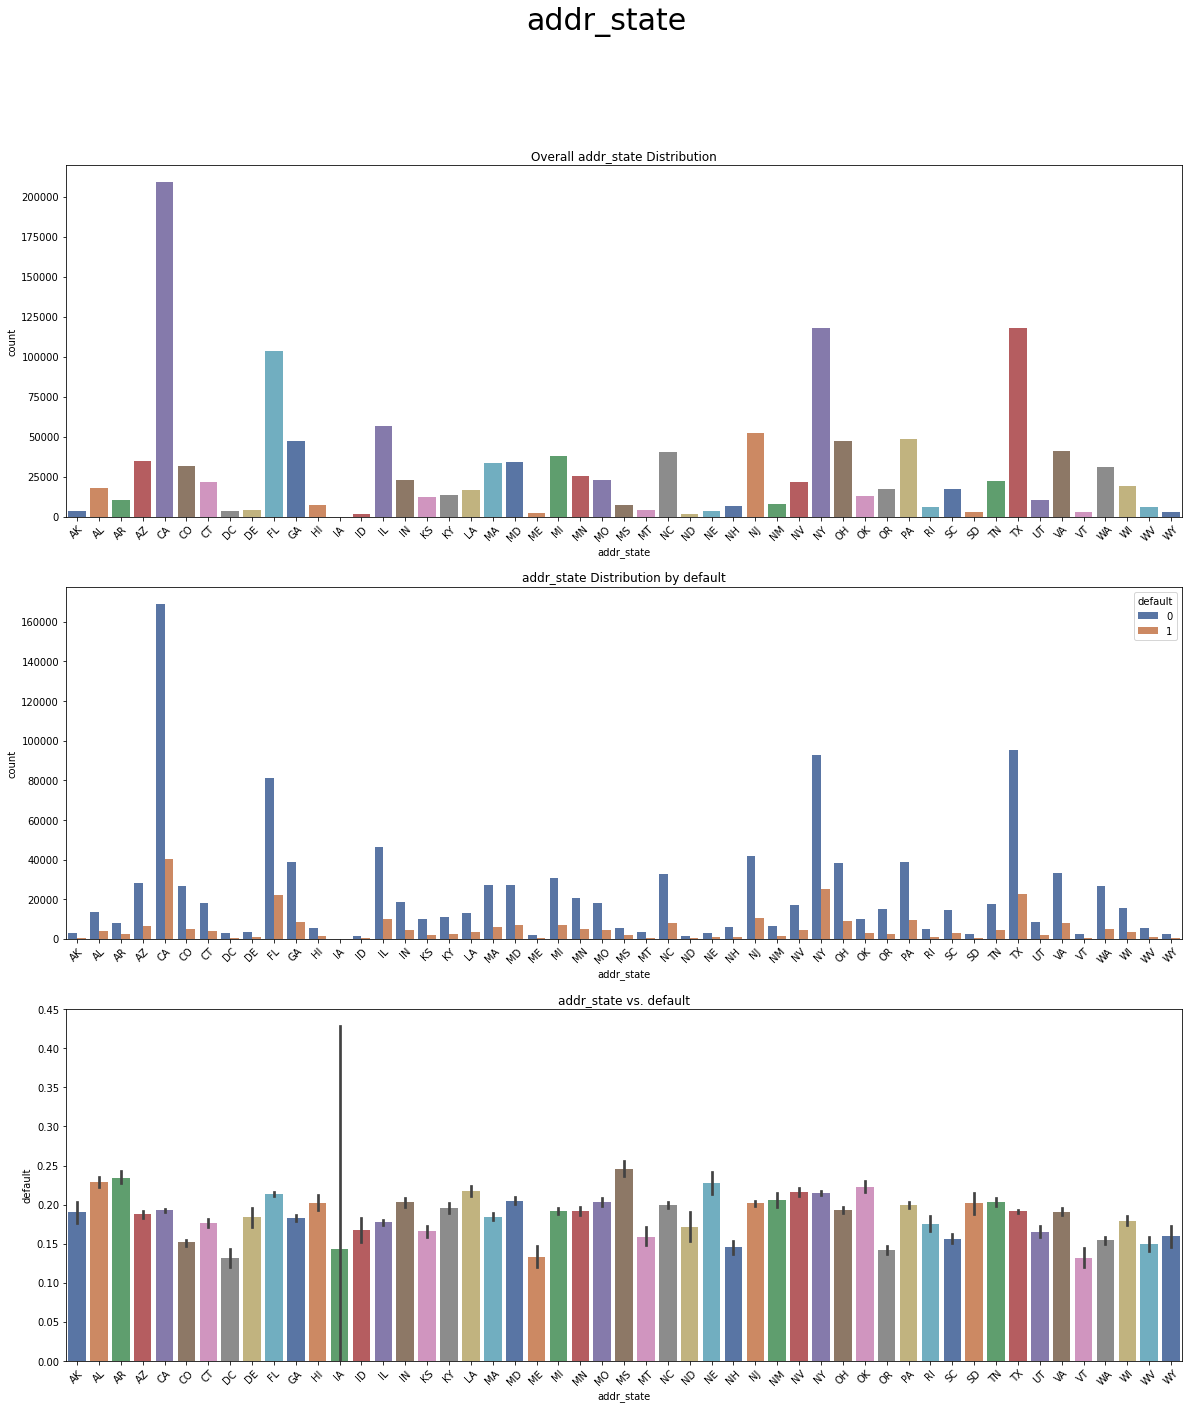

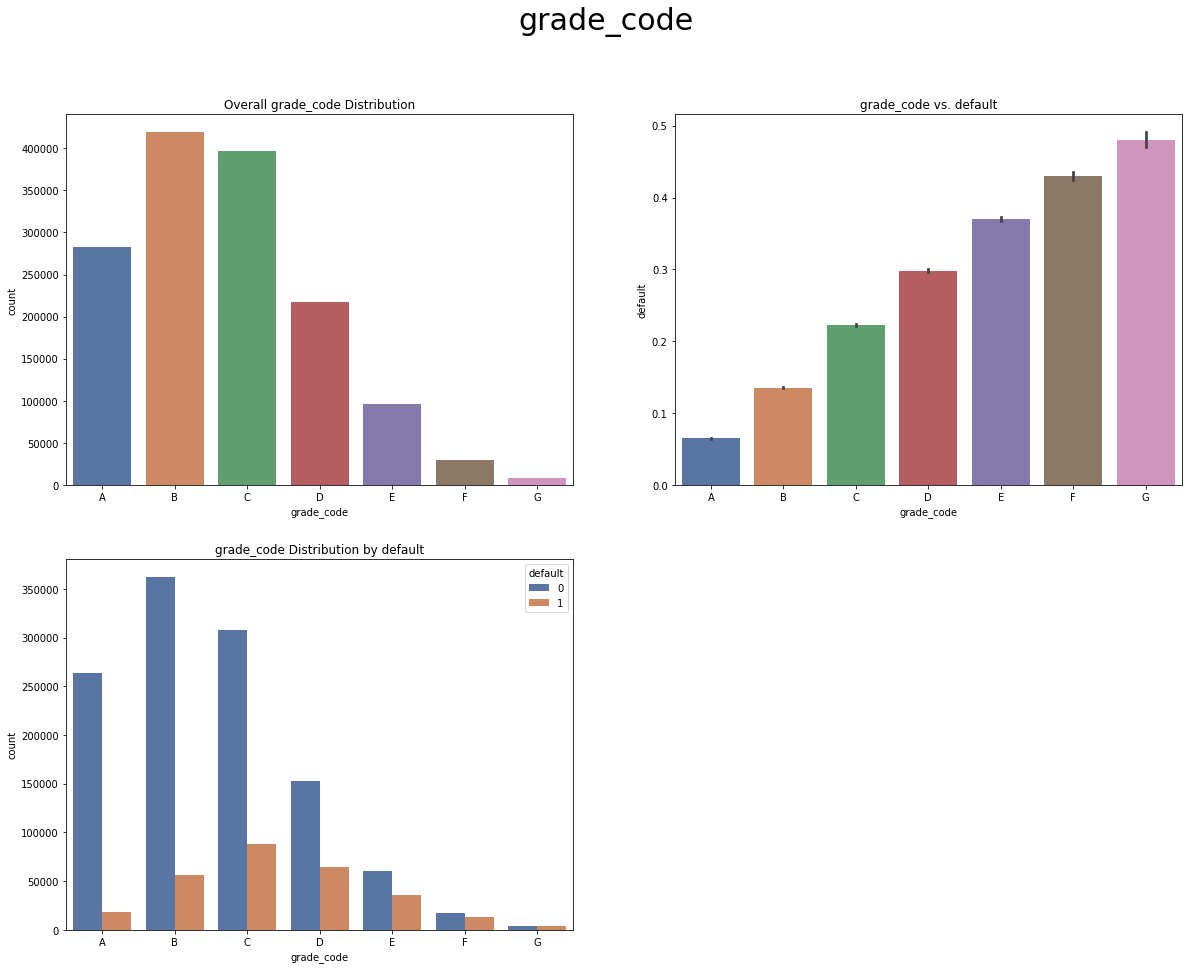

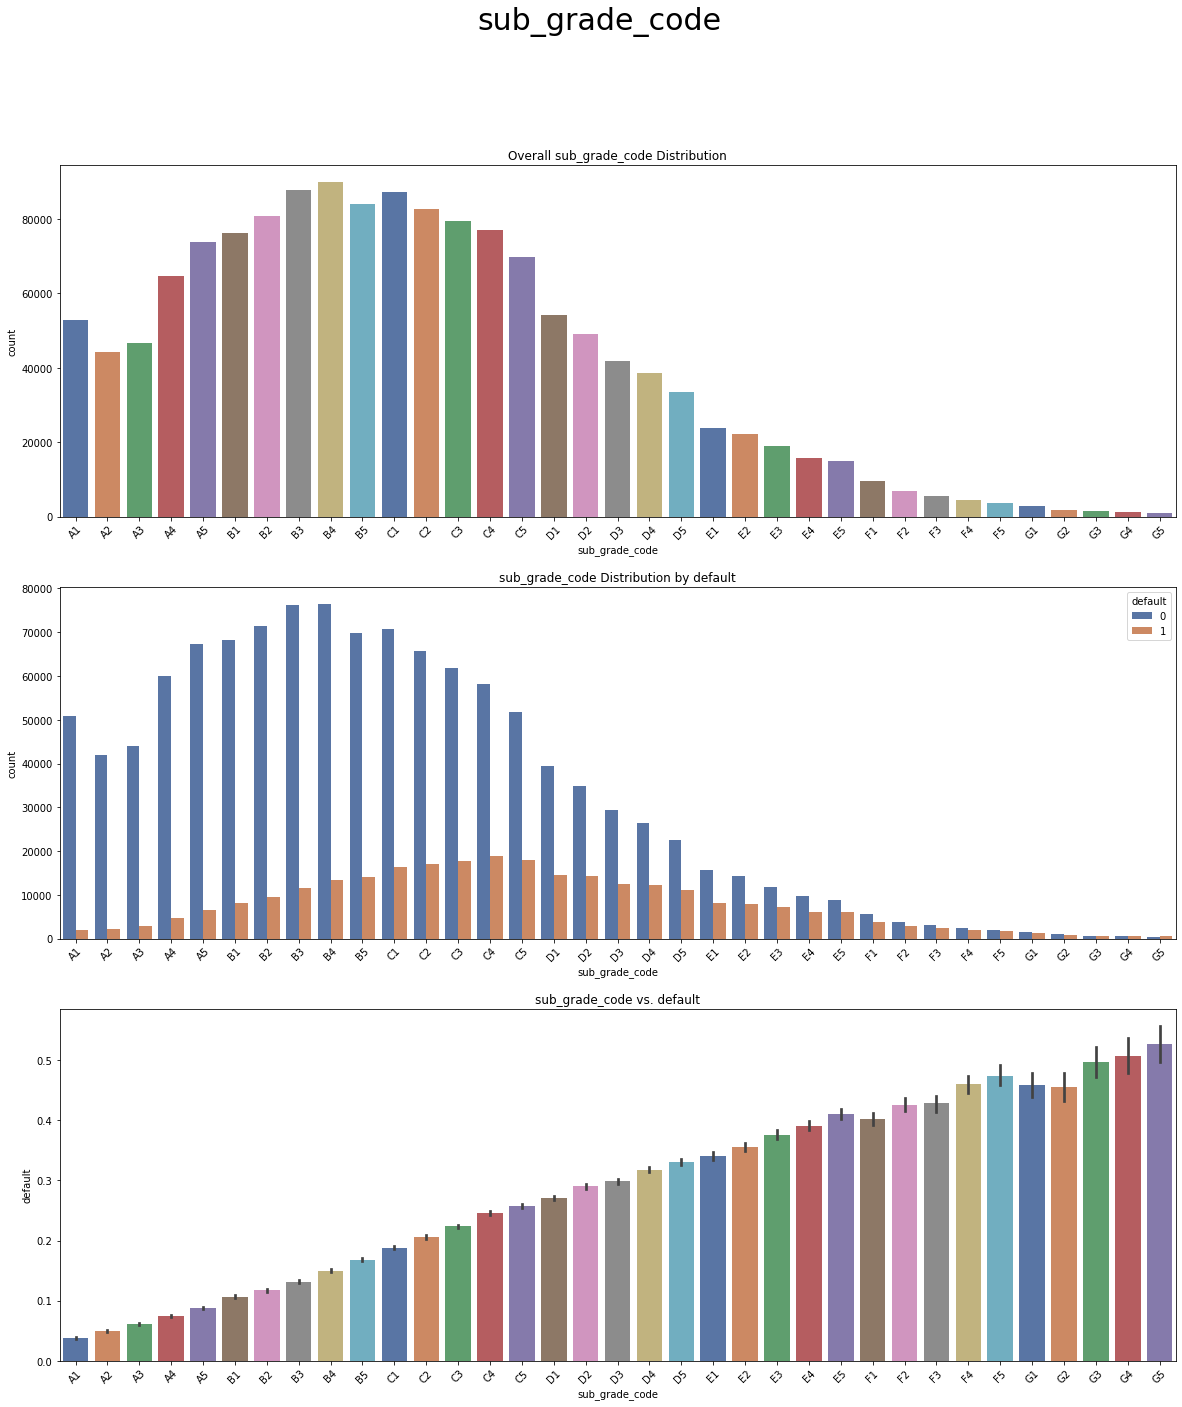

<Figure size 432x288 with 0 Axes>

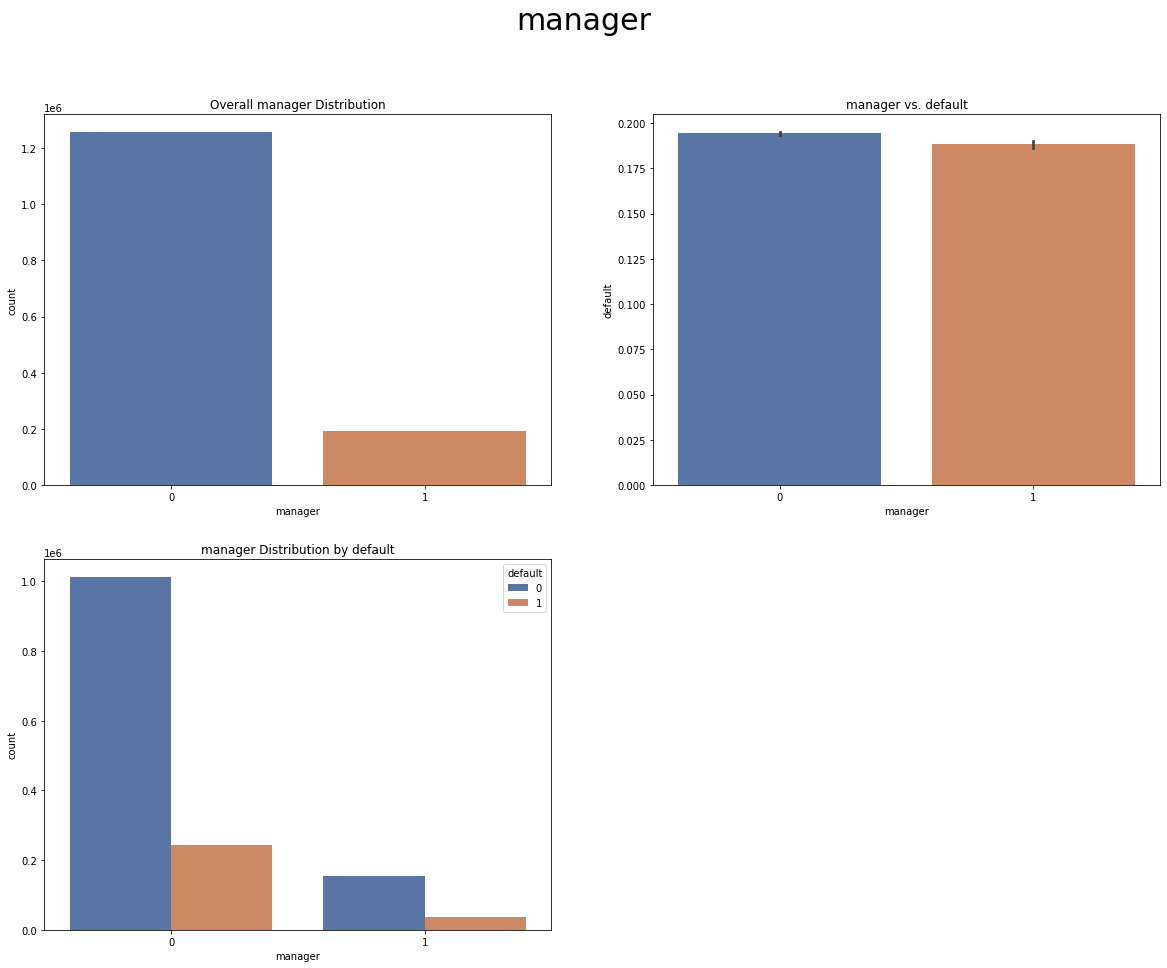

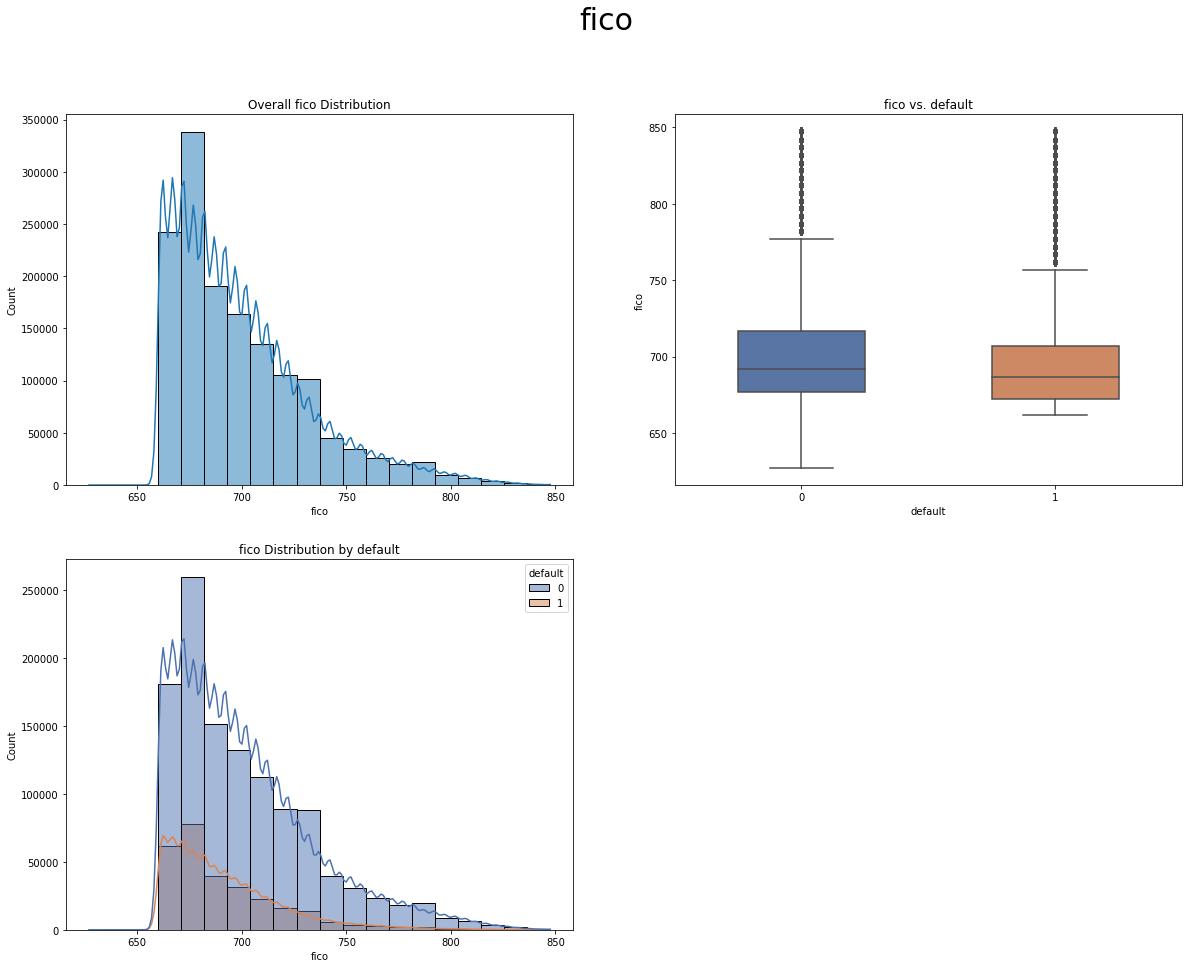

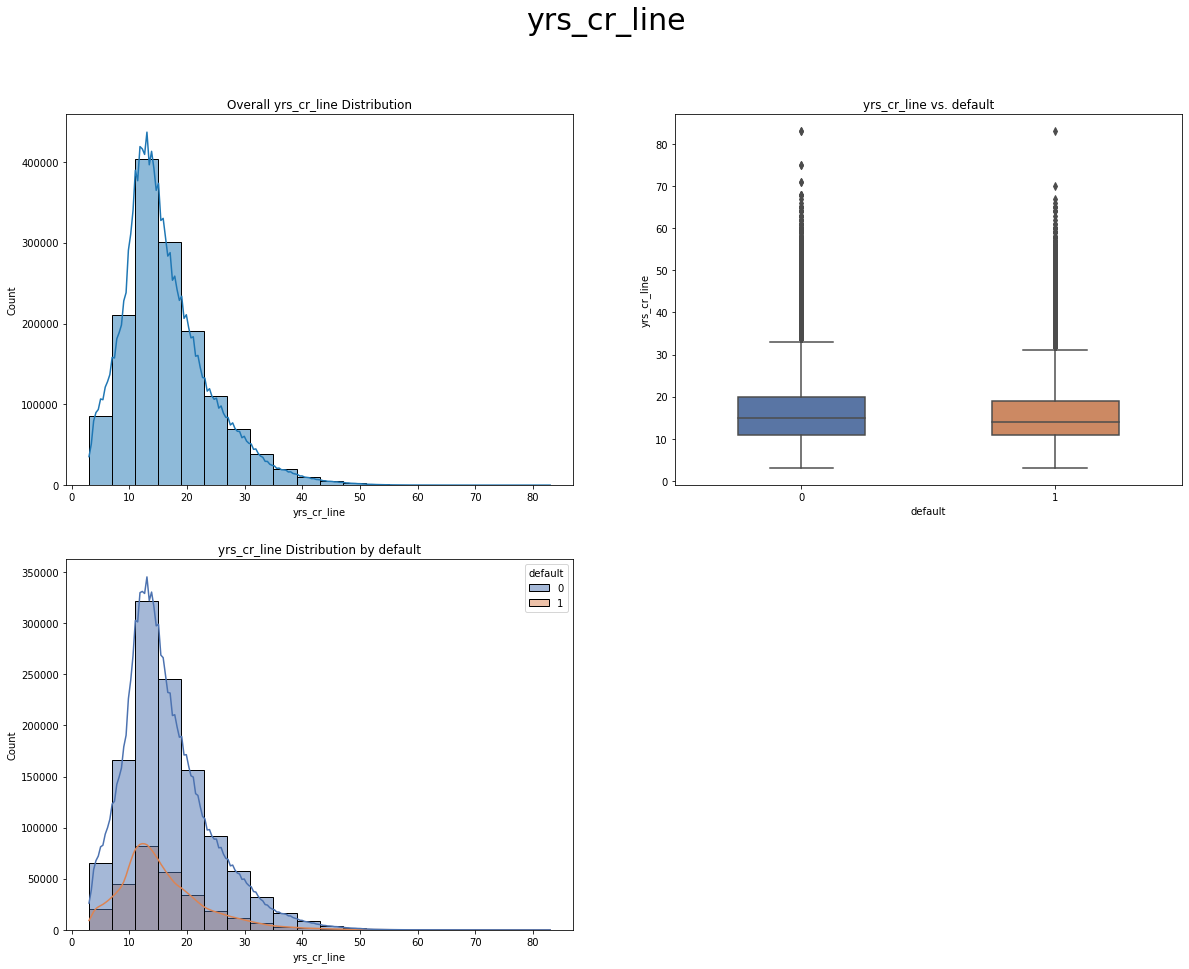

In [11]:
for feat in data.columns.values[1:]:
    run_eda(data, feat, 'default')

## b) with Outlier Removal

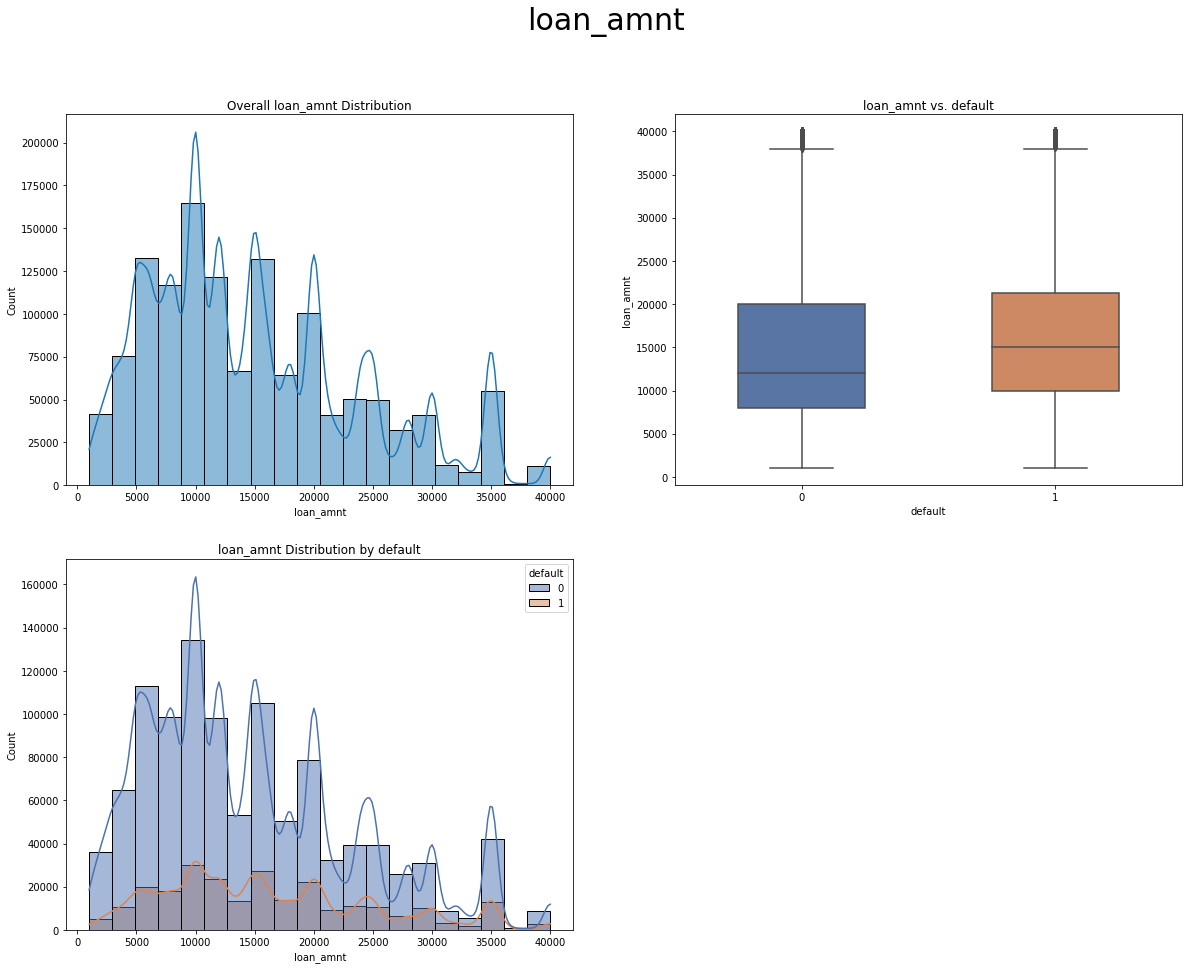

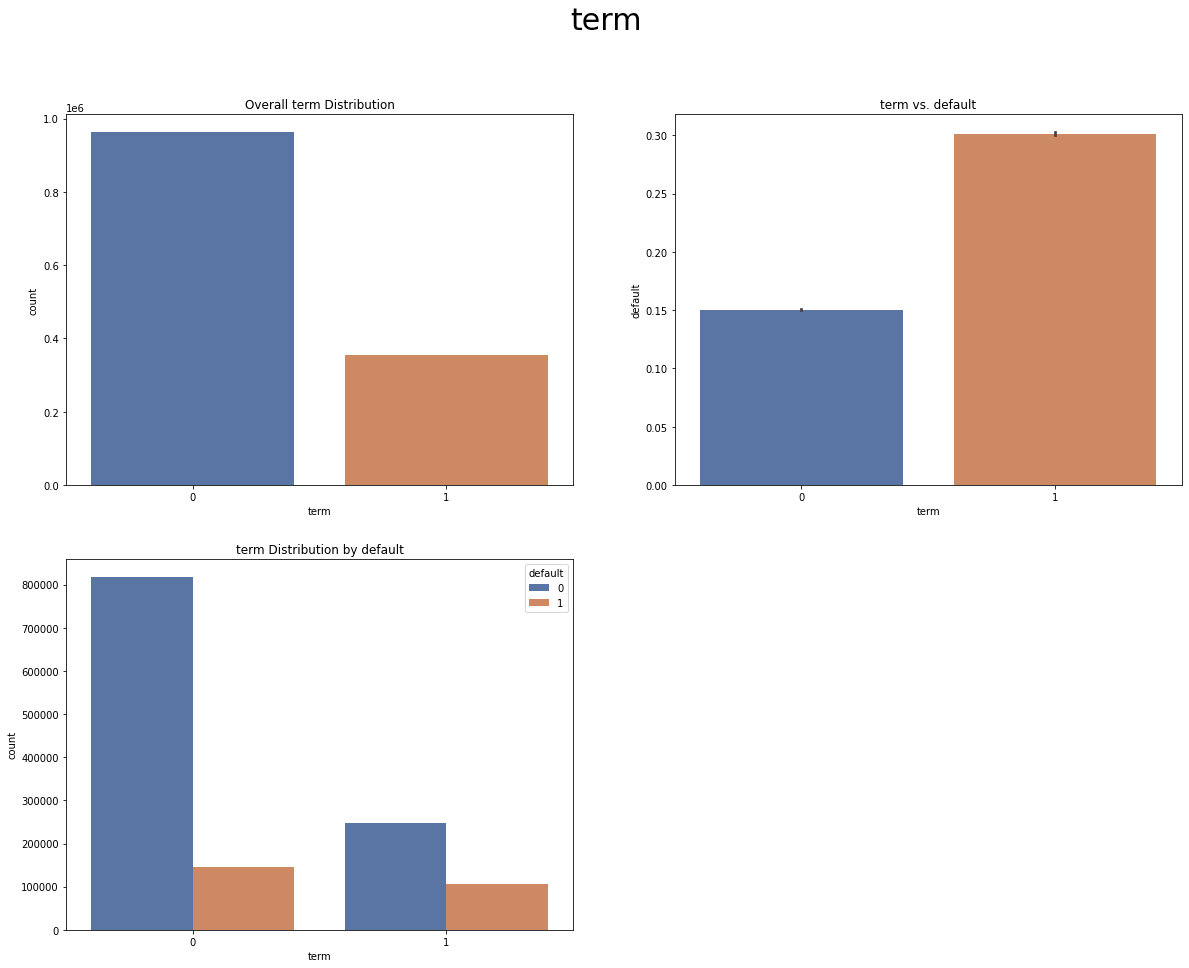

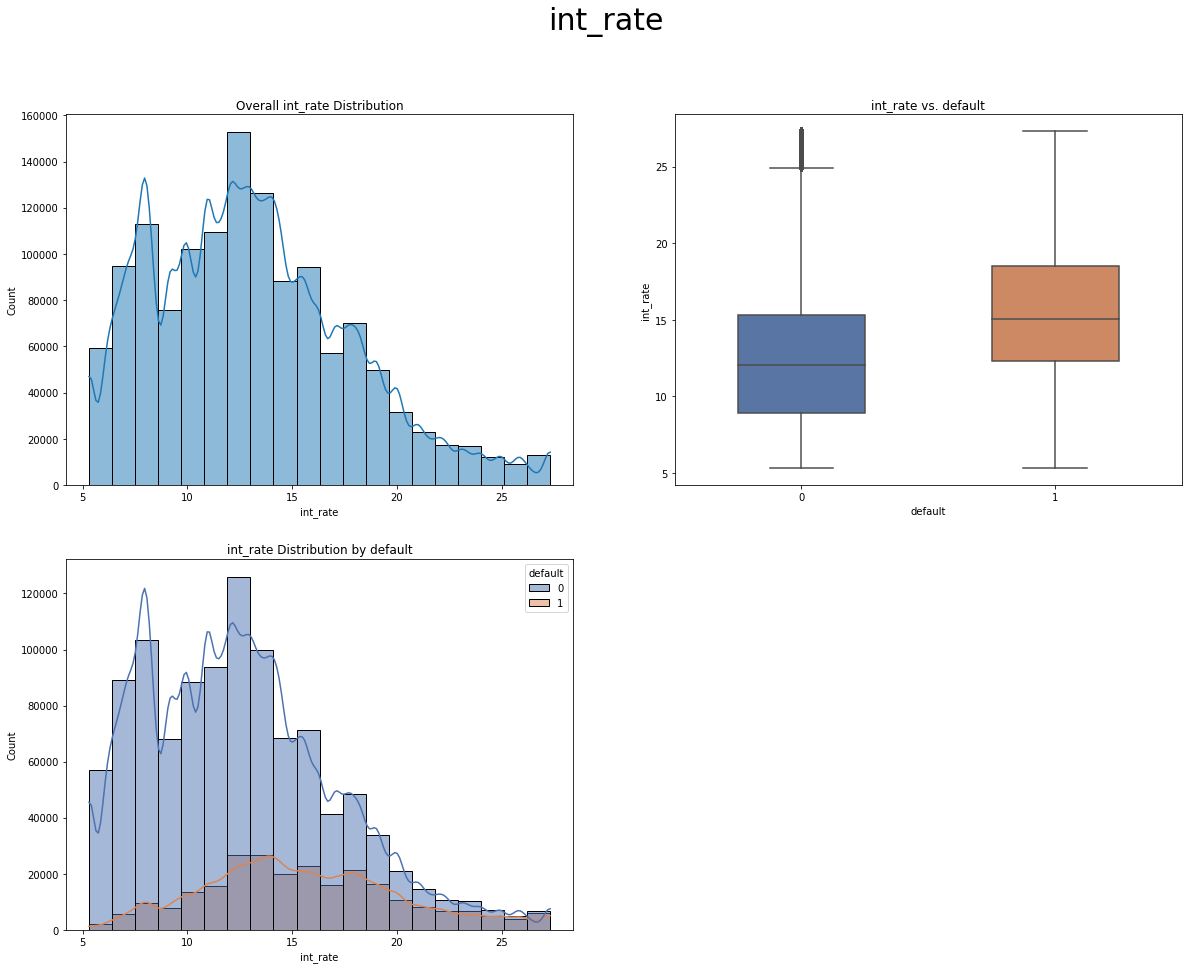

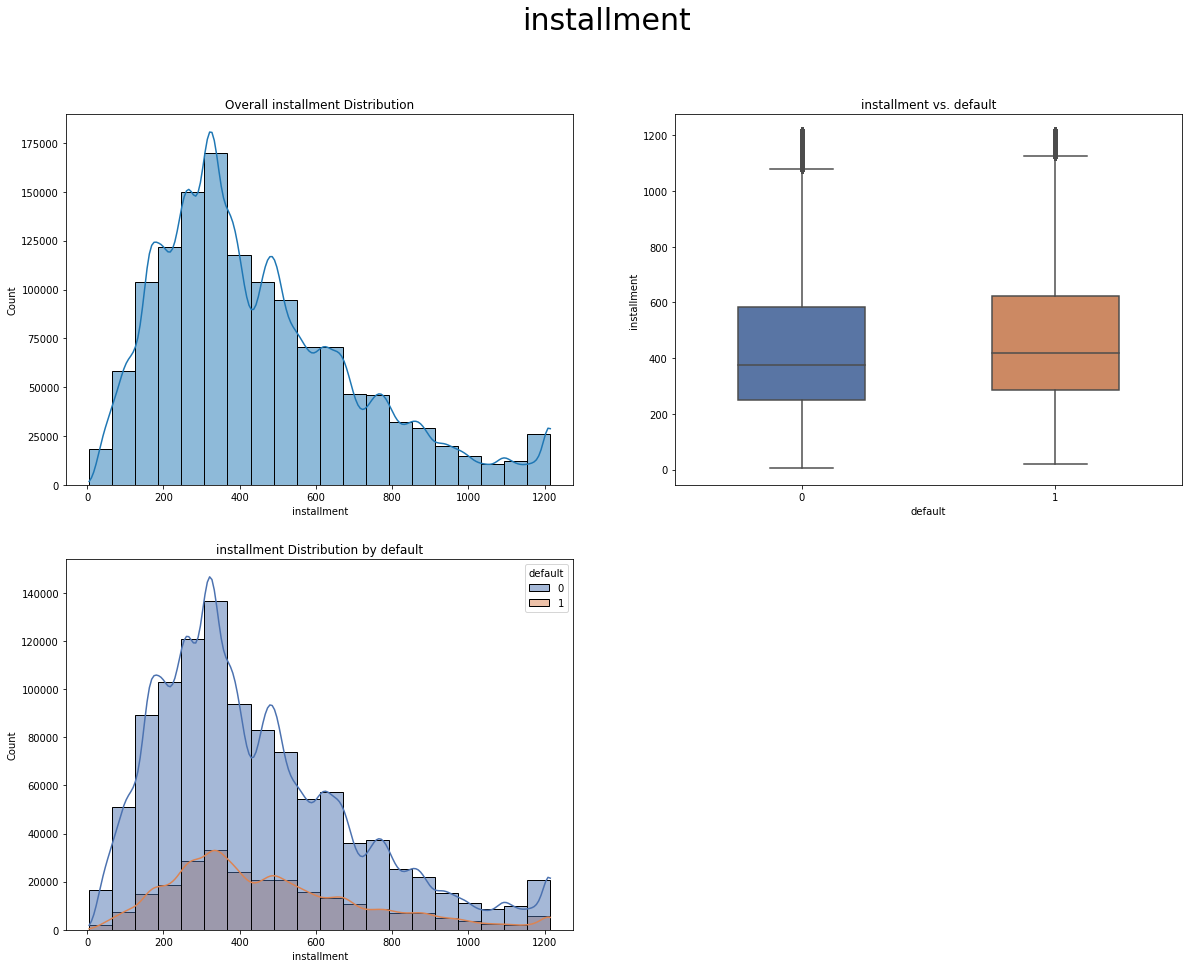

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

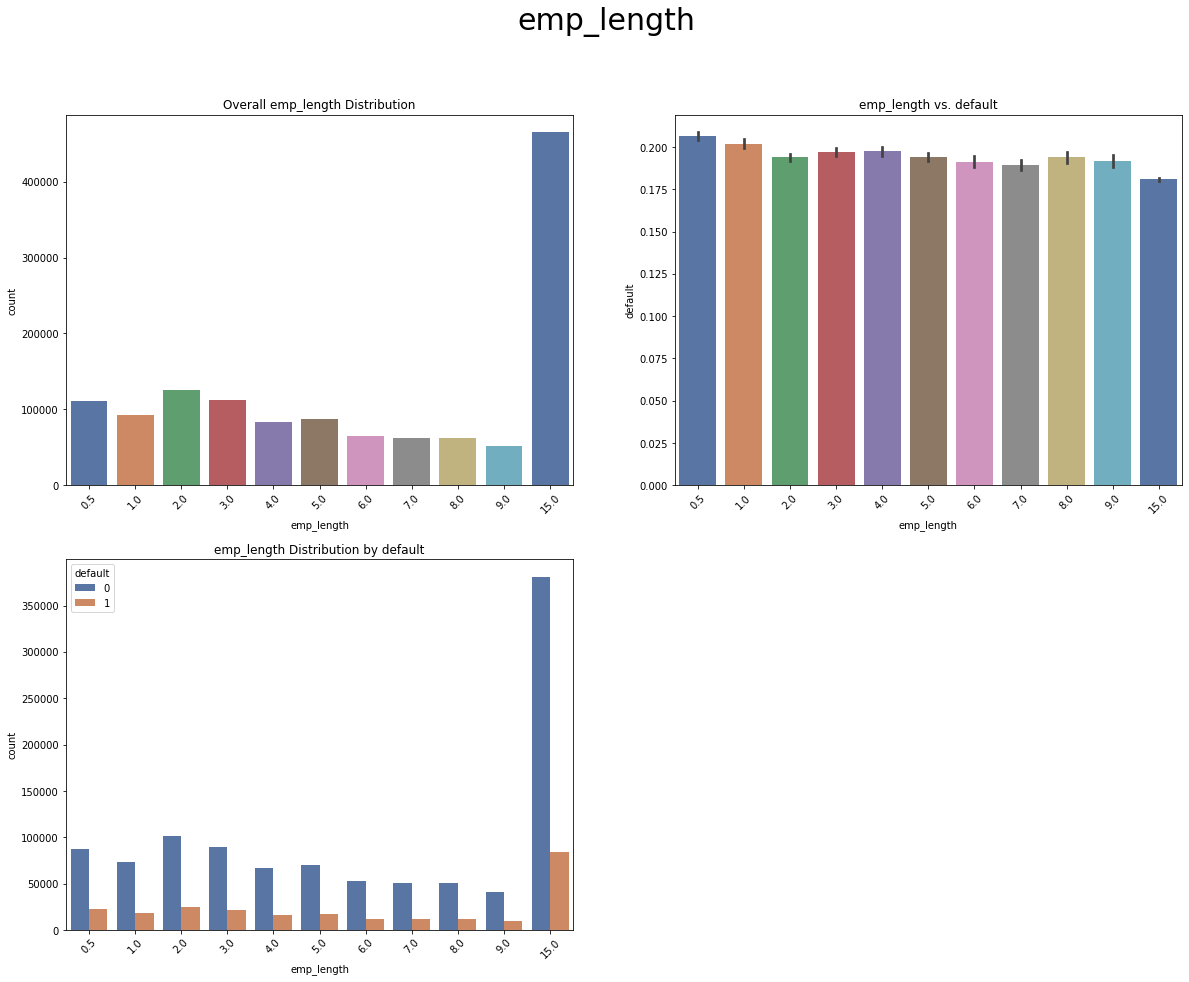

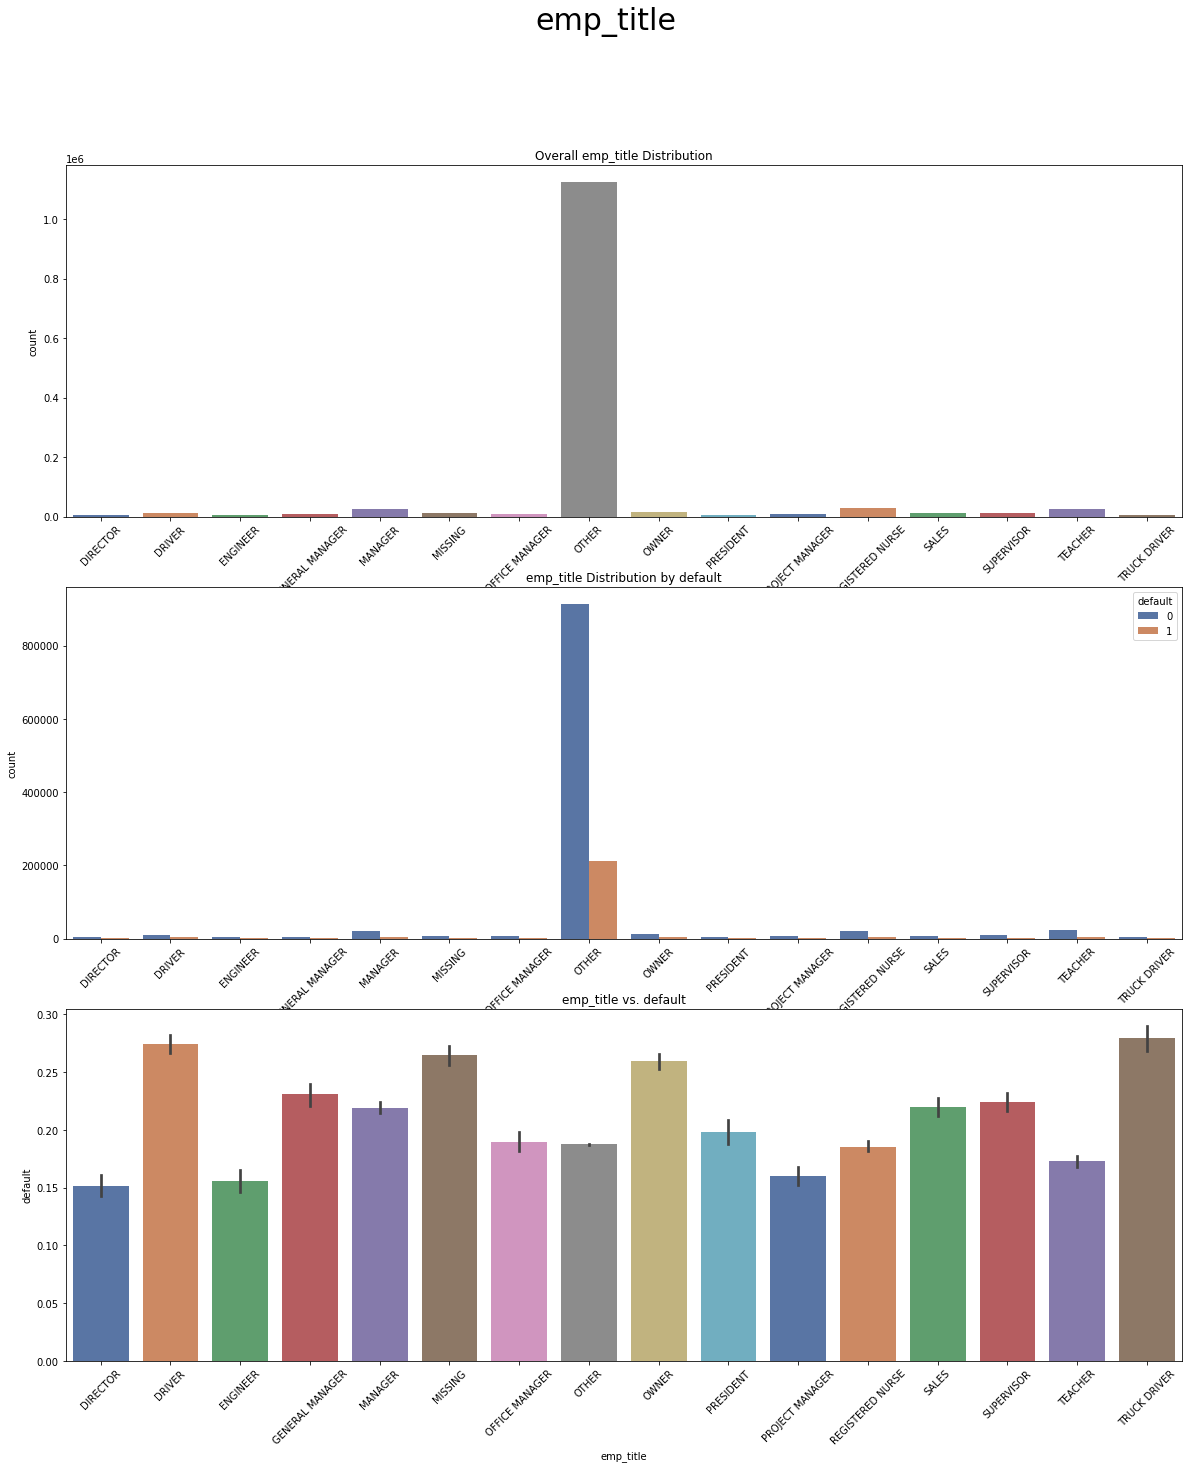

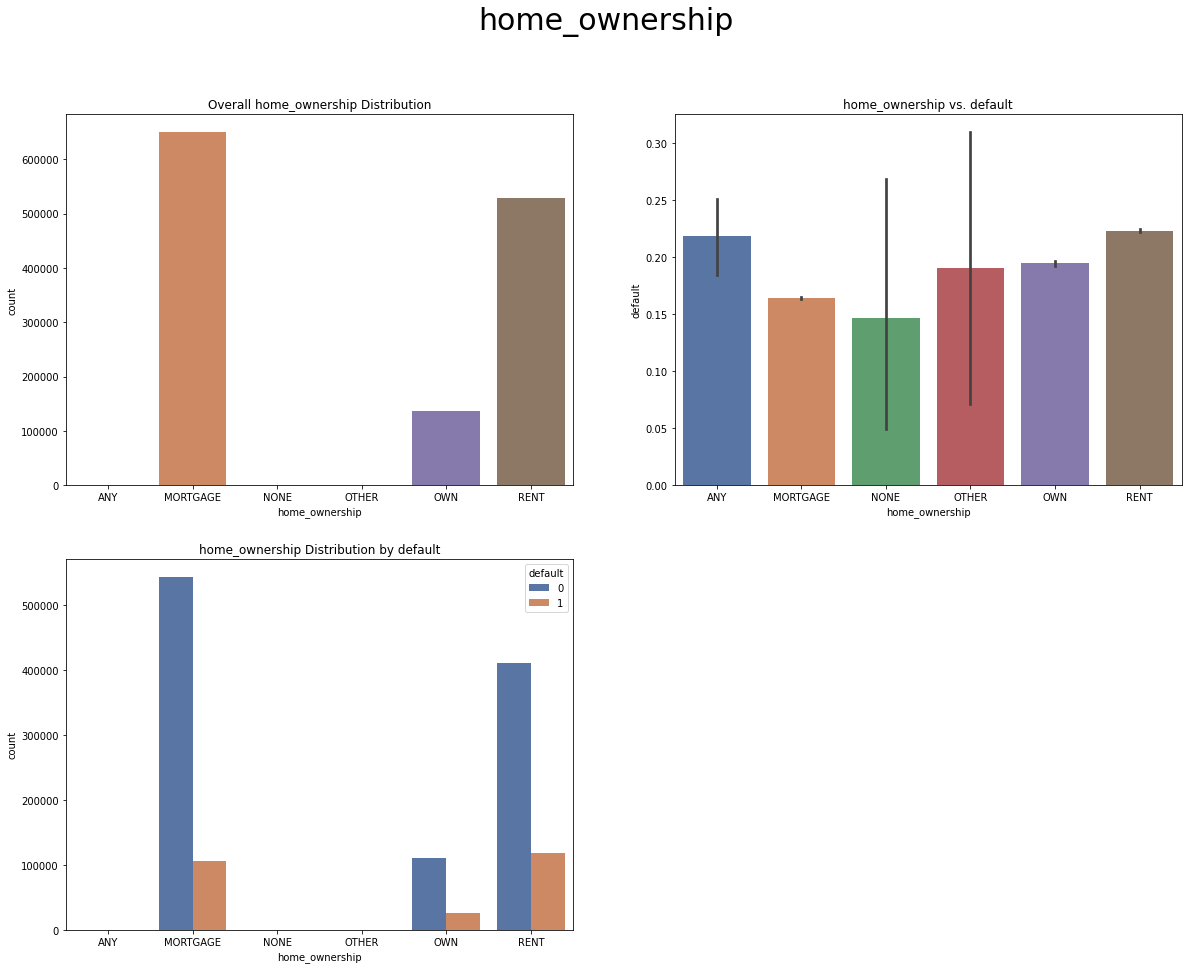

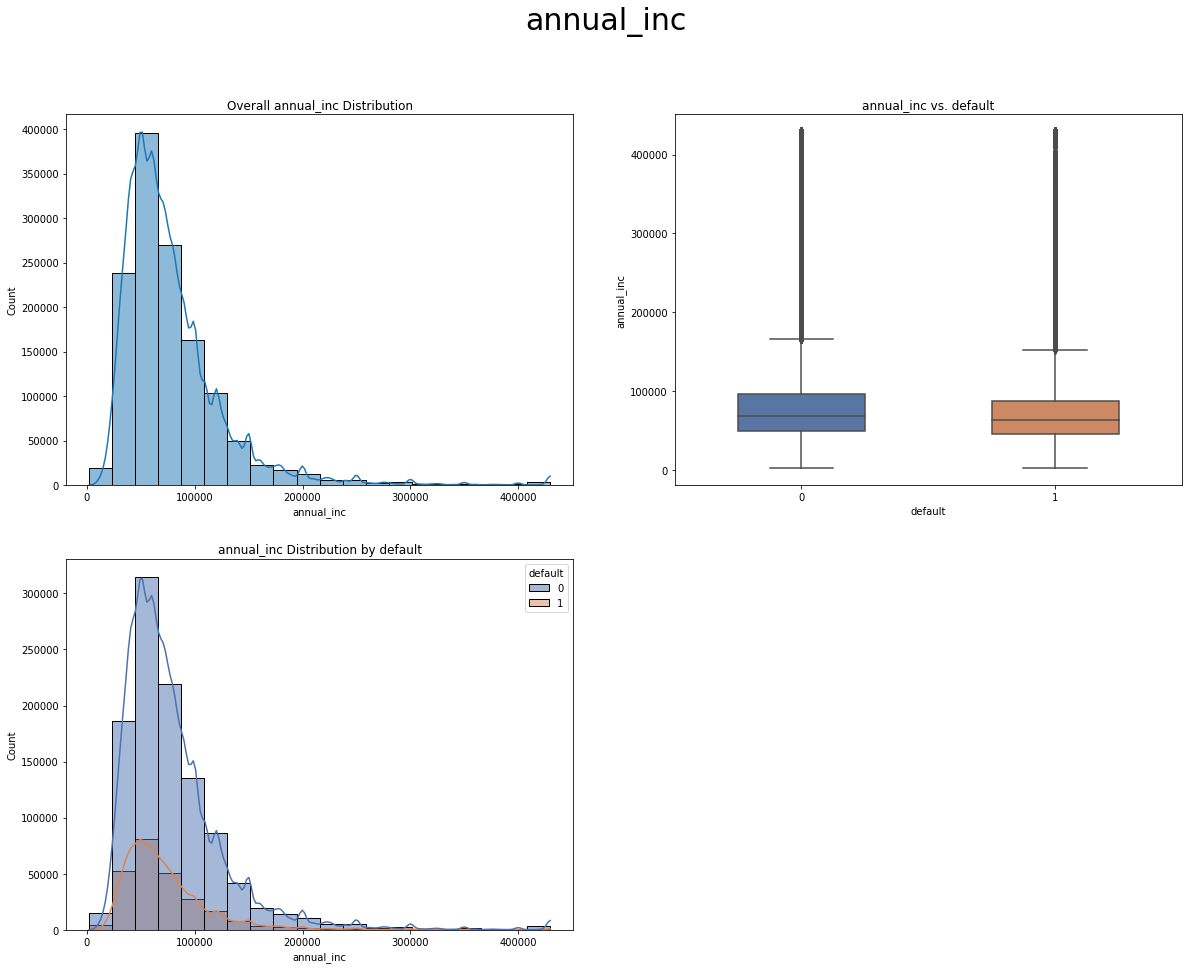

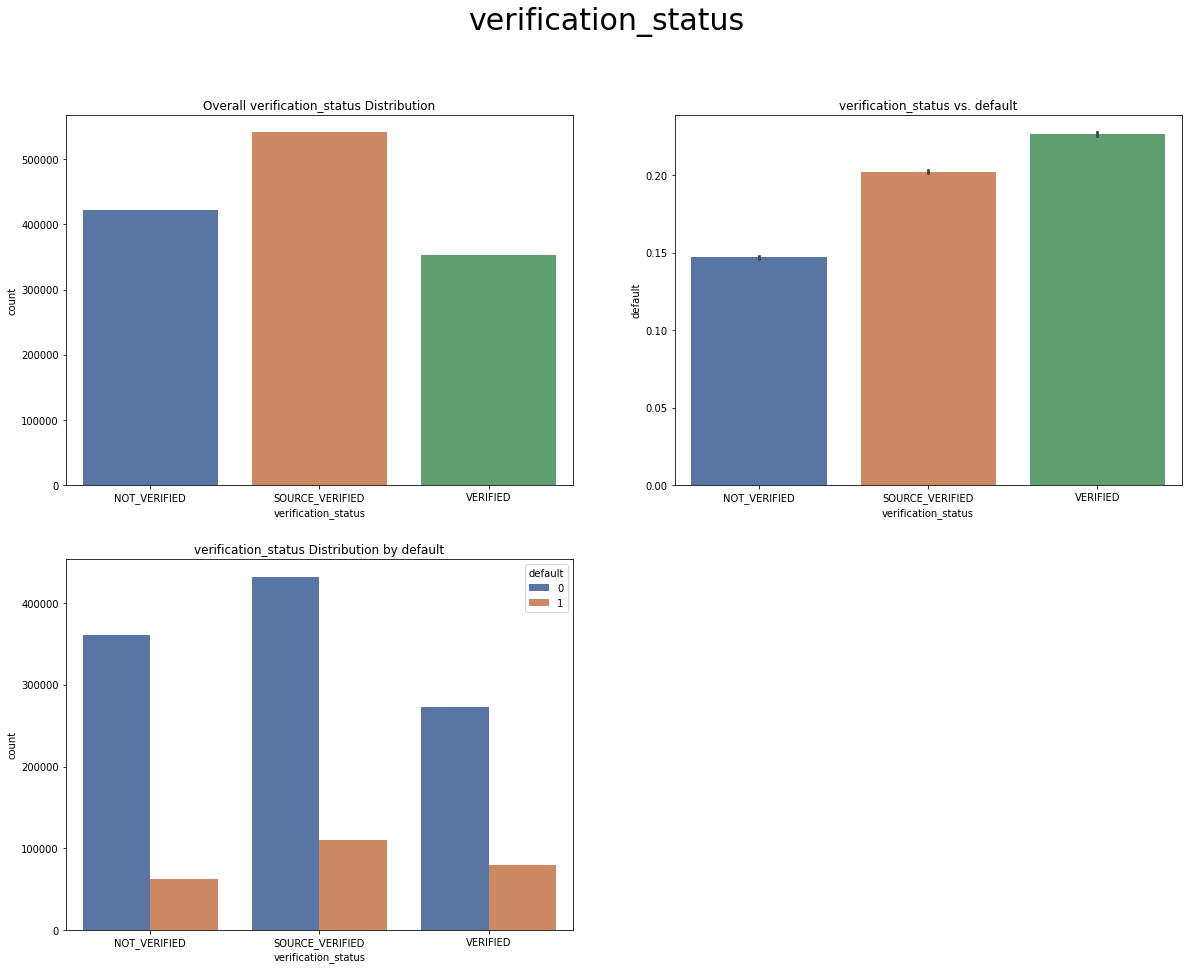

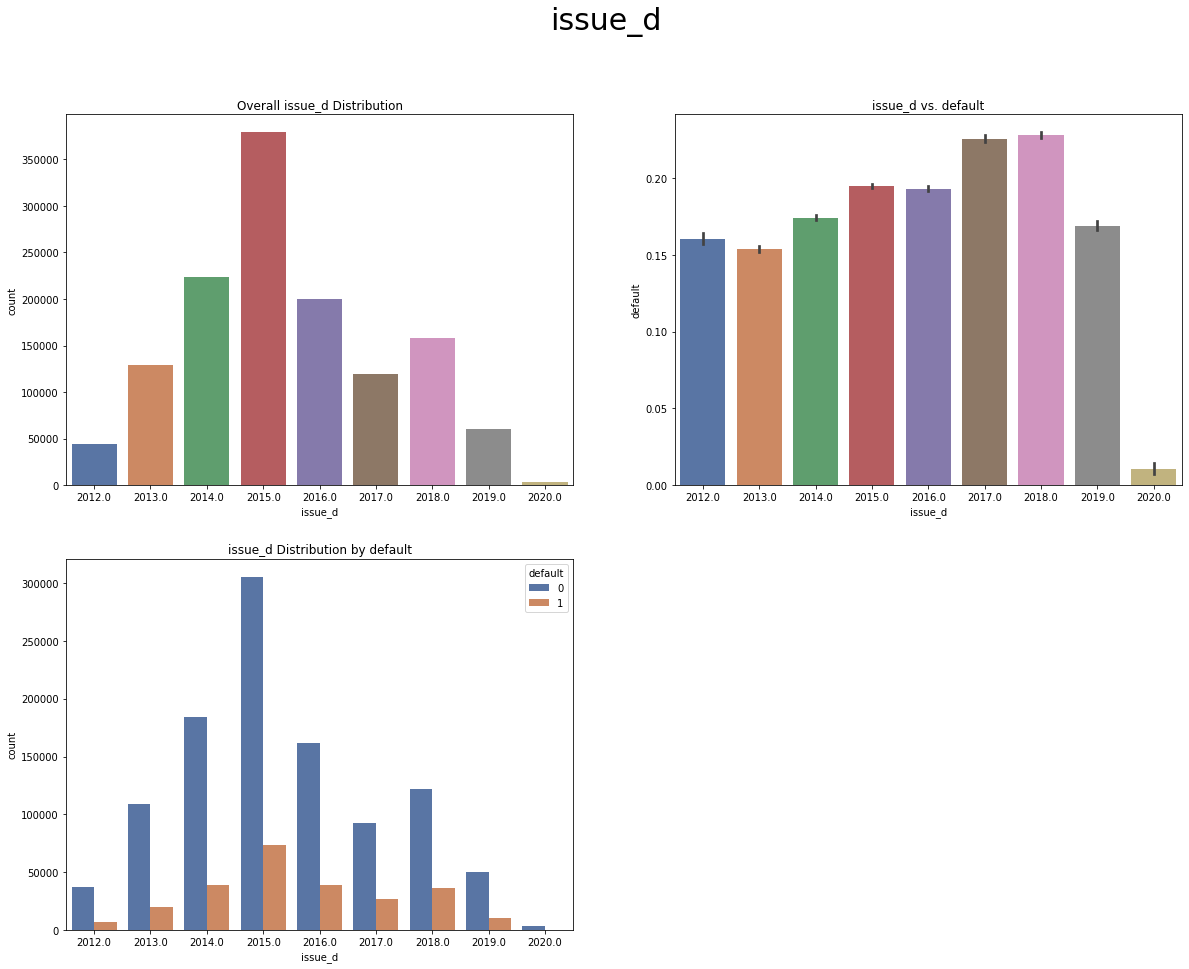

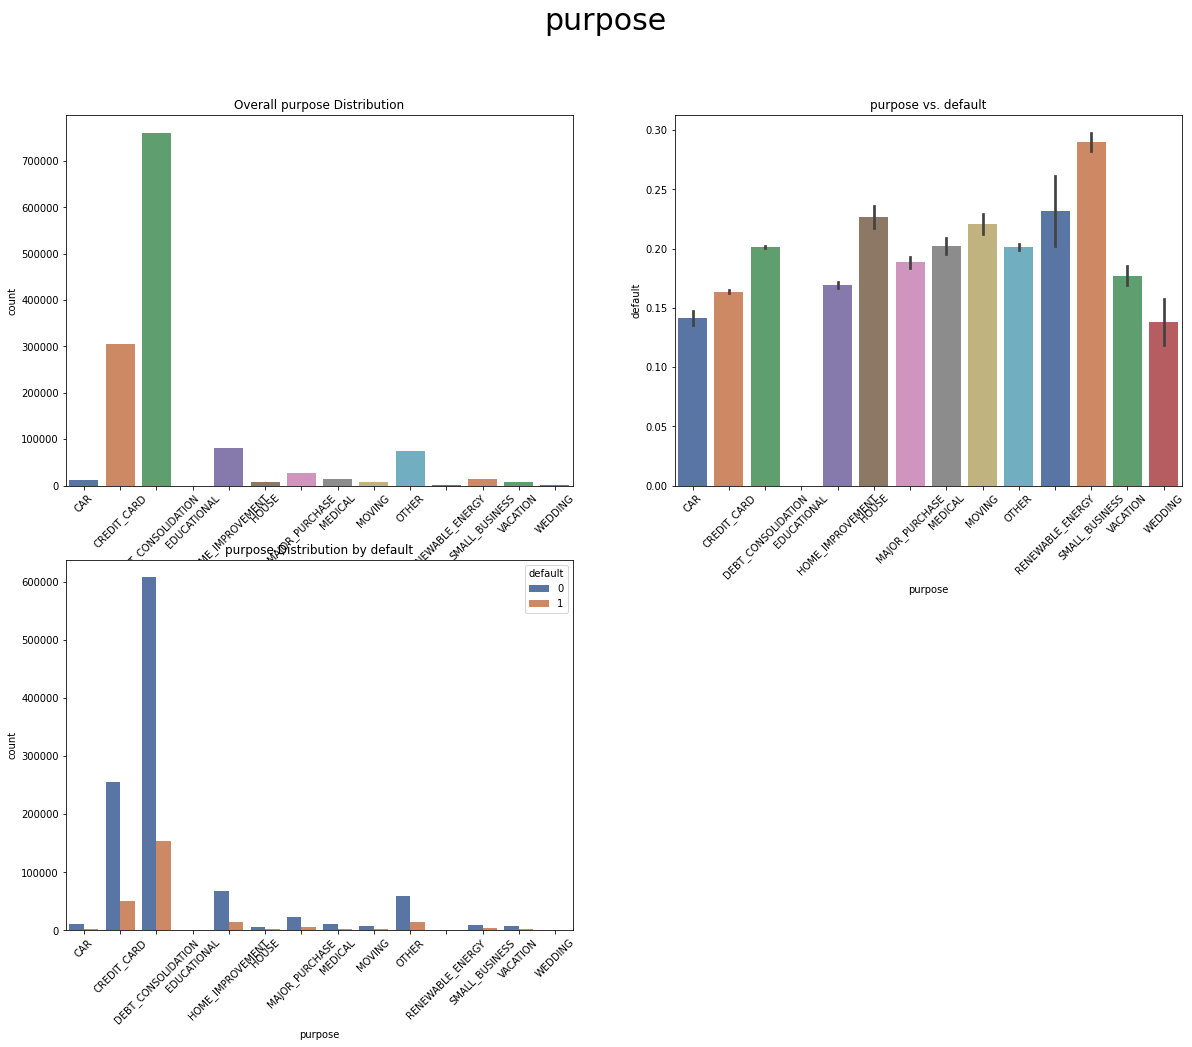

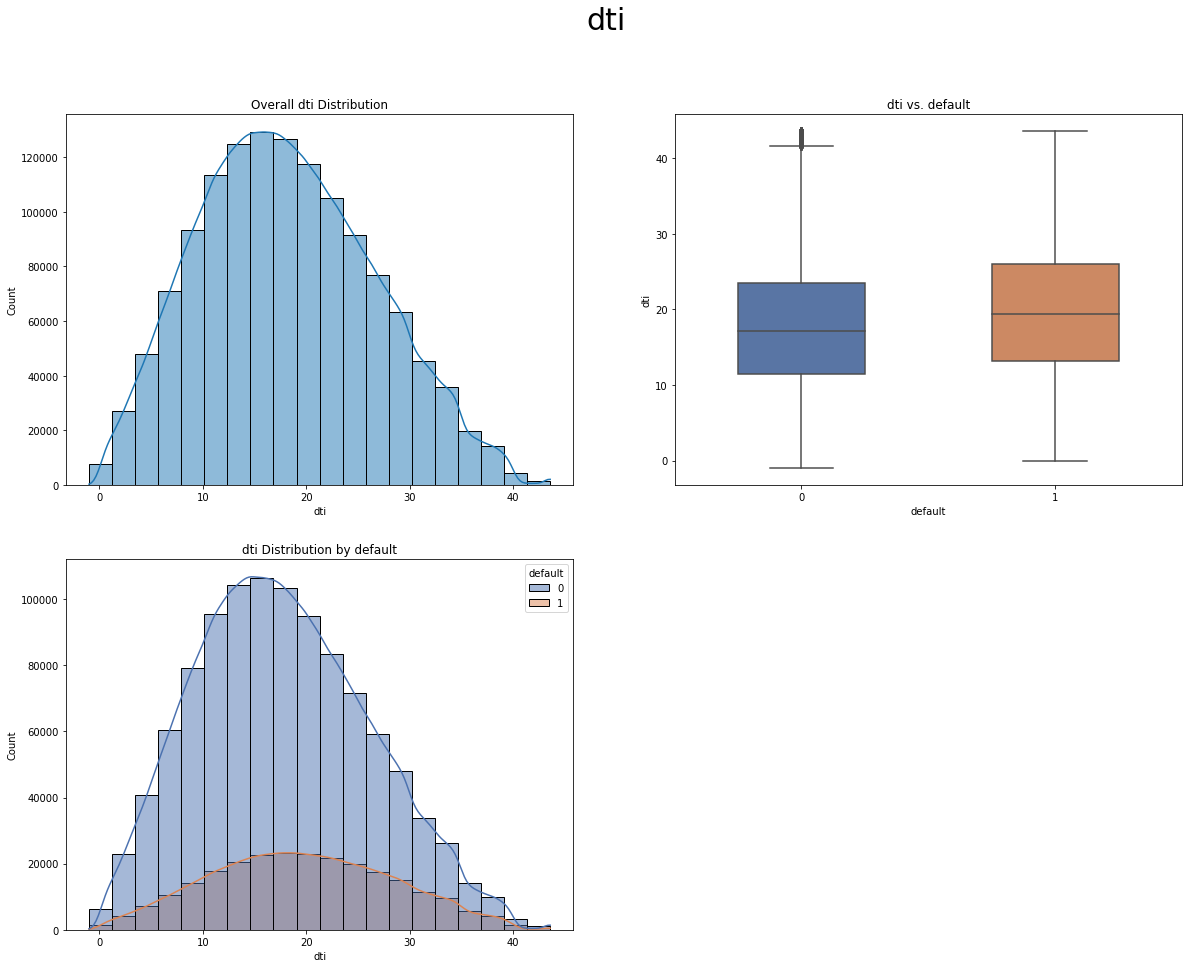

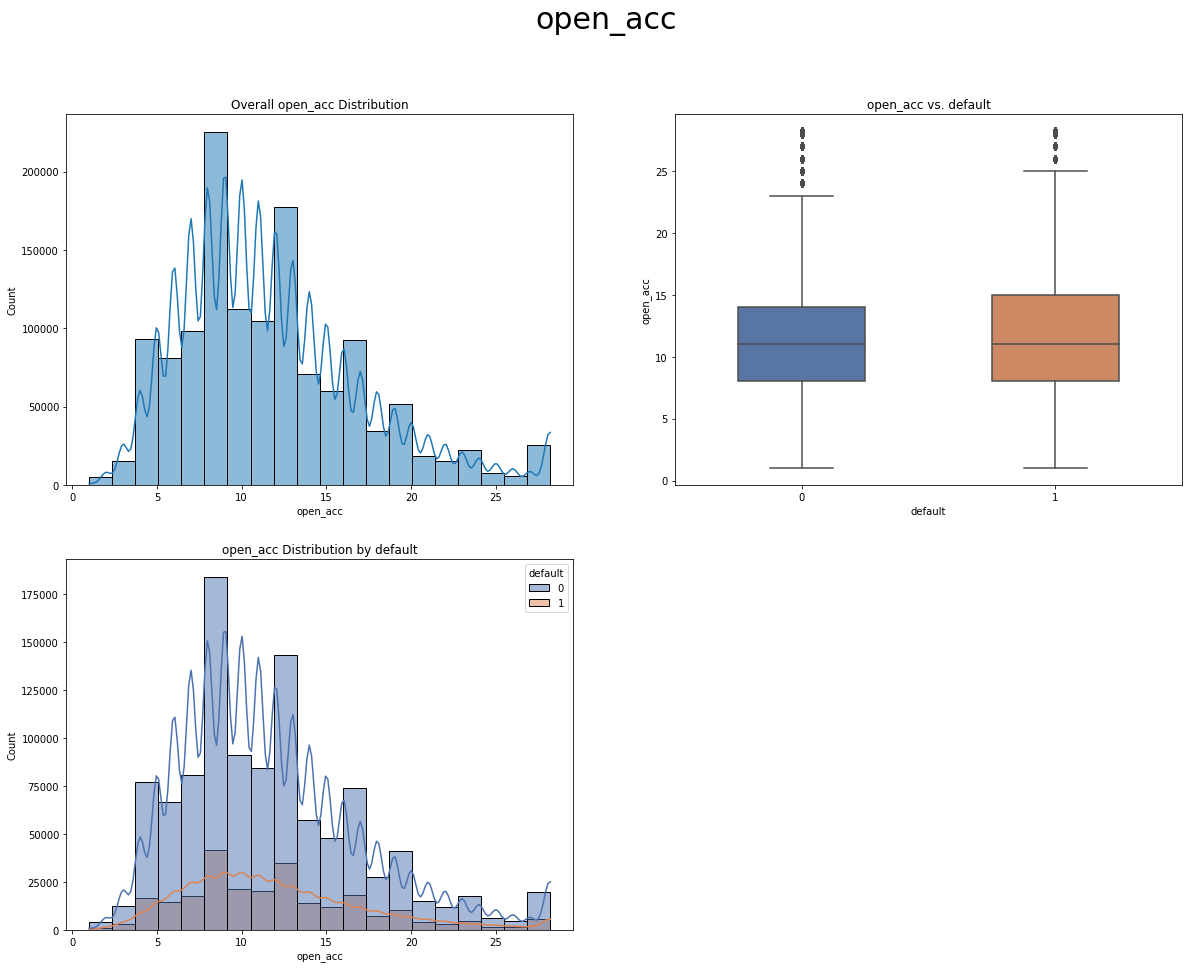

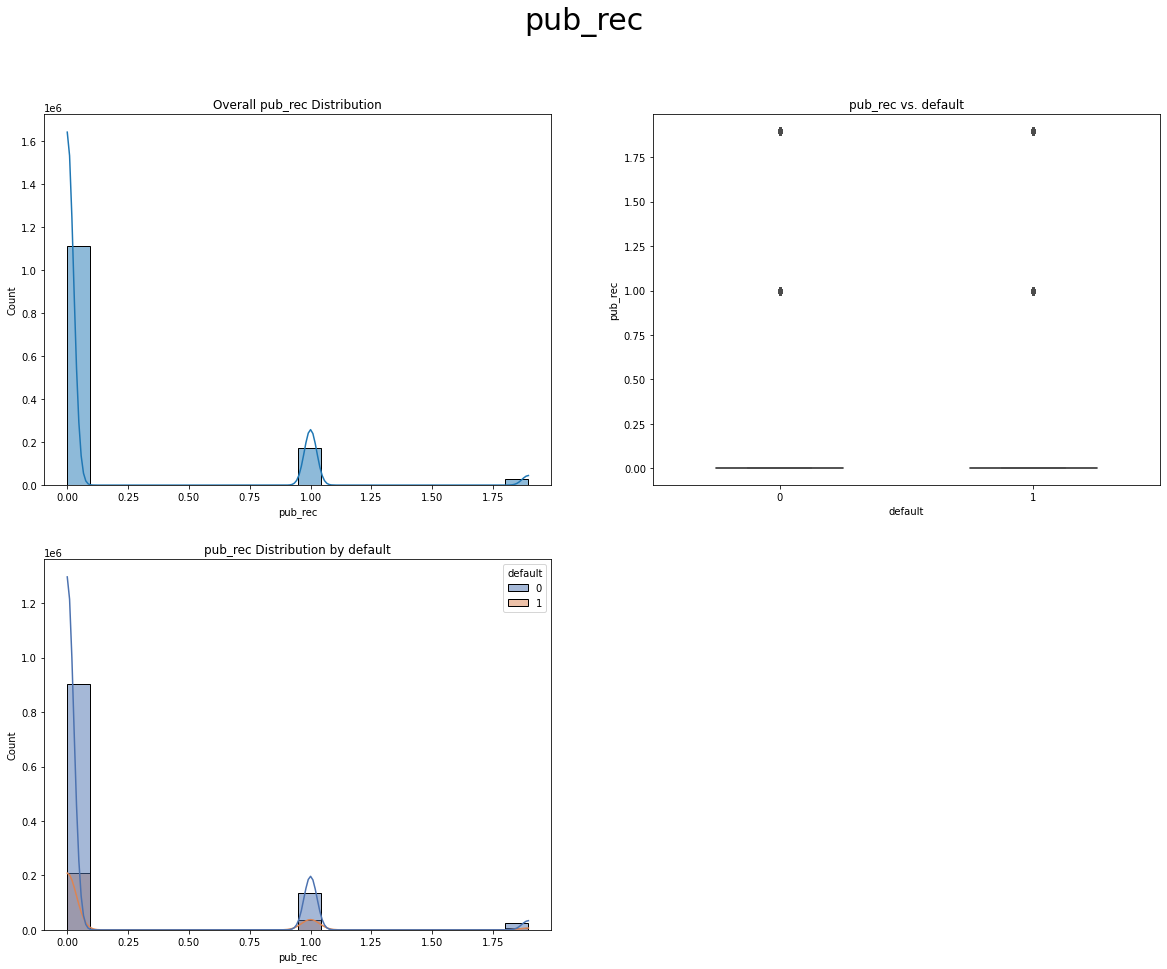

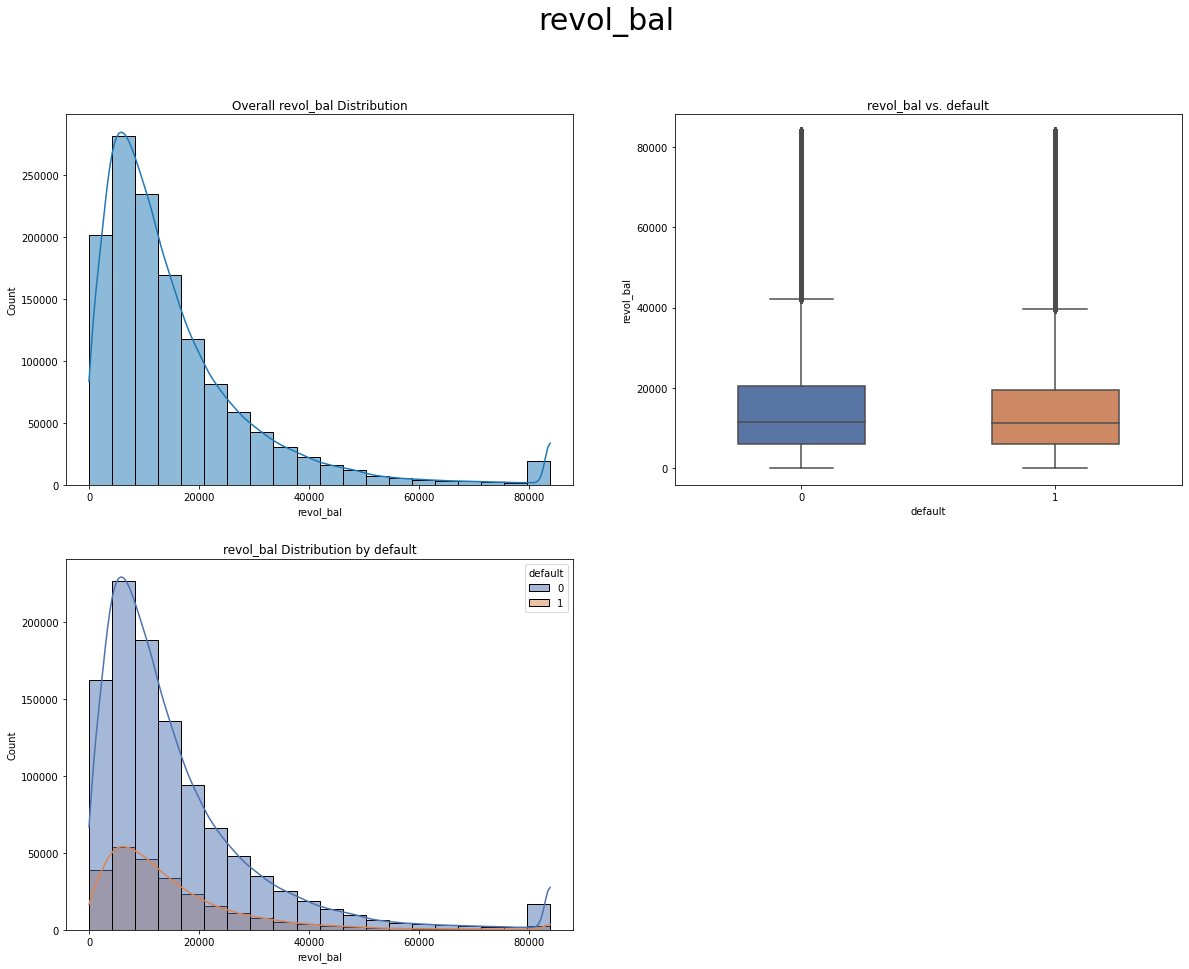

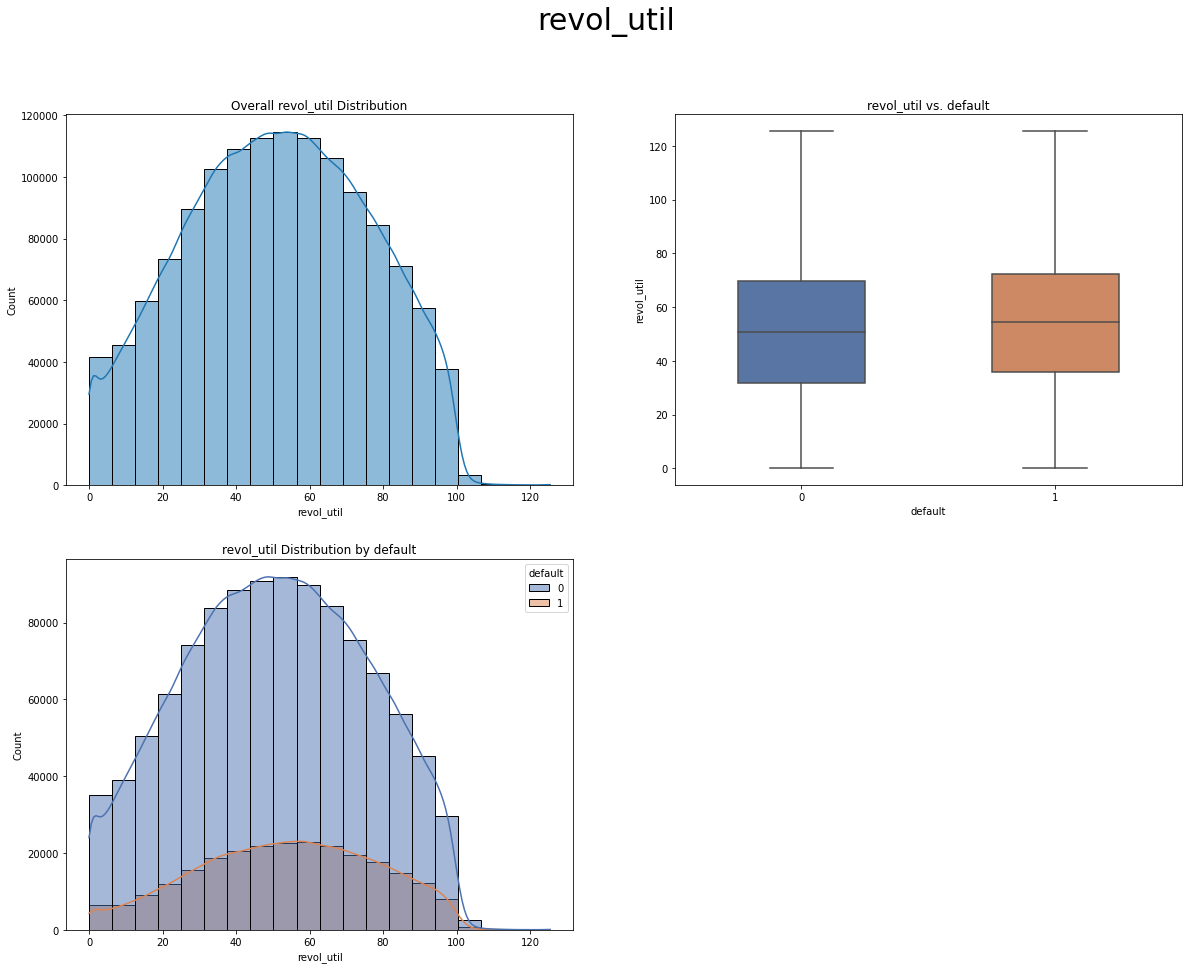

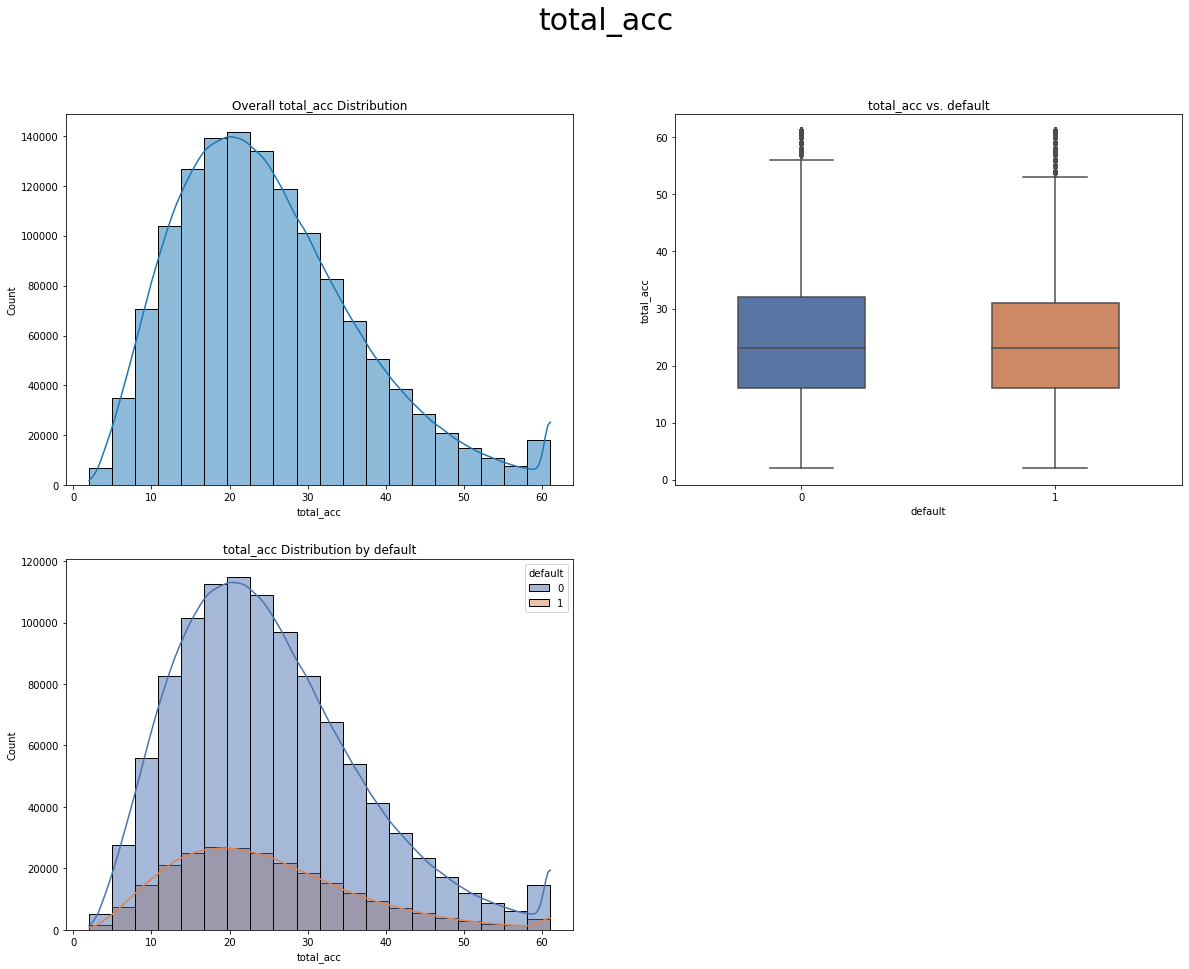

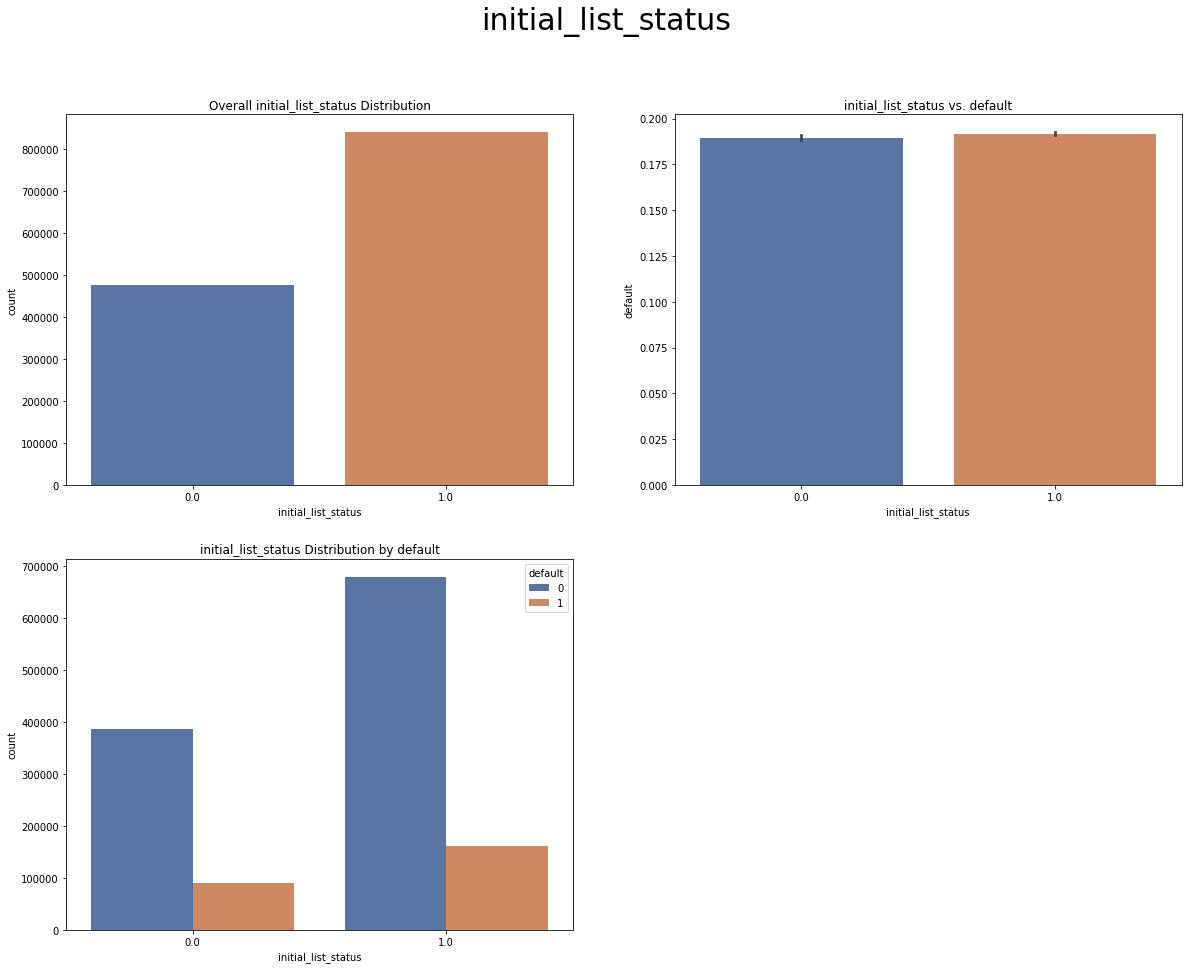

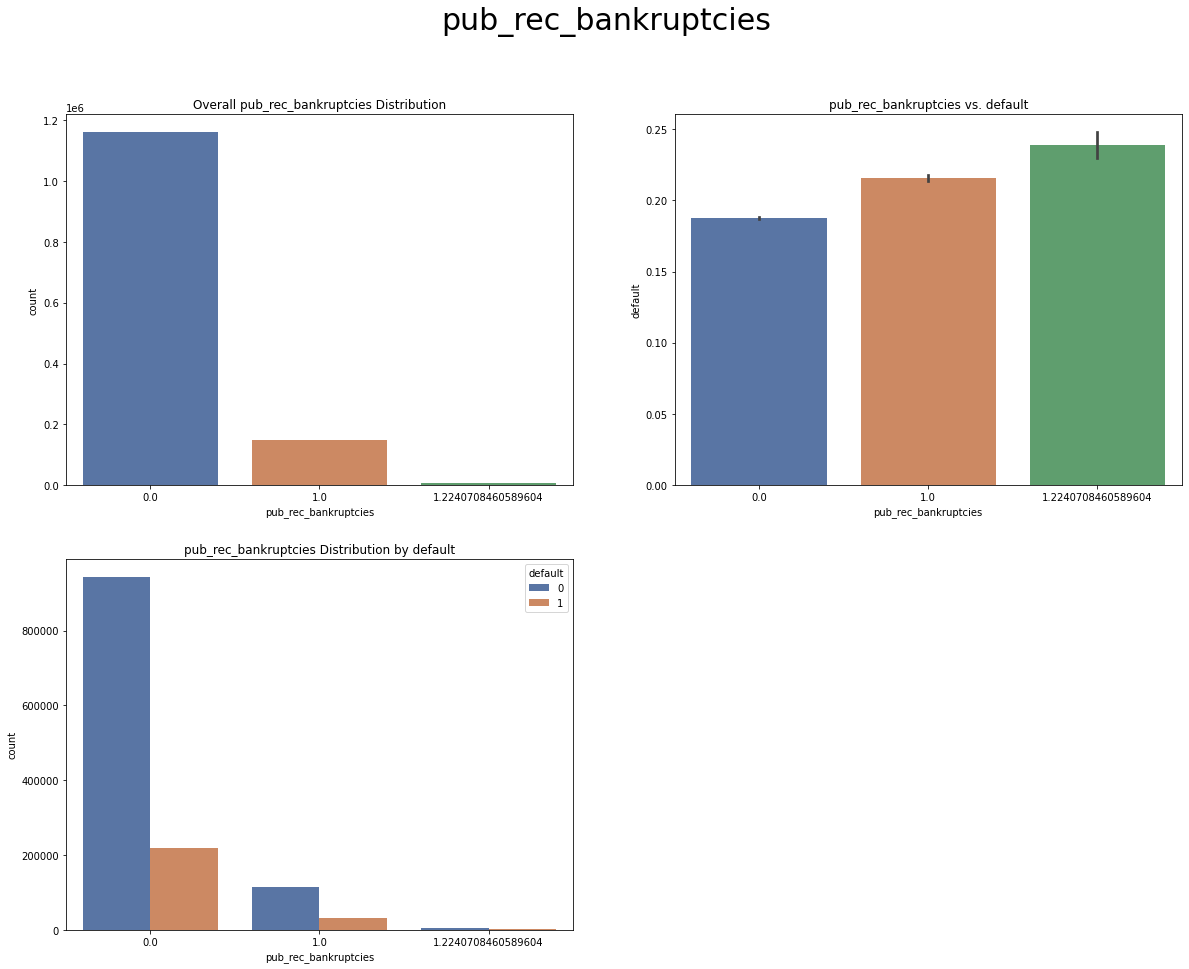

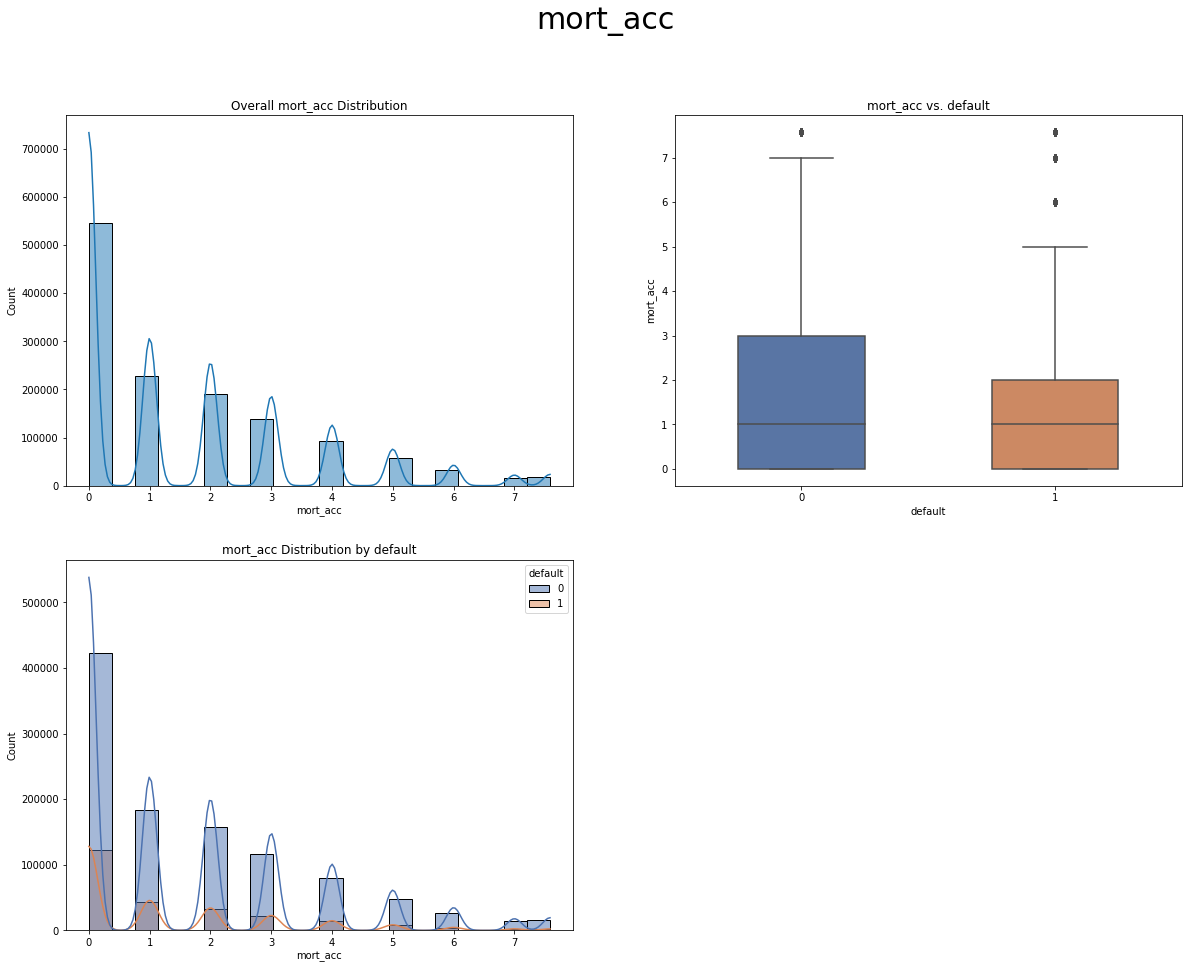

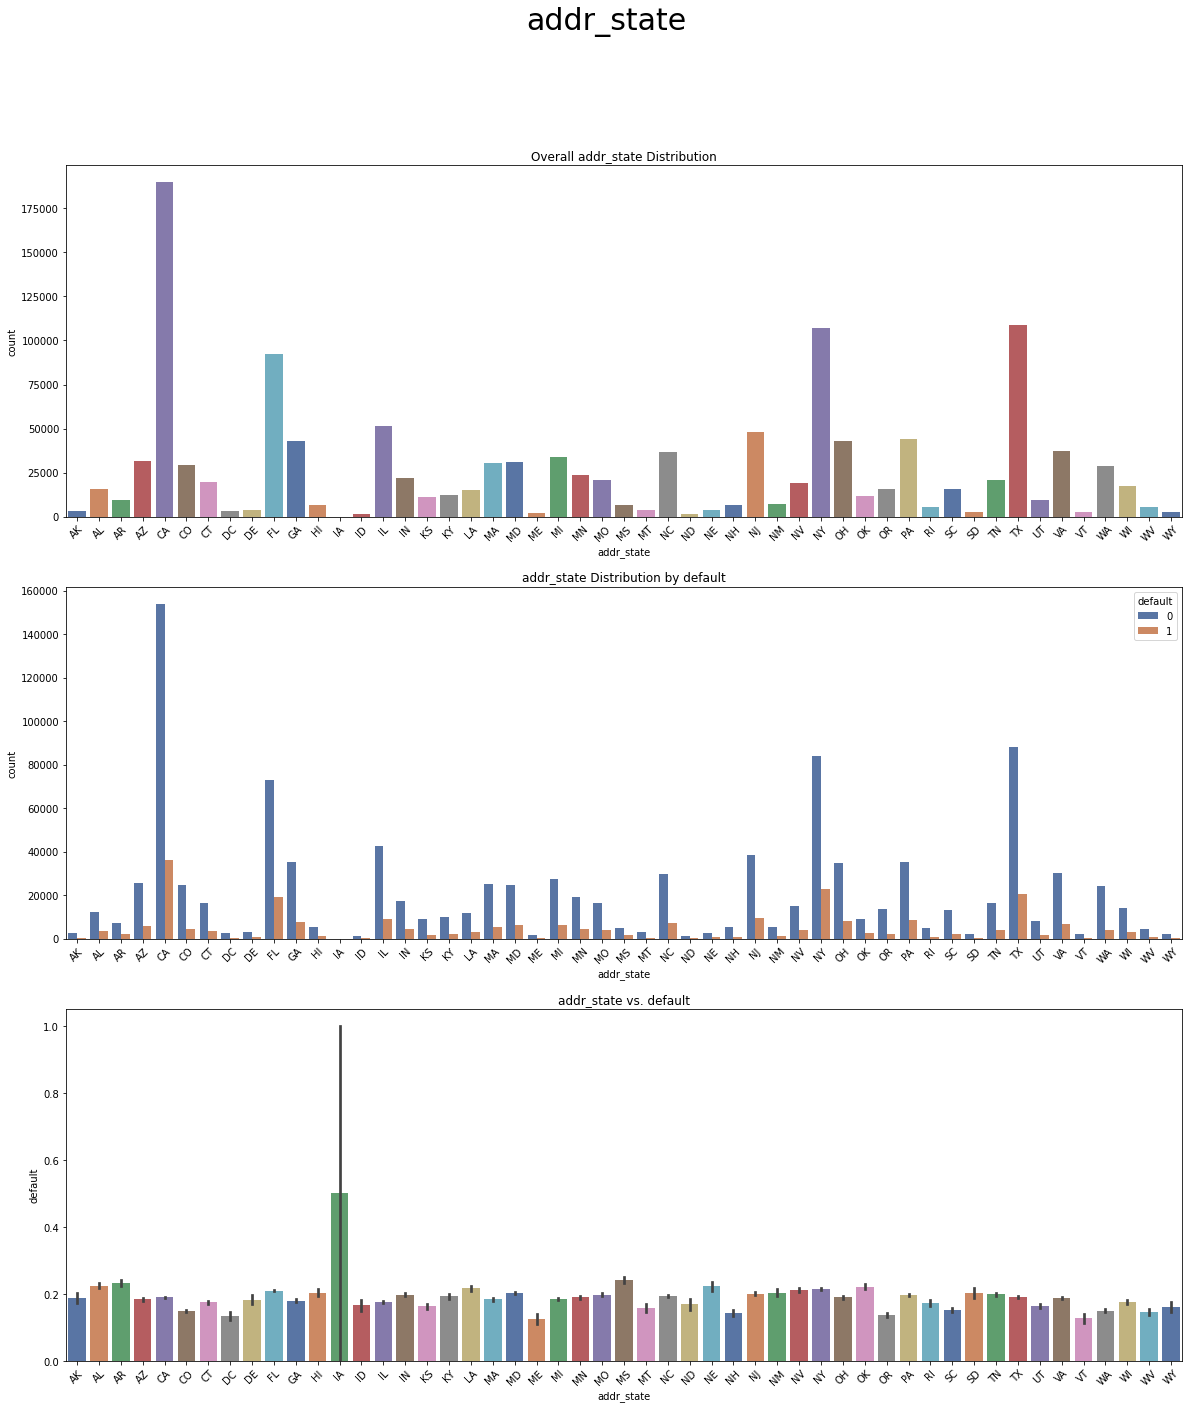

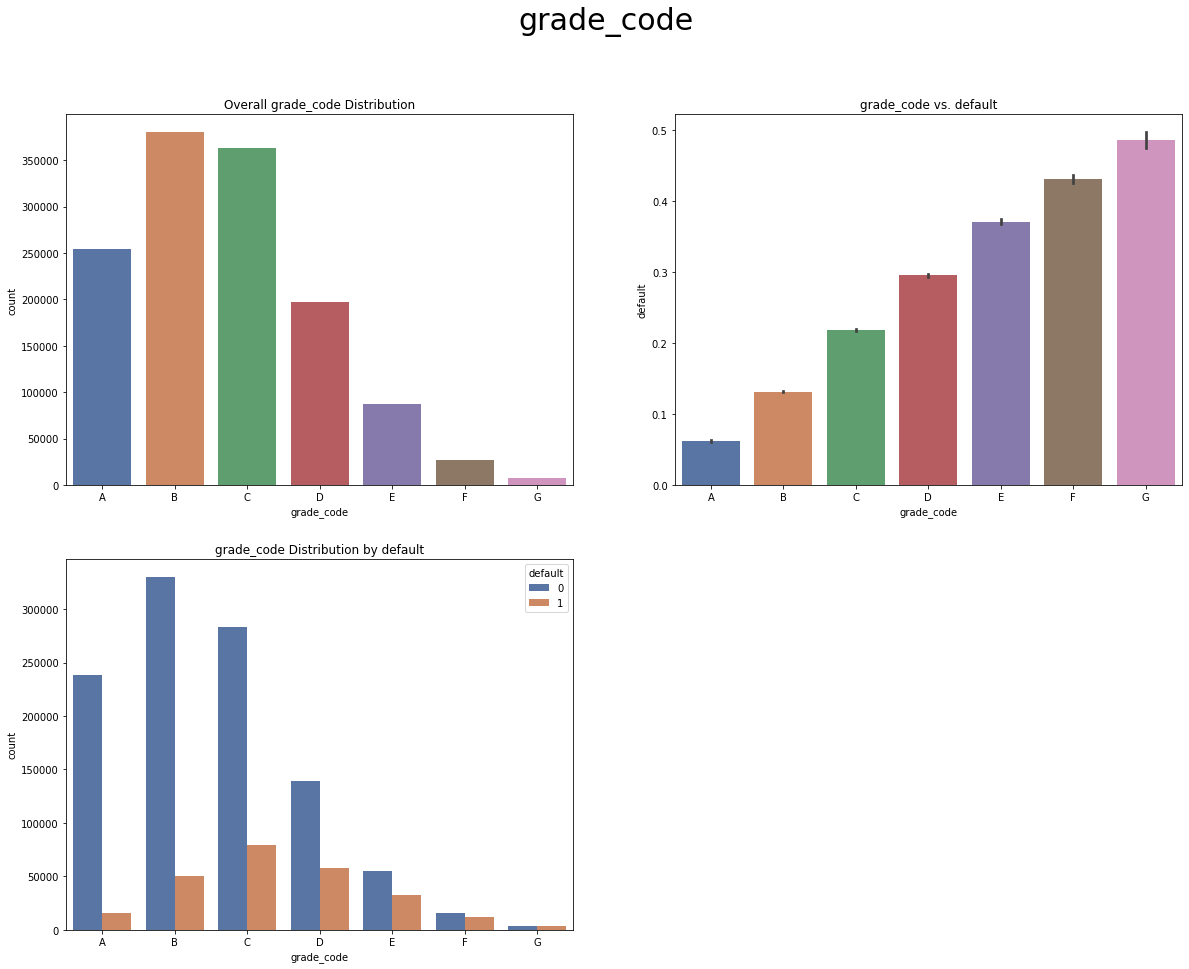

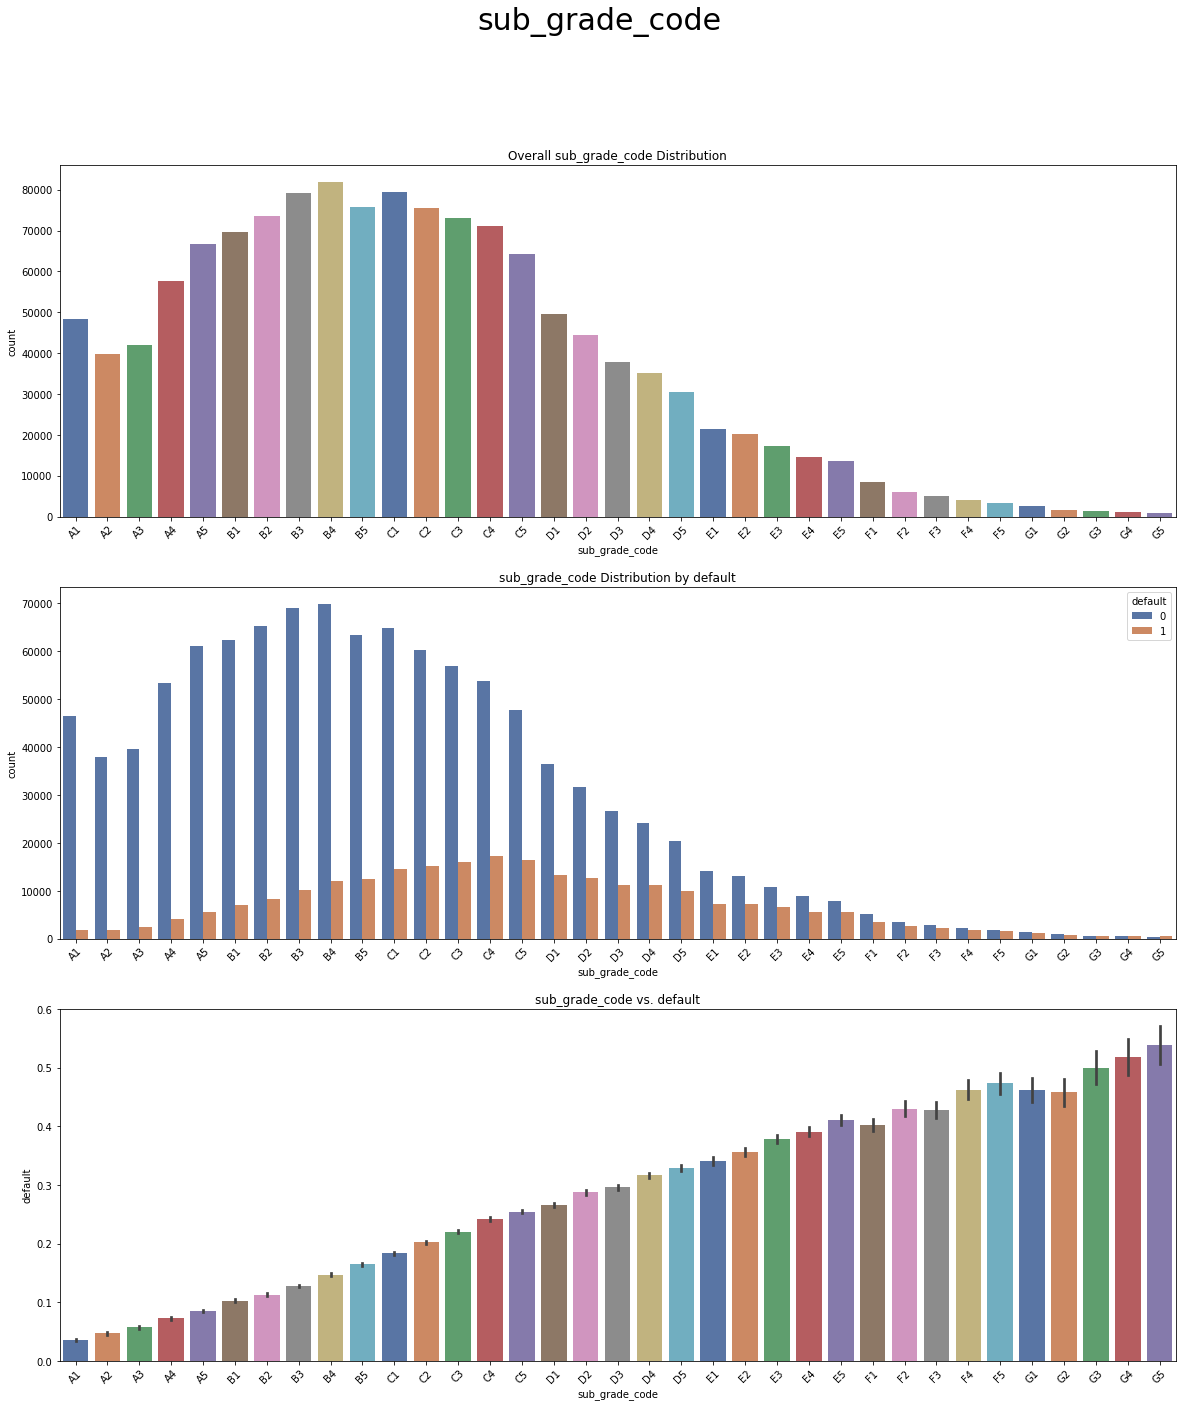

<Figure size 432x288 with 0 Axes>

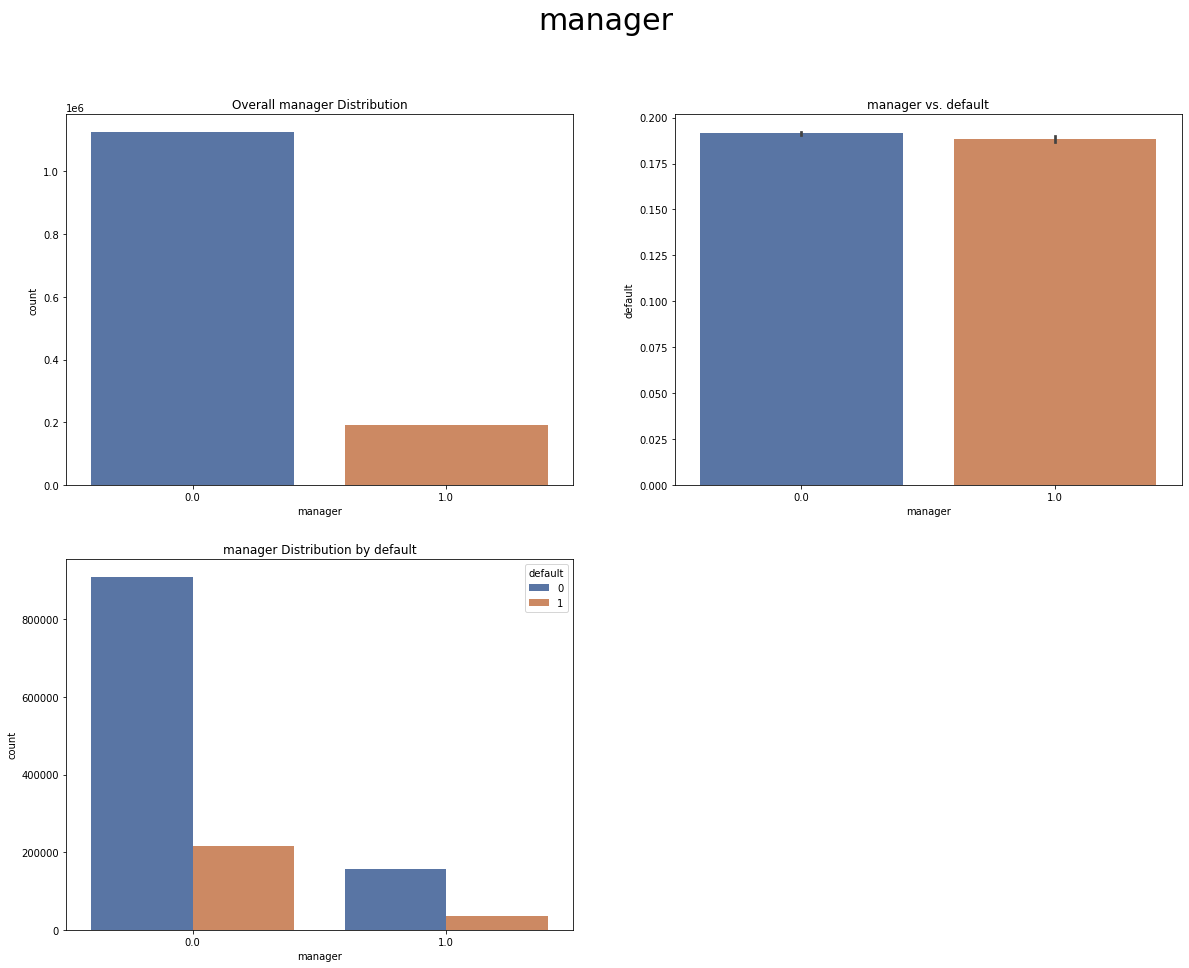

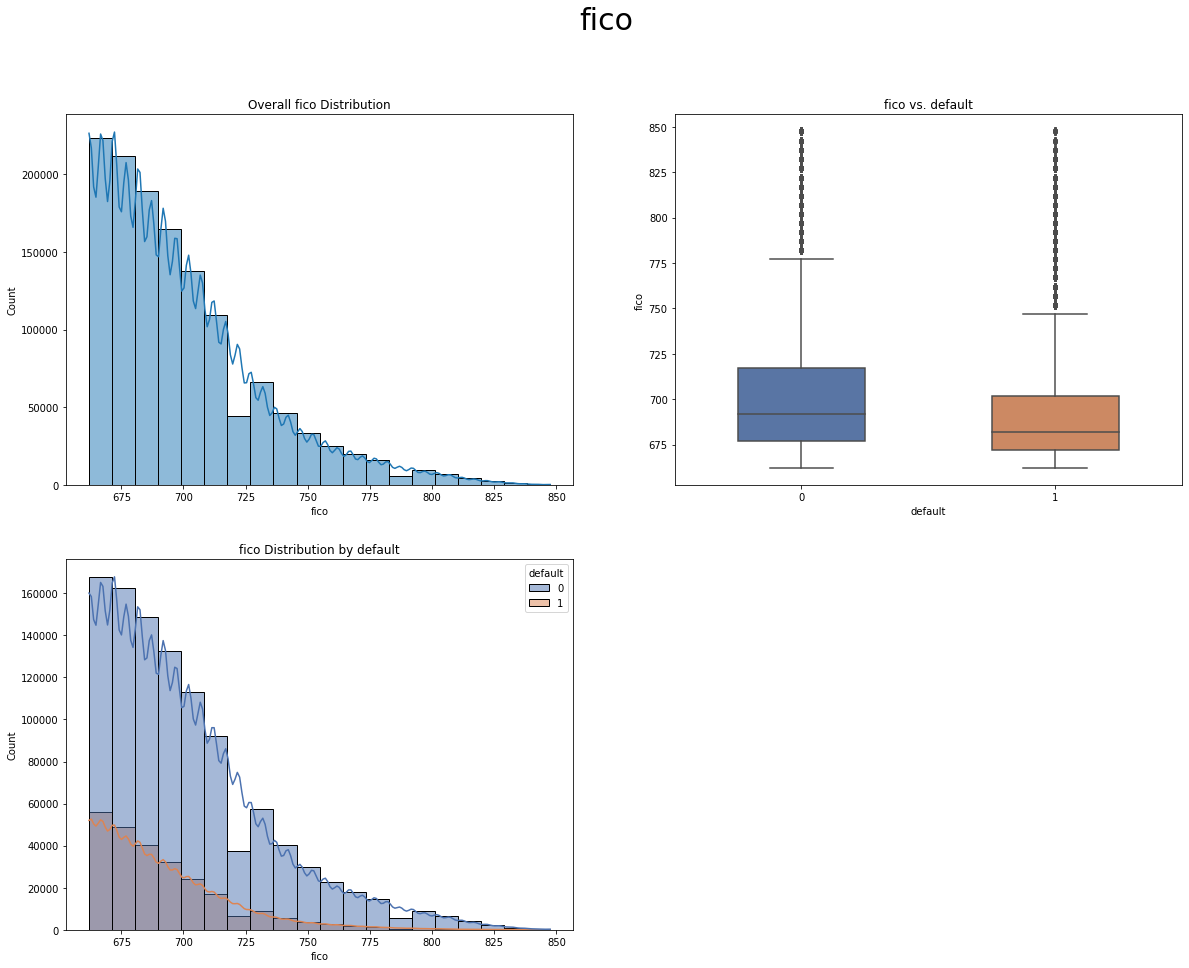

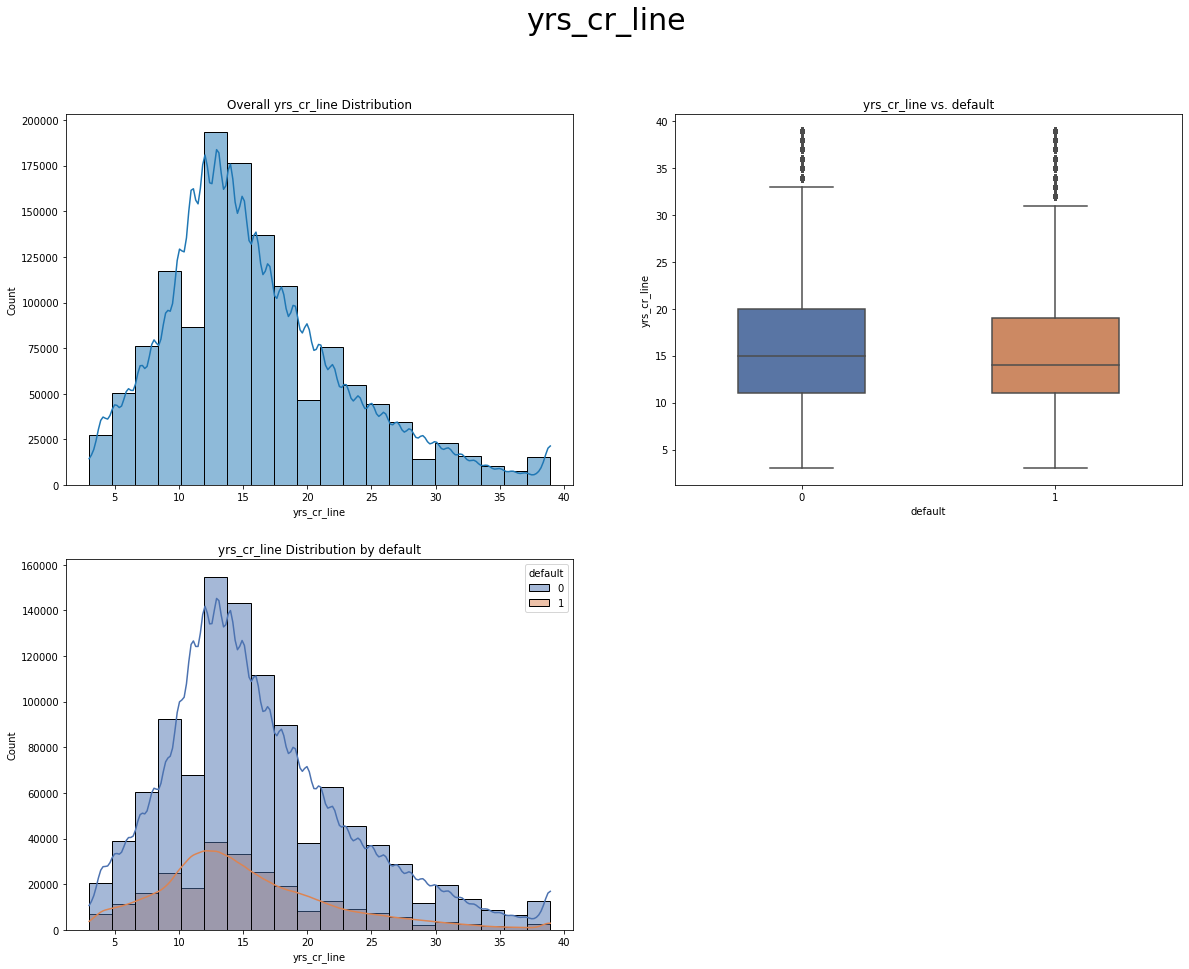

In [12]:
for feat in data.columns.values[1:]:
    run_eda(data_out, feat, 'default')

# Outlier Analysis

In [7]:
def run_boxplot(feat_list):
        
    i = 1
    nrow = round(len(feat_list)/2)
        
    plt.figure(figsize=(15, nrow*5))
    
    for col in feat_list:
        plt.subplot(nrow, 2, i)
        sns.boxplot(x='default', y=col, data=data, showfliers=True)
        i += 1
        
    plt.show()
    
#run_boxplot(cont_feats)